In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import glob
import os

In [2]:
home = '/Users/kathleenkanaley/Desktop/grapes_in_space/'

In [3]:
norm_csvs = glob.glob(home+'stats_work/SkySat*/analysis_ready/NORM_*.csv')
norm_csvs

['/Users/kathleenkanaley/Desktop/grapes_in_space/stats_work/SkySat_2020/analysis_ready/NORM_skysat_2020.csv',
 '/Users/kathleenkanaley/Desktop/grapes_in_space/stats_work/SkySat_2021/analysis_ready/NORM_skysat_2021.csv',
 '/Users/kathleenkanaley/Desktop/grapes_in_space/stats_work/SkySat_2022/analysis_ready/NORM_skysat_2022.csv']

In [5]:
pscope_csvs = glob.glob(home+'stats_work/PS*/analysis_ready/ps*.csv')
pscope_csvs

['/Users/kathleenkanaley/Desktop/grapes_in_space/stats_work/PS_2021/analysis_ready/ps_2021.csv',
 '/Users/kathleenkanaley/Desktop/grapes_in_space/stats_work/PS_2020/analysis_ready/ps_2020.csv',
 '/Users/kathleenkanaley/Desktop/grapes_in_space/stats_work/PS_2022/analysis_ready/ps_2022.csv']

In [3]:
skysat_csvs = glob.glob(home+'stats_work/SkySat*/analysis_ready/skysat*20[0-9][0-9].csv')
skysat_csvs

['/Users/kathleenkanaley/Desktop/grapes_in_space/stats_work/SkySat_2020/analysis_ready/skysat_2020.csv',
 '/Users/kathleenkanaley/Desktop/grapes_in_space/stats_work/SkySat_2021/analysis_ready/skysat_2021.csv',
 '/Users/kathleenkanaley/Desktop/grapes_in_space/stats_work/SkySat_2022/analysis_ready/skysat_2022.csv']

In [4]:
ss_2021 = pd.read_csv(skysat_csvs[1])
ss_2021_dates = ss_2021.Date.unique()
ss_2020 = pd.read_csv(skysat_csvs[0])
ss_2020_dates = ss_2020.Date.unique()
ss_2022 = pd.read_csv(skysat_csvs[2])
ss_2022_dates = ss_2022.Date.unique()

In [6]:
# Master pscope df
pscope_m = pd.DataFrame()
for csv in pscope_csvs:
    df = pd.read_csv(csv)
    pscope_m = pd.concat([pscope_m,df], axis=0, ignore_index=True)

pscope_m

acquired  plot     cblue      blue    greenI   greenII    yellow  \
0    20210624     1  0.036750  0.049133  0.075450  0.080900  0.084417   
1    20210624     2  0.034125  0.045725  0.073900  0.078075  0.080600   
2    20210624     3  0.033280  0.046480  0.073920  0.076700  0.079740   
3    20210624     4  0.031850  0.046250  0.071217  0.076483  0.080050   
4    20210624     5  0.031775  0.046350  0.070900  0.076575  0.079575   
..        ...   ...       ...       ...       ...       ...       ...   
865  20220726   172  0.040586  0.046500  0.067157  0.082171  0.073757   
866  20220726   173  0.040940  0.046100  0.065680  0.081540  0.070940   
867  20220726   174  0.041400  0.045980  0.065140  0.081700  0.071680   
868  20220726   175  0.038383  0.045017  0.065500  0.082733  0.072767   
869  20220726   176  0.036483  0.045167  0.066433  0.083233  0.071550   

          red      rede       nir  row  panel       Date  Treatment  \
0    0.080500  0.134933  0.342583    1      1    6/24/21        5.0   
1    0.077725  0.132775  0.342875    1      2    6/24/21        7.0   
2    0.076560  0.131720  0.339020    1      3    6/24/21        9.0   
3    0.075500  0.129033  0.336700    1      4    6/24/21       15.0   
4    0.074025  0.130325  0.331800    1      5    6/24/21        3.0   
..        ...       ...       ...  ...    ...        ...        ...   
865  0.071257  0.139357  0.392200   11     12  7/27/2022       11.0   
866  0.072100  0.134740  0.390900   11     13  7/27/2022       18.0   
867  0.072060  0.133580  0.395700   11     14  7/27/2022       24.0   
868  0.070767  0.136450  0.397650   11     15  7/27/2022       15.0   
869  0.069267  0.135283  0.412767   11     16  7/27/2022        7.0   

     DM_severity  
0           0.00  
1           0.00  
2           0.00  
3           0.00  
4           0.00  
..           ...  
865         0.10  
866         0.00  
867         0.25  
868         0.10  
869         0.10  

[870 rows x 15 columns]

In [5]:
# Master skysat (non-normalized) df
skysat_m = pd.DataFrame()
for csv in skysat_csvs:
    df = pd.read_csv(csv)
    skysat_m = pd.concat([skysat_m,df], axis=0, ignore_index=True)

skysat_m

acquired  plot      blue     green       red       nir  row  panel  \
0    20200625    97  0.049290  0.067947  0.050030  0.308817    7      1   
1    20200625    98  0.049189  0.066239  0.048911  0.291346    7      2   
2    20200625   100  0.047637  0.064937  0.047663  0.303950    7      4   
3    20200625   101  0.048268  0.064518  0.048571  0.308064    7      5   
4    20200625   102  0.047930  0.066887  0.048617  0.300613    7      6   
..        ...   ...       ...       ...       ...       ...  ...    ...   
785  20220720   172  0.033387  0.058393  0.060577  0.345780   11     12   
786  20220720   173  0.036111  0.059289  0.065156  0.334881   11     13   
787  20220720   174  0.036250  0.060864  0.065996  0.323714   11     14   
788  20220720   175  0.035211  0.063043  0.066329  0.361450   11     15   
789  20220720   176  0.031800  0.057491  0.059943  0.353171   11     16   

          Date  Treatment  DM_severity  
0       25-Jun       13.0         0.00  
1       25-Jun        8.0         0.00  
2       25-Jun        1.0         0.00  
3       25-Jun       11.0         0.00  
4       25-Jun       16.0         0.10  
..         ...        ...          ...  
785  7/20/2022       11.0         0.35  
786  7/20/2022       18.0         0.10  
787  7/20/2022       24.0         2.85  
788  7/20/2022       15.0         2.85  
789  7/20/2022        7.0         0.10  

[790 rows x 11 columns]

In [8]:
# Master NORMALIZED skysat df
norm_m = pd.DataFrame()
for csv in norm_csvs:
    df = pd.read_csv(csv)
    norm_m = pd.concat([norm_m,df], axis=0, ignore_index=True)

#norm_m

In [6]:
# SkySat: Add columns for VIS

skysat_m['ndvi']= (skysat_m['nir']-skysat_m['red'])/(skysat_m['nir']+skysat_m['red'])
skysat_m['evi']= 2.5*(skysat_m['nir']-skysat_m['red'])/(skysat_m['nir']+6*skysat_m['red']-7.5*skysat_m['blue']+1)
skysat_m['savi']= 1.5*(skysat_m['nir']-skysat_m['red'])/(skysat_m['nir']+skysat_m['red']+0.5)
skysat_m['sr']= skysat_m['nir']/skysat_m['red']
skysat_m['msr']= ((skysat_m['nir']/skysat_m['red'])-1)/(np.sqrt((skysat_m['nir']/skysat_m['red'])+1))
skysat_m['dvi']= skysat_m['nir']-skysat_m['red']
skysat_m['nirv']= skysat_m['ndvi']*skysat_m['nir']
skysat_m['gcc']=skysat_m['green']/(skysat_m['green']+skysat_m['red']+skysat_m['blue'])
skysat_m['tvi']=0.5*(120*(skysat_m['nir']-skysat_m['green'])-200*(skysat_m['red']-skysat_m['green']))
skysat_m['arvi']=(skysat_m['nir']-(2*skysat_m['red']-skysat_m['blue']))/(skysat_m['nir']+(2*skysat_m['red']-skysat_m['blue']))

skysat_m

acquired  plot      blue     green       red       nir  row  panel  \
0    20200625    97  0.049290  0.067947  0.050030  0.308817    7      1   
1    20200625    98  0.049189  0.066239  0.048911  0.291346    7      2   
2    20200625   100  0.047637  0.064937  0.047663  0.303950    7      4   
3    20200625   101  0.048268  0.064518  0.048571  0.308064    7      5   
4    20200625   102  0.047930  0.066887  0.048617  0.300613    7      6   
..        ...   ...       ...       ...       ...       ...  ...    ...   
785  20220720   172  0.033387  0.058393  0.060577  0.345780   11     12   
786  20220720   173  0.036111  0.059289  0.065156  0.334881   11     13   
787  20220720   174  0.036250  0.060864  0.065996  0.323714   11     14   
788  20220720   175  0.035211  0.063043  0.066329  0.361450   11     15   
789  20220720   176  0.031800  0.057491  0.059943  0.353171   11     16   

          Date  Treatment  ...      ndvi       evi      savi        sr  \
0       25-Jun       13.0  ...  0.721162  0.522033  0.451978  6.172630   
1       25-Jun        8.0  ...  0.712507  0.498473  0.432788  5.956700   
2       25-Jun        1.0  ...  0.728888  0.519786  0.451414  6.377019   
3       25-Jun       11.0  ...  0.727613  0.524235  0.454381  6.342500   
4       25-Jun       16.0  ...  0.721578  0.511009  0.445103  6.183339   
..         ...        ...  ...       ...       ...       ...       ...   
785  7/20/2022       11.0  ...  0.701855  0.488750  0.472005  5.708138   
786  7/20/2022       18.0  ...  0.674252  0.463453  0.449525  5.139723   
787  7/20/2022       24.0  ...  0.661306  0.445011  0.434497  4.905027   
788  7/20/2022       15.0  ...  0.689893  0.493402  0.477142  5.449386   
789  7/20/2022        7.0  ...  0.709800  0.497224  0.481695  5.891802   

          msr       dvi      nirv       gcc        tvi      arvi  
0    1.931400  0.258787  0.222707  0.406218  16.243867  0.717620  
1    1.879278  0.242436  0.207586  0.403064  15.239286  0.713911  
2    1.979708  0.256287  0.221545  0.405255  16.068133  0.728757  
3    1.971617  0.259493  0.224152  0.399845  16.207429  0.726144  
4    1.933955  0.251997  0.216916  0.409260  15.850600  0.718200  
..        ...       ...       ...       ...        ...       ...  
785  1.817809  0.285203  0.242687  0.383267  17.024867  0.595122  
786  1.670694  0.269726  0.225795  0.369273  15.948889  0.560923  
787  1.606990  0.257718  0.214074  0.373147  15.257786  0.543492  
788  1.752027  0.295121  0.249362  0.383048  17.575857  0.575301  
789  1.863384  0.293229  0.250681  0.385243  17.495657  0.600751  

[790 rows x 21 columns]

In [ ]:
norm_m['ndvi']= (skysat_m['nir']-skysat_m['red'])/(skysat_m['nir']+skysat_m['red'])
norm_m['evi']= 2.5*(skysat_m['nir']-skysat_m['red'])/(skysat_m['nir']+6*skysat_m['red']-7.5*skysat_m['blue']+1)
norm_m['savi']= 1.5*(skysat_m['nir']-skysat_m['red'])/(skysat_m['nir']+skysat_m['red']+0.5)
norm_m

In [45]:
# PScope: Add columns for ndvi, evi, savi

pscope_m['ndvi']= (pscope_m['nir']-pscope_m['red'])/(pscope_m['nir']+pscope_m['red'])
pscope_m['evi']= 2.5*(pscope_m['nir']-pscope_m['red'])/(pscope_m['nir']+6*pscope_m['red']-7.5*pscope_m['blue']+1)
pscope_m['savi']= 1.5*(pscope_m['nir']-pscope_m['red'])/(pscope_m['nir']+pscope_m['red']+0.5)
pscope_m['disease_class'] = 'low'
pscope_m.loc[pscope_m['DM_severity'] > 10, 'disease_class'] = 'high'
pscope_m



acquired  plot     cblue      blue    greenI   greenII    yellow  \
0    20210624     1  0.036750  0.049133  0.075450  0.080900  0.084417   
1    20210624     2  0.034125  0.045725  0.073900  0.078075  0.080600   
2    20210624     3  0.033280  0.046480  0.073920  0.076700  0.079740   
3    20210624     4  0.031850  0.046250  0.071217  0.076483  0.080050   
4    20210624     5  0.031775  0.046350  0.070900  0.076575  0.079575   
..        ...   ...       ...       ...       ...       ...       ...   
865  20220726   172  0.040586  0.046500  0.067157  0.082171  0.073757   
866  20220726   173  0.040940  0.046100  0.065680  0.081540  0.070940   
867  20220726   174  0.041400  0.045980  0.065140  0.081700  0.071680   
868  20220726   175  0.038383  0.045017  0.065500  0.082733  0.072767   
869  20220726   176  0.036483  0.045167  0.066433  0.083233  0.071550   

          red      rede       nir  row  panel       Date  Treatment  \
0    0.080500  0.134933  0.342583    1      1    6/24/21        5.0   
1    0.077725  0.132775  0.342875    1      2    6/24/21        7.0   
2    0.076560  0.131720  0.339020    1      3    6/24/21        9.0   
3    0.075500  0.129033  0.336700    1      4    6/24/21       15.0   
4    0.074025  0.130325  0.331800    1      5    6/24/21        3.0   
..        ...       ...       ...  ...    ...        ...        ...   
865  0.071257  0.139357  0.392200   11     12  7/27/2022       11.0   
866  0.072100  0.134740  0.390900   11     13  7/27/2022       18.0   
867  0.072060  0.133580  0.395700   11     14  7/27/2022       24.0   
868  0.070767  0.136450  0.397650   11     15  7/27/2022       15.0   
869  0.069267  0.135283  0.412767   11     16  7/27/2022        7.0   

     DM_severity      ndvi       evi      savi disease_class  
0           0.00  0.619460  0.449671  0.425882           low  
1           0.00  0.630409  0.452077  0.432028           low  
2           0.00  0.631551  0.452586  0.429990           low  
3           0.00  0.633673  0.452584  0.429511           low  
4           0.00  0.635188  0.451184  0.426862           low  
..           ...       ...       ...       ...           ...  
865         0.10  0.692497  0.545453  0.499674           low  
866         0.00  0.688553  0.539333  0.496573           low  
867         0.25  0.691893  0.545506  0.501633           low  
868         0.10  0.697847  0.550448  0.506316           low  
869         0.10  0.712606  0.576491  0.524677           low  

[870 rows x 19 columns]

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_8122/496183004.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = filtered.corr()


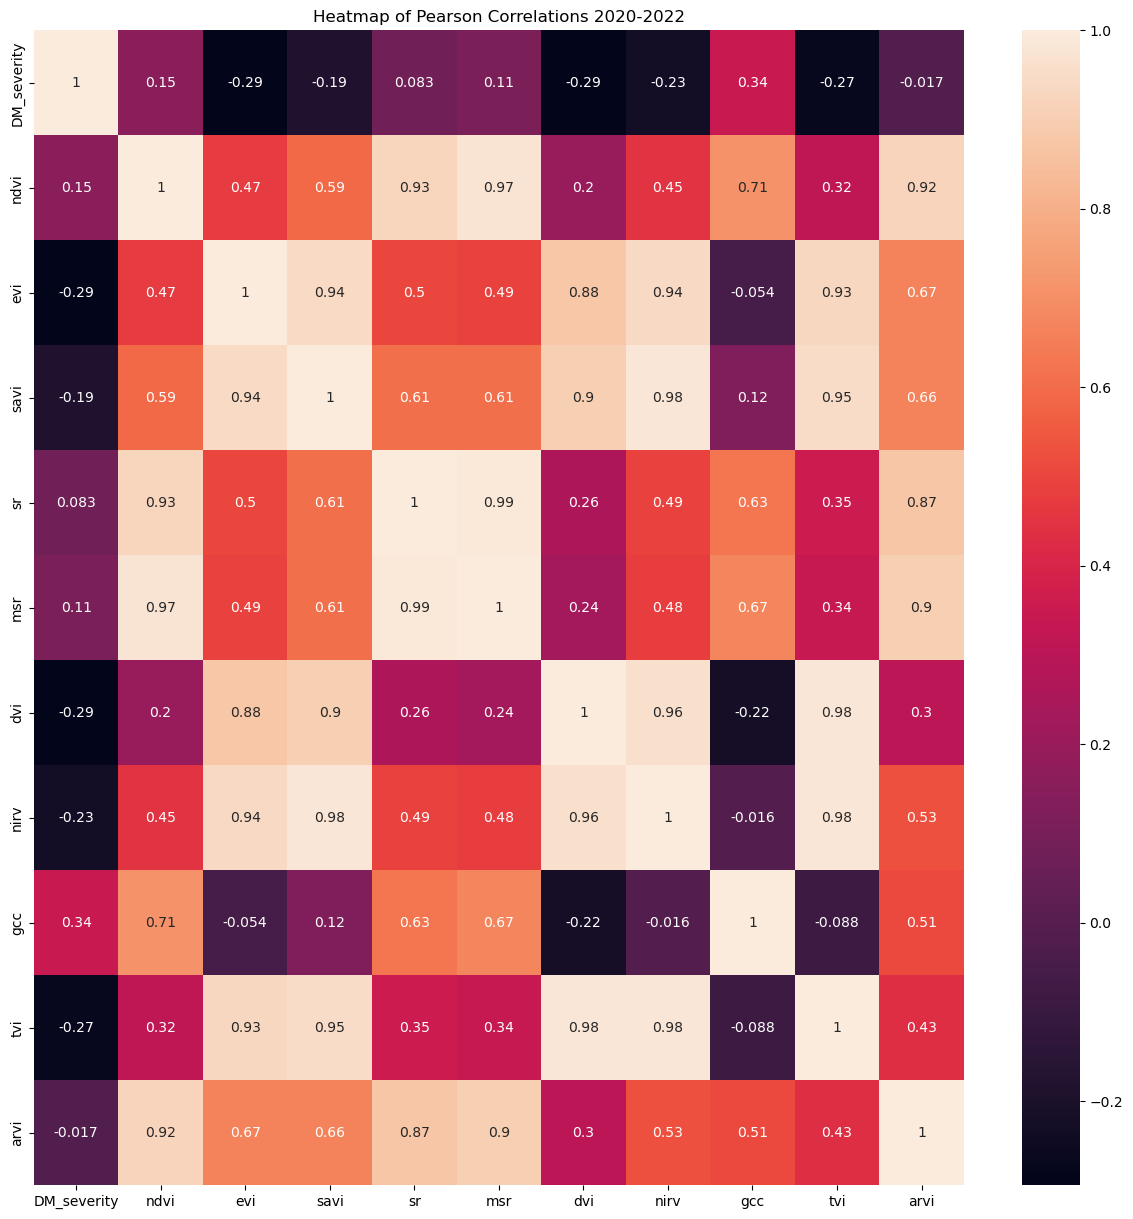

In [68]:
# Visualize correlations between wavelengths, VIs, and disease

# first filter the df to just these columns

skysat_m.columns.unique()

vis = list(skysat_m.columns[10:])
vis
filtered = skysat_m[vis]
correlations = filtered.corr()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlations, annot=True).set(title='Heatmap of Pearson Correlations 2020-2022');
plt.show()

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_8122/2888735740.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_2021 = filtered_2021.corr()


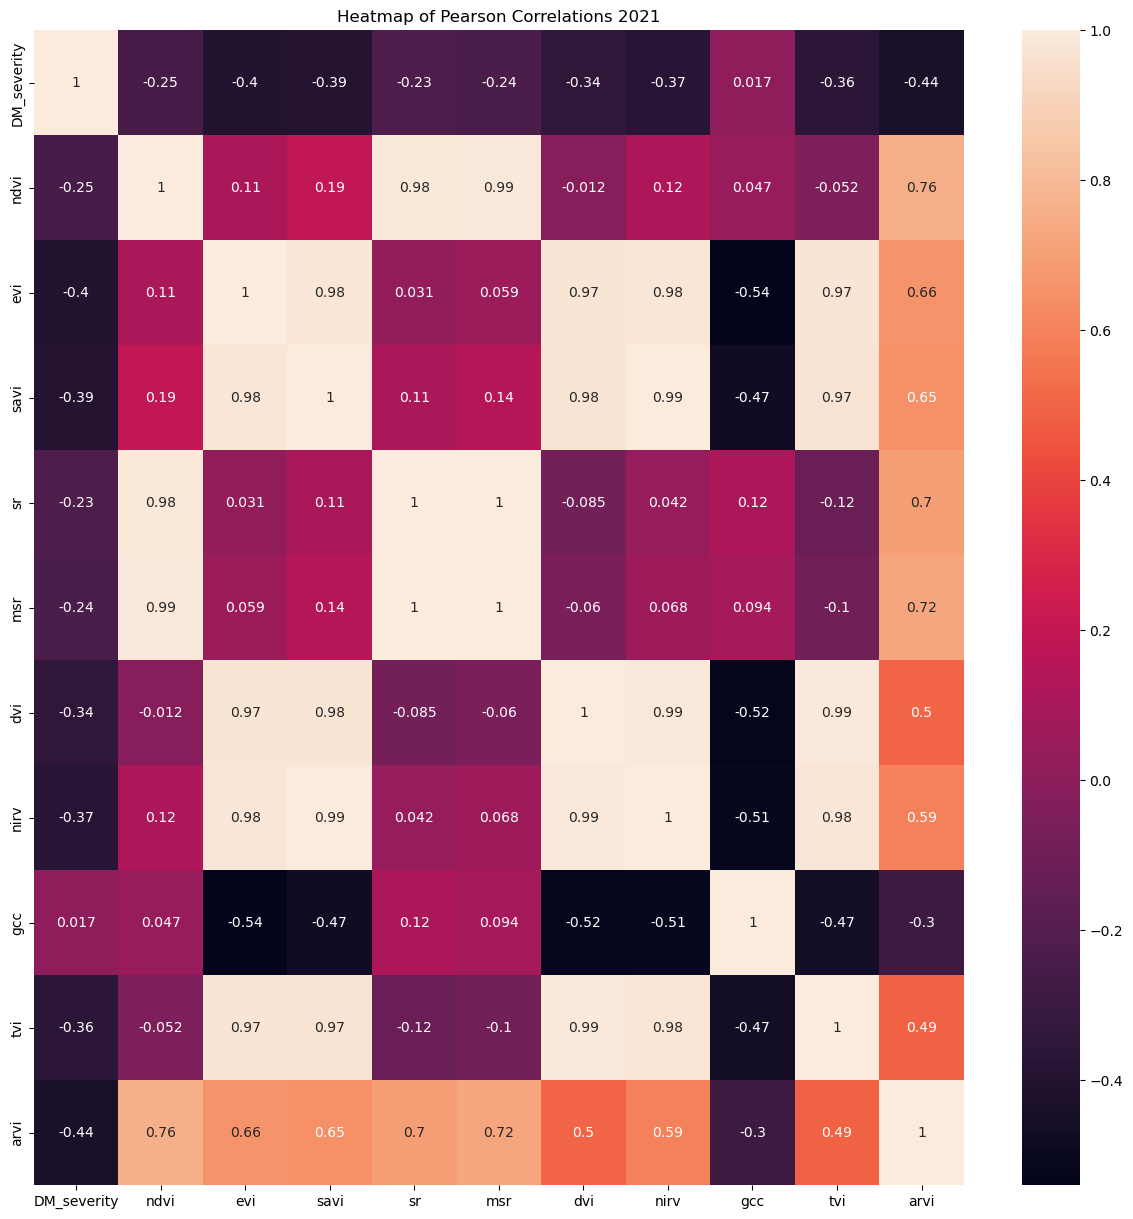

In [69]:
df_2021 = skysat_m[skysat_m['Date'].isin(ss_2021_dates)]
filtered_2021 = df_2021[vis]
correlations_2021 = filtered_2021.corr()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlations_2021, annot=True).set(title='Heatmap of Pearson Correlations 2021');
plt.show()

In [80]:
final = df_2021[df_2021['Date']=='8/17/21']

final['DM_severity'].min()
final[final['DM_severity']==0.1]

acquired  plot      blue     green      red       nir  row  panel  \
537  20210816    68  0.015376  0.067317  0.04719  0.268572    5      4   

        Date  Treatment  ...       evi      savi        sr       msr  \
537  8/17/21       11.0  ...  0.385311  0.407072  5.691341  1.813595   

          dvi      nirv       gcc        tvi      arvi  disease_class  
537  0.221383  0.188298  0.518292  14.088069  0.545403            low  

[1 rows x 22 columns]

In [81]:
treats = [11,20]

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_8122/2022936143.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_2021[df_2021['Treatment'].isin(treats)], x='Date', y= 'DM_severity', hue='Treatment',palette=["#4CAF50", "#000000"], ci=None)


Text(0.5, 1.0, 'Disease progress 2021')

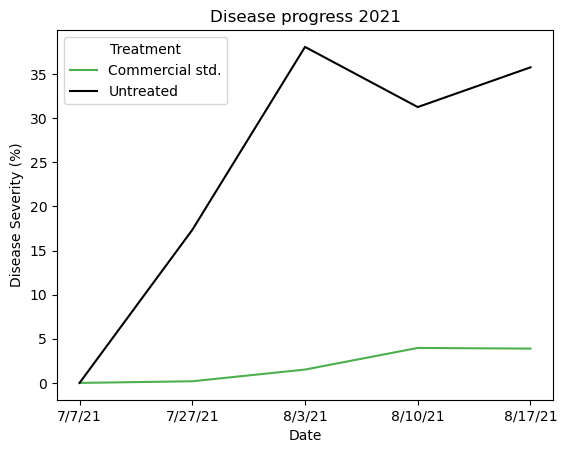

In [95]:
colors = ["#4CAF50", "#FFFFFF"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=df_2021[df_2021['Treatment'].isin(treats)], x='Date', y= 'DM_severity', hue='Treatment',palette=["#4CAF50", "#000000"], ci=None)

plt.ylabel('Disease Severity (%)')
plt.legend(title='Treatment', loc='upper left', labels=['Commercial std.', 'Untreated'])
plt.title('Disease progress 2021')

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_8475/2515273680.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = filtered.corr()


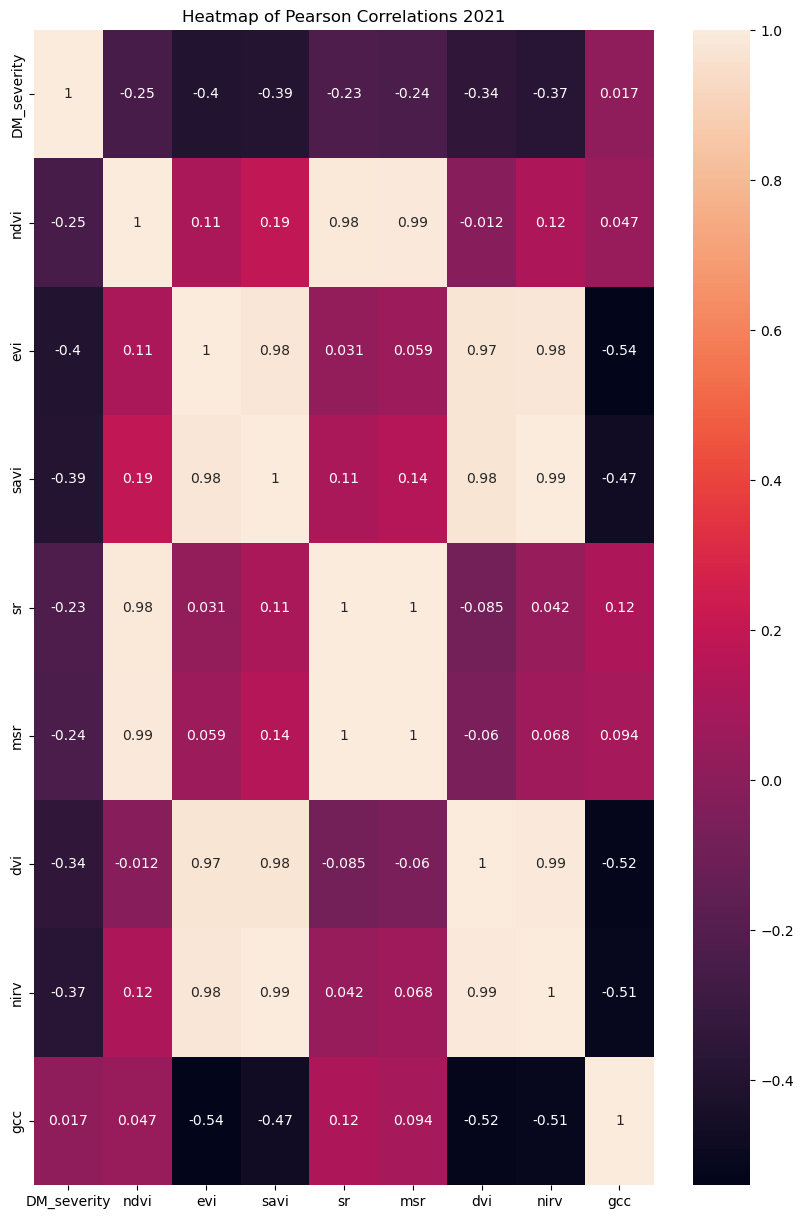

In [87]:
# Visualize correlations between wavelengths, VIs, and disease 2021

# first filter the df to just these columns


df_2021 = skysat_m[skysat_m['Date'].isin(ss_2021_dates)]

cols = ['blue','green','red', 'nir', 'DM_severity', 'ndvi', 'evi', 'savi','sr', 'msr', 'dvi','nirv','gcc']
vis = list(skysat_m.columns[10:])

filtered = df_2021[vis]
correlations = filtered.corr()

fig, ax = plt.subplots(figsize=(10, 15))
sns.heatmap(correlations, annot=True).set(title='Heatmap of Pearson Correlations 2021');
plt.show()

In [13]:
list(skysat_m.columns[11:])

['ndvi', 'evi', 'savi', 'sr', 'msr', 'dvi', 'nirv', 'gcc', 'tvi', 'arvi']

In [9]:
# Get correlation coeff. for all VIs, SkySat 2020-22

corr_df = pd.DataFrame(columns = ['veg_index', 'pearson_r', 'p-value'])
x_var = np.cbrt(skysat_m['DM_severity'])

vis = list(skysat_m.columns[11:])

for vi in vis: 
    y_var = skysat_m[vi]
    sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
    corr_df = corr_df.append({'veg_index' : vi, 'pearson_r' : rval, 'p-value' : pval}, 
                ignore_index = True)
    corr_df = corr_df.sort_values(by=['pearson_r'])
    corr_df = corr_df.reset_index(drop=True)

    
    #corr_df['vi'] = vi
    #corr_df['pearson_r'] = rval
    #corr_df['p-value']= pval
corr_df
    


/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_8122/3274195969.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append({'veg_index' : vi, 'pearson_r' : rval, 'p-value' : pval},
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_8122/3274195969.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append({'veg_index' : vi, 'pearson_r' : rval, 'p-value' : pval},
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_8122/3274195969.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append({'veg_index' : vi, 'pearson_r' : rval, 'p-value' : pval},
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_8122/3274195969.py:11: FutureWarning: The

veg_index  pearson_r       p-value
0       evi  -0.282208  6.250601e-16
1       dvi  -0.250697  8.699418e-13
2       tvi  -0.221755  2.945713e-10
3      nirv  -0.156782  9.551181e-06
4      savi  -0.098203  5.736105e-03
5      arvi   0.046373  1.929073e-01
6        sr   0.238343  1.148638e-11
7       msr   0.265045  3.628560e-14
8      ndvi   0.295507  2.198197e-17
9       gcc   0.526720  1.343998e-57

In [10]:
s = corr_df.style
s.set_caption("Vegetation Index vs. Downy Mildew severity correlations, 2020-22").set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: top; font-size:1.25em;'
 }], overwrite=False)

In [11]:
# correlations with just 2021 data

df_2021 = skysat_m[skysat_m['Date'].isin(ss_2021_dates)]

# Get correlation coeff. for all VIs, SkySat 2021

corr_df_2021 = pd.DataFrame(columns = ['veg_index', 'pearson_r', 'p-value'])
x_var = np.cbrt(df_2021['DM_severity'])

vis = list(df_2021.columns[11:])

for vi in vis: 
    y_var = df_2021[vi]
    sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
    corr_df_2021 = corr_df_2021.append({'veg_index' : vi, 'pearson_r' : rval, 'p-value' : pval}, 
                ignore_index = True)
    corr_df_2021 = corr_df_2021.sort_values(by=['pearson_r'])
    corr_df_2021 = corr_df_2021.reset_index(drop=True)

#corr_df_2021
    
s_2021 = corr_df_2021.style
s_2021.set_caption("Vegetation Index vs. Downy Mildew severity correlations, 2021").set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: top; font-size:1.25em;'
 }], overwrite=False)

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_8122/1613989994.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df_2021 = corr_df_2021.append({'veg_index' : vi, 'pearson_r' : rval, 'p-value' : pval},
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_8122/1613989994.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df_2021 = corr_df_2021.append({'veg_index' : vi, 'pearson_r' : rval, 'p-value' : pval},
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_8122/1613989994.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df_2021 = corr_df_2021.append({'veg_index' : vi, 'pearson_r' : rval, 'p-value' : pval},
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_8122/161398

In [35]:
list(df_2021.columns[2:6])

['blue', 'green', 'red', 'nir']

In [37]:
# Correlations indiv. wavebands

# correlations with just 2021 data

df_2021 = skysat_m[skysat_m['Date'].isin(ss_2021_dates)]

# SkySat 2021

corr_2021_wb = pd.DataFrame(columns = ['waveband', 'pearson_r', 'p-value'])
x_var = np.cbrt(df_2021['DM_severity'])

wbs = list(df_2021.columns[2:6])

for wb in wbs: 
    y_var = df_2021[wb]
    sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
    corr_2021_wb = corr_2021_wb.append({'waveband' : wb, 'pearson_r' : rval, 'p-value' : pval}, 
                ignore_index = True)
    corr_2021_wb = corr_2021_wb.sort_values(by=['pearson_r'])
    corr_2021_wb = corr_2021_wb.reset_index(drop=True)
    
s_2021_wb = corr_2021_wb.style
s_2021_wb.set_caption("Waveband vs. Downy Mildew severity correlations, 2021").set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: top; font-size:1.25em;'
 }], overwrite=False)

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1265/3898964651.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_2021_wb = corr_2021_wb.append({'waveband' : wb, 'pearson_r' : rval, 'p-value' : pval},
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1265/3898964651.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_2021_wb = corr_2021_wb.append({'waveband' : wb, 'pearson_r' : rval, 'p-value' : pval},
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1265/3898964651.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_2021_wb = corr_2021_wb.append({'waveband' : wb, 'pearson_r' : rval, 'p-value' : pval},
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1265/389896465

In [38]:
# Correlations indiv. wavebands

corr_wb = pd.DataFrame(columns = ['waveband', 'pearson_r', 'p-value'])
x_var = np.cbrt(skysat_m['DM_severity'])

wbs = list(skysat_m.columns[2:6])

for wb in wbs: 
    y_var = skysat_m[wb]
    sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
    corr_wb = corr_wb.append({'waveband' : wb, 'pearson_r' : rval, 'p-value' : pval}, 
                ignore_index = True)
    corr_wb = corr_wb.sort_values(by=['pearson_r'])
    corr_wb = corr_wb.reset_index(drop=True)
    
s_wb = corr_wb.style
s_wb.set_caption("Waveband vs. Downy Mildew severity correlations, 2020-22").set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: top; font-size:1.25em;'
 }], overwrite=False)

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1265/2667485837.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_wb = corr_wb.append({'waveband' : wb, 'pearson_r' : rval, 'p-value' : pval},
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1265/2667485837.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_wb = corr_wb.append({'waveband' : wb, 'pearson_r' : rval, 'p-value' : pval},
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1265/2667485837.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_wb = corr_wb.append({'waveband' : wb, 'pearson_r' : rval, 'p-value' : pval},
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1265/2667485837.py:11: FutureWarning: The fr

In [12]:
# Yearly dfs
df_2020 = skysat_m[skysat_m['Date'].isin(ss_2020_dates)]
df_2022 = skysat_m[skysat_m['Date'].isin(ss_2022_dates)]


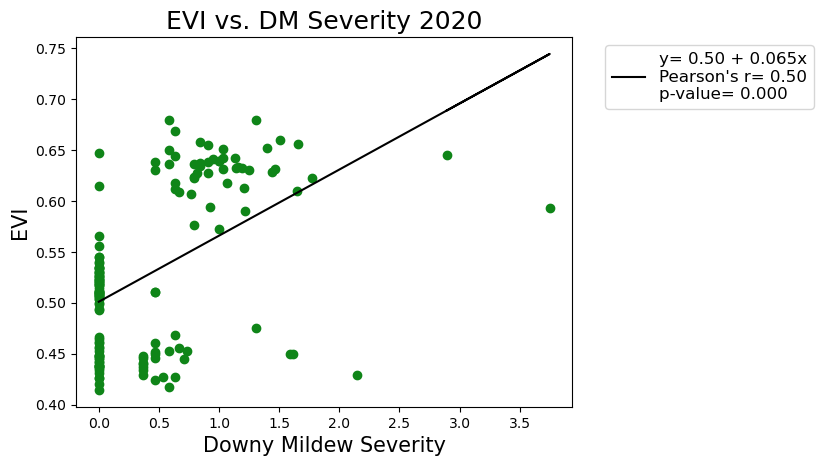

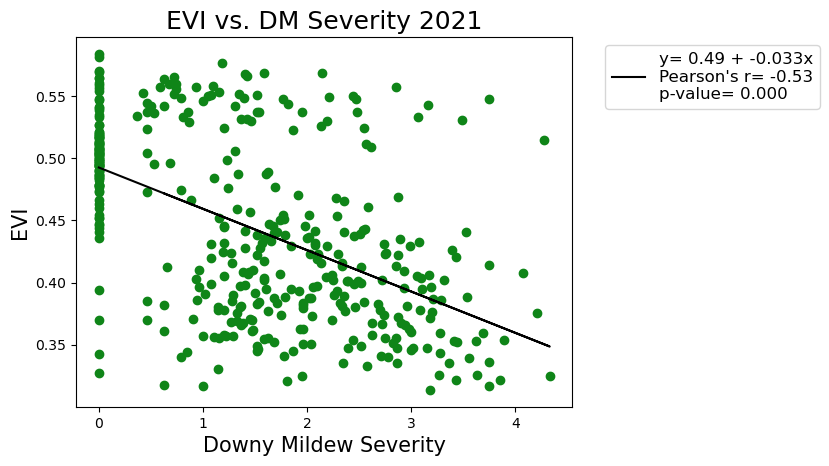

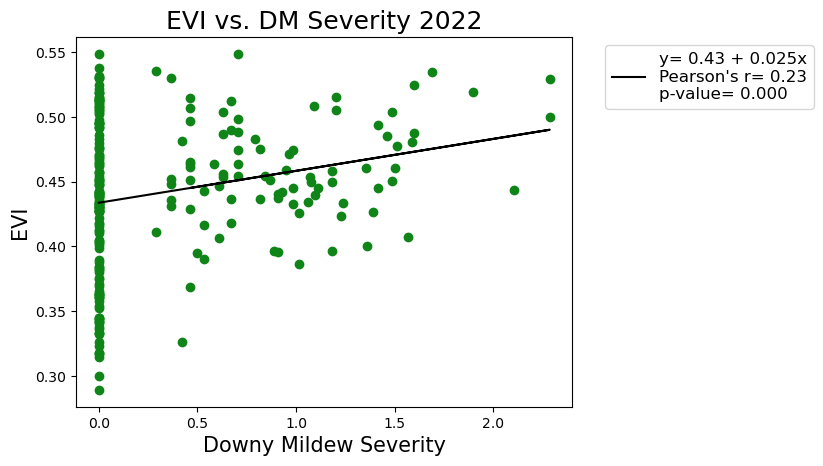

In [13]:
# EVI vs disease per year

#2020
x_var = np.cbrt(df_2020['DM_severity']) # cubic root transform to get more normal distribution
y_var = df_2020['evi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#0F8518") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('EVI', fontsize = 15)
ax.set_title('EVI vs. DM Severity 2020', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

#2021
x_var = np.cbrt(df_2021['DM_severity']) # cubic root transform to get more normal distribution
y_var = df_2021['evi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#0F8518") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('EVI', fontsize = 15)
ax.set_title('EVI vs. DM Severity 2021', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

#2022
x_var = np.cbrt(df_2022['DM_severity']) # cubic root transform to get more normal distribution
y_var = df_2022['evi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#0F8518") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('EVI', fontsize = 15)
ax.set_title('EVI vs. DM Severity 2022', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

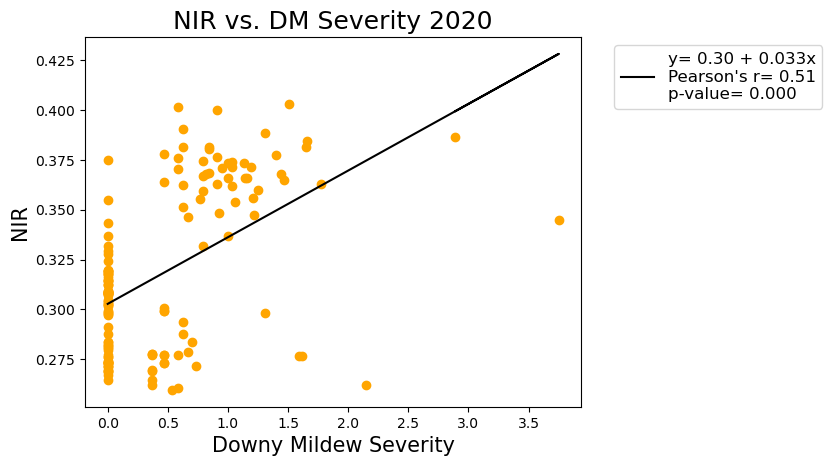

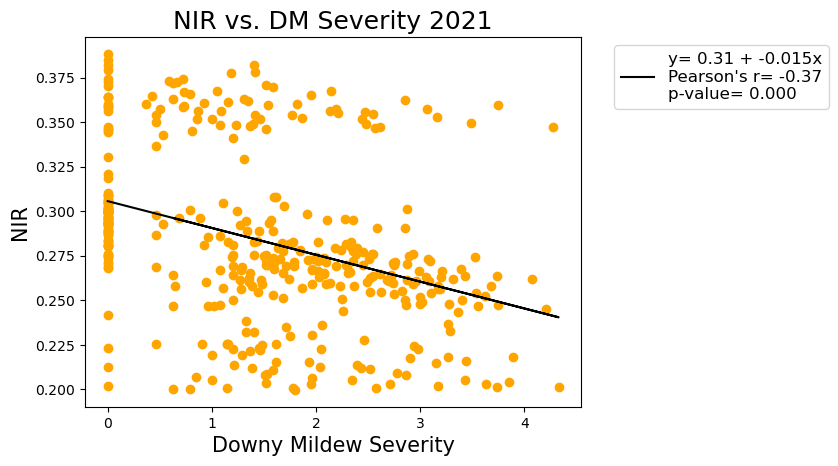

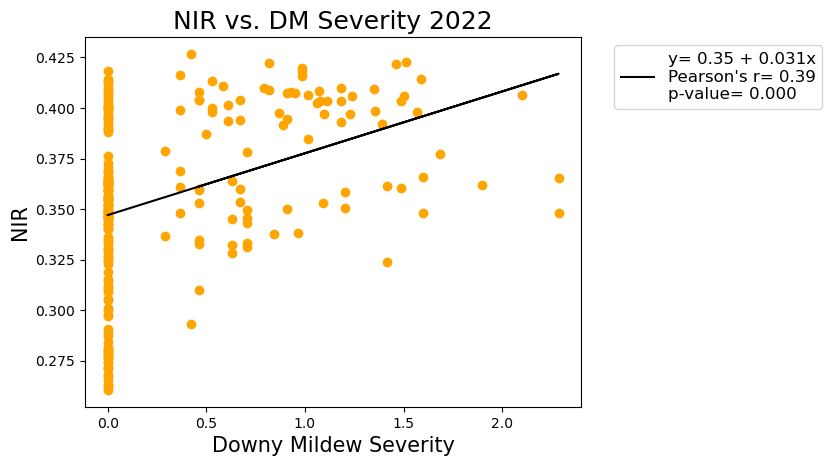

In [46]:
# NIR vs disease per year

#2020
x_var = np.cbrt(df_2020['DM_severity']) # cubic root transform to get more normal distribution
y_var = df_2020['nir'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#FFA500") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('NIR', fontsize = 15)
ax.set_title('NIR vs. DM Severity 2020', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

#2021
x_var = np.cbrt(df_2021['DM_severity']) # cubic root transform to get more normal distribution
y_var = df_2021['nir'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#FFA500") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('NIR', fontsize = 15)
ax.set_title('NIR vs. DM Severity 2021', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

#2022
x_var = np.cbrt(df_2022['DM_severity']) # cubic root transform to get more normal distribution
y_var = df_2022['nir'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#FFA500") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('NIR', fontsize = 15)
ax.set_title('NIR vs. DM Severity 2022', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

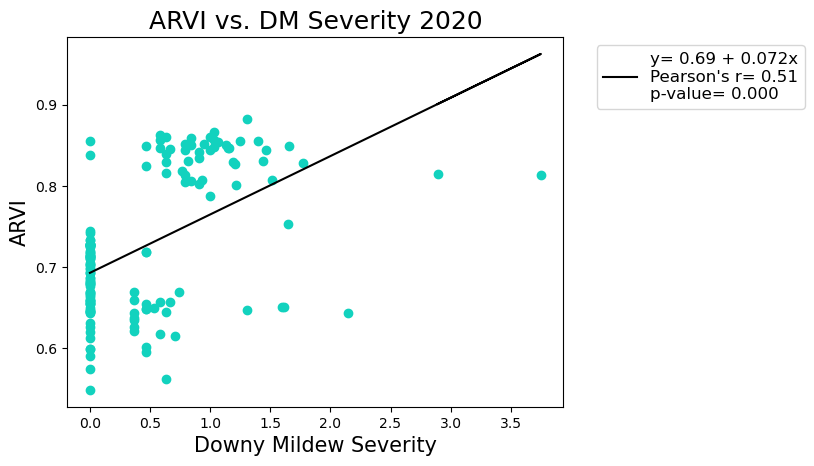

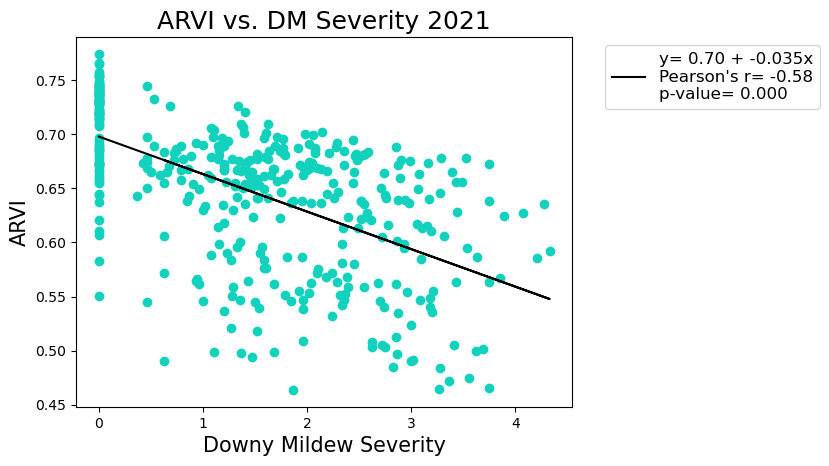

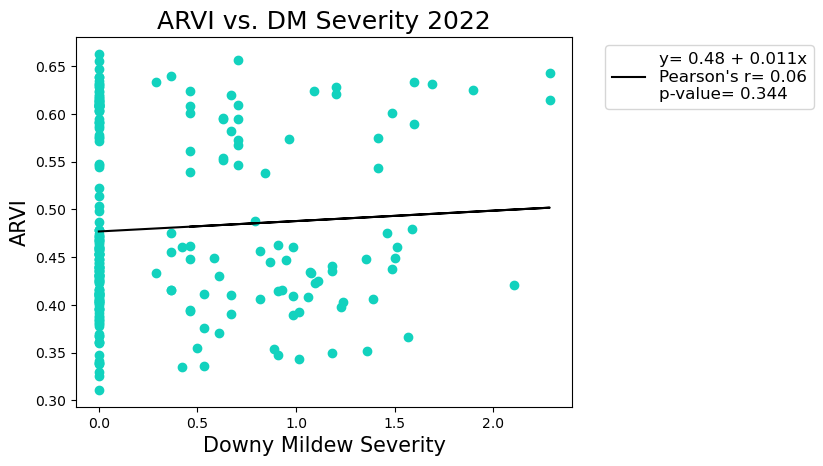

In [14]:
# ARVI vs disease per year

#2020
x_var = np.cbrt(df_2020['DM_severity']) # cubic root transform to get more normal distribution
y_var = df_2020['arvi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#12D2BE") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('ARVI', fontsize = 15)
ax.set_title('ARVI vs. DM Severity 2020', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

#2021
x_var = np.cbrt(df_2021['DM_severity']) # cubic root transform to get more normal distribution
y_var = df_2021['arvi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#12D2BE") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('ARVI', fontsize = 15)
ax.set_title('ARVI vs. DM Severity 2021', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

#2022
x_var = np.cbrt(df_2022['DM_severity']) # cubic root transform to get more normal distribution
y_var = df_2022['arvi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#12D2BE") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('ARVI', fontsize = 15)
ax.set_title('ARVI vs. DM Severity 2022', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

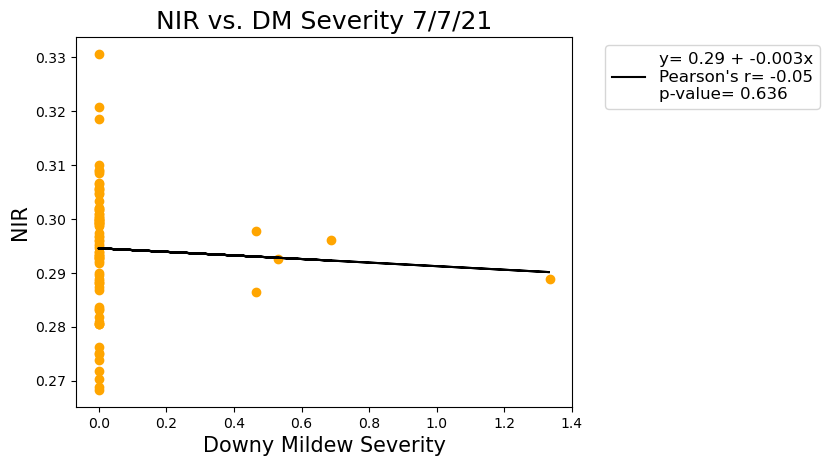

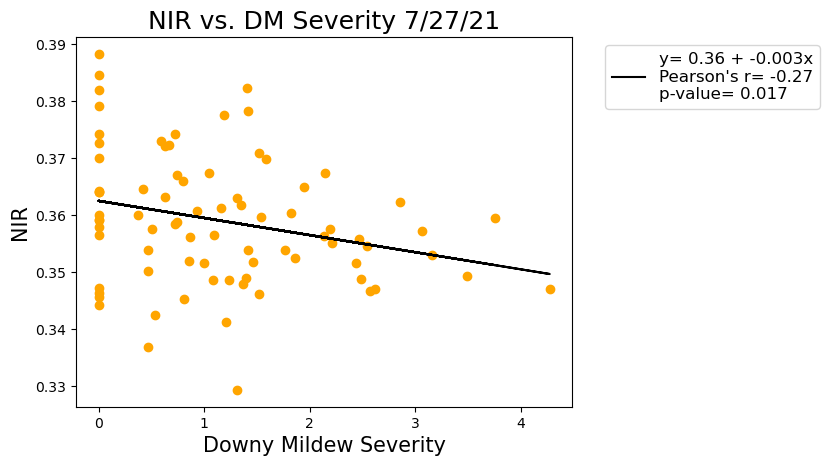

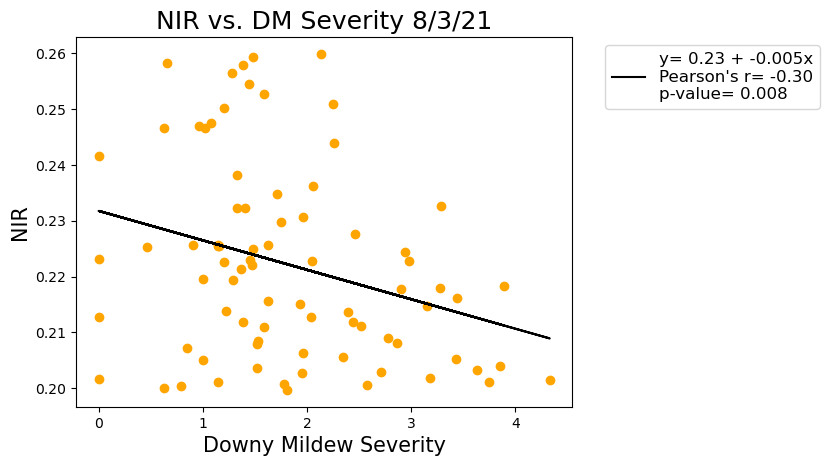

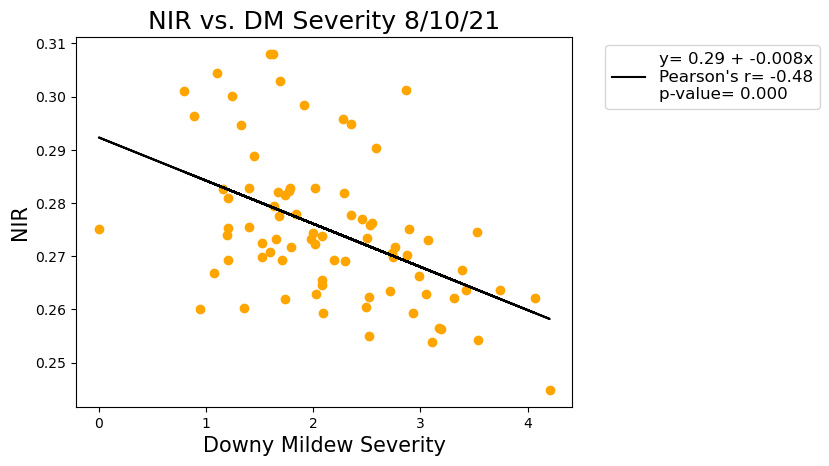

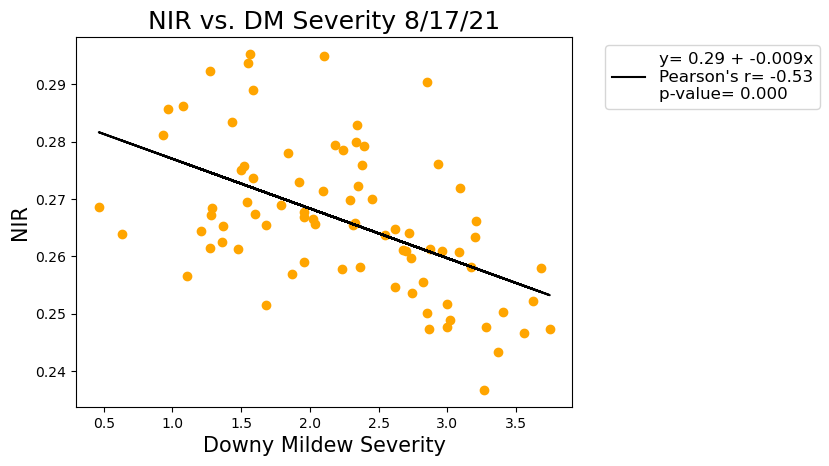

In [52]:
# Daily scatter plots 2021

dates_2021 = df_2021.Date.unique()

daily_data = []

for d in dates_2021:
    daily = df_2021[df_2021['Date']==d]
    daily_data.append(daily)
#NIR     
for df in daily_data:
    x_var = np.cbrt(df['DM_severity']) # cubic root transform to get more normal distribution
    y_var = df['nir'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
    sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
    line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
    
    fig, ax = plt.subplots()
    ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#FFA500")
    ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
    ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
    ax.set_ylabel("NIR", fontsize = 15)
    ax.set_title(f"NIR vs. DM Severity {str(df['Date'].unique())[2:-2]}", fontsize = 18)
    ax.legend(facecolor='white')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
    plt.show()

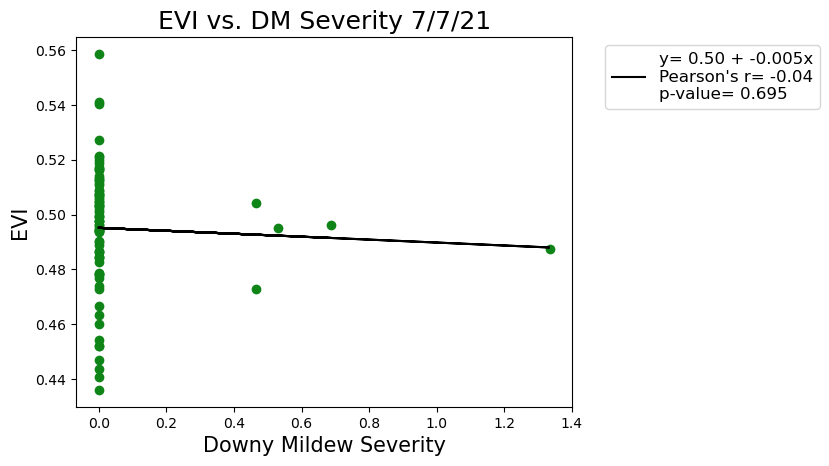

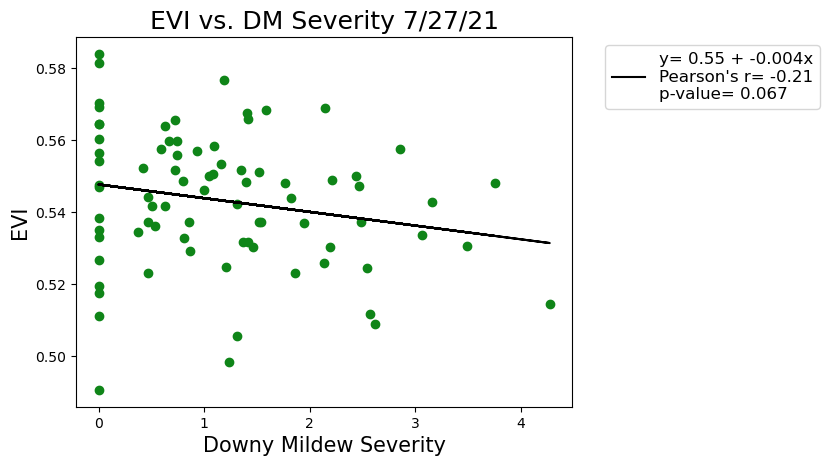

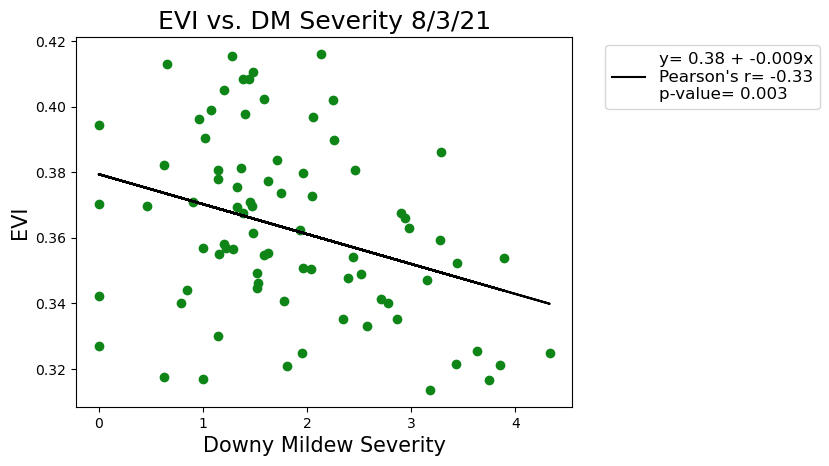

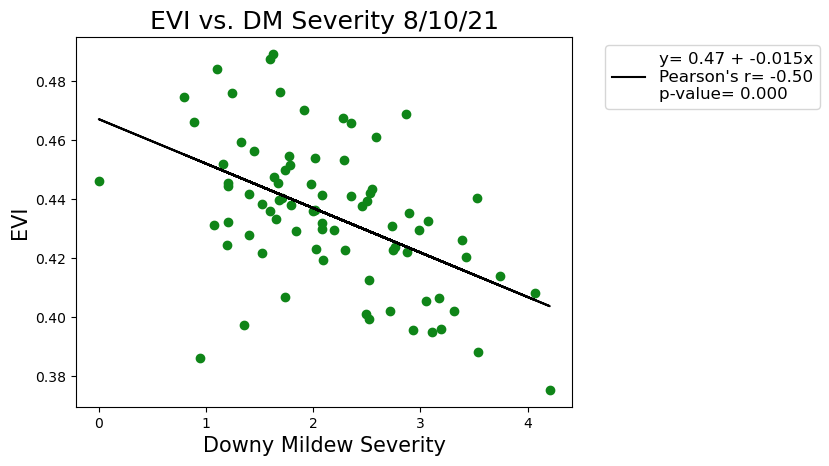

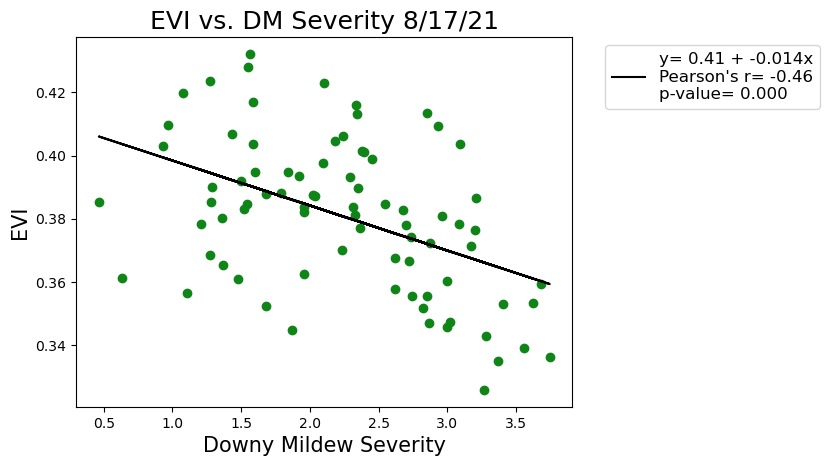

In [15]:
# Daily scatter plots 2021

dates_2021 = df_2021.Date.unique()

daily_data = []

for d in dates_2021:
    daily = df_2021[df_2021['Date']==d]
    daily_data.append(daily)
#EVI     
for df in daily_data:
    x_var = np.cbrt(df['DM_severity']) # cubic root transform to get more normal distribution
    y_var = df['evi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
    sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
    line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
    
    fig, ax = plt.subplots()
    ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#0F8518")
    ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
    ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
    ax.set_ylabel("EVI", fontsize = 15)
    ax.set_title(f"EVI vs. DM Severity {str(df['Date'].unique())[2:-2]}", fontsize = 18)
    ax.legend(facecolor='white')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
    plt.show()

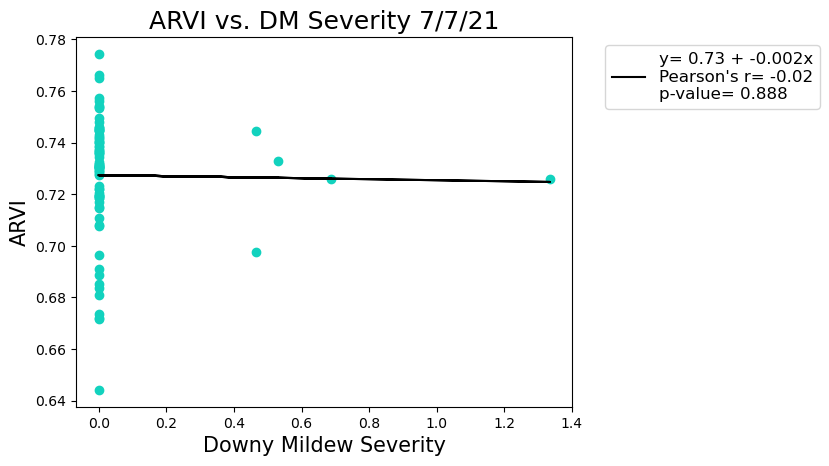

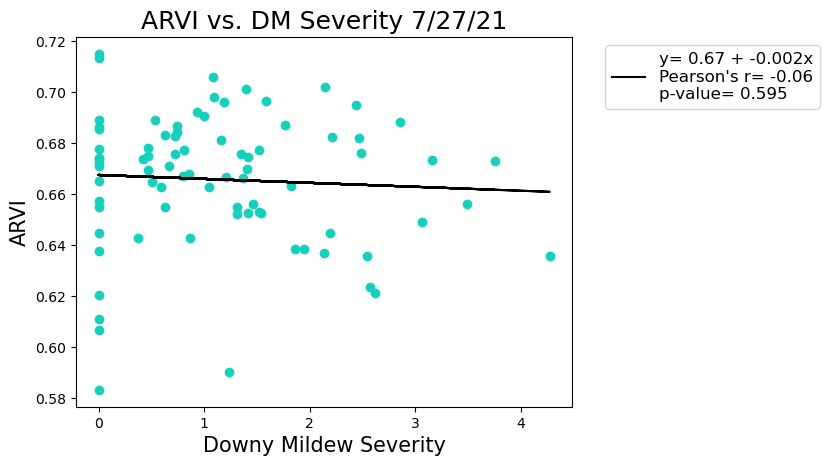

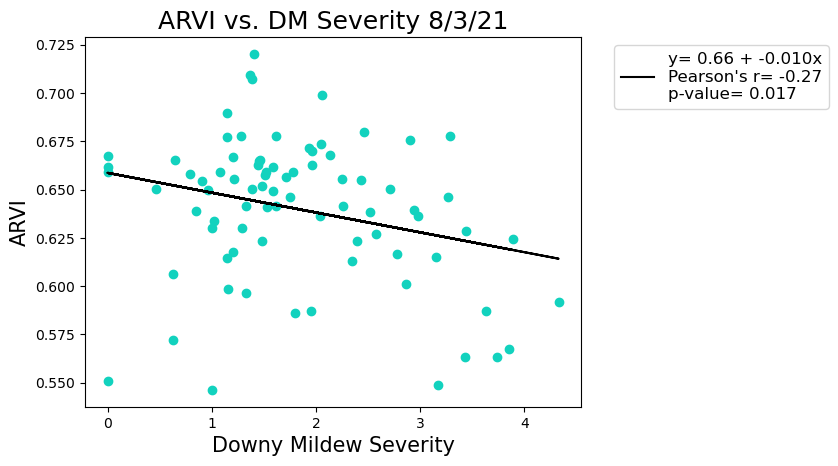

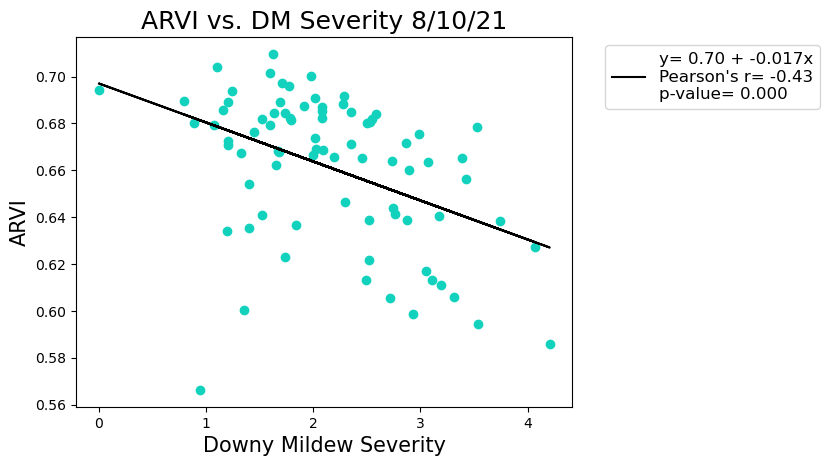

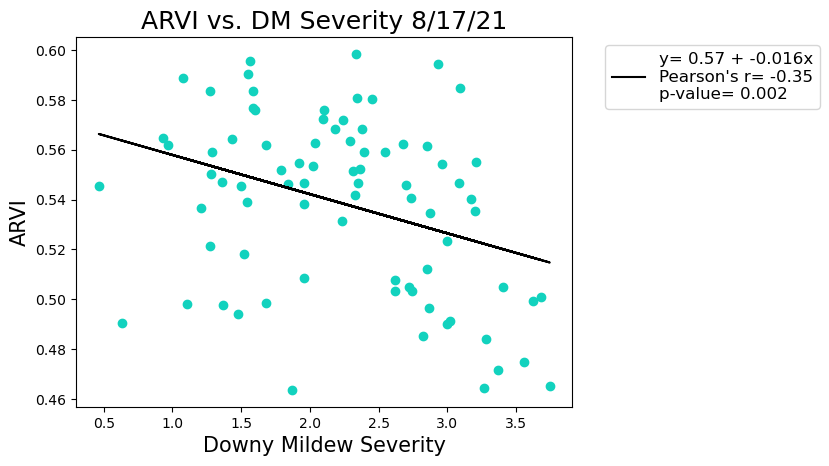

In [16]:
# Daily scatter plots 2021

dates_2021 = df_2021.Date.unique()

daily_data = []

for d in dates_2021:
    daily = df_2021[df_2021['Date']==d]
    daily_data.append(daily)
#ARVI     
for df in daily_data:
    x_var = np.cbrt(df['DM_severity']) # cubic root transform to get more normal distribution
    y_var = df['arvi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
    sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
    line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
    
    fig, ax = plt.subplots()
    ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#12D2BE")
    ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
    ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
    ax.set_ylabel("ARVI", fontsize = 15)
    ax.set_title(f"ARVI vs. DM Severity {str(df['Date'].unique())[2:-2]}", fontsize = 18)
    ax.legend(facecolor='white')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
    plt.show()

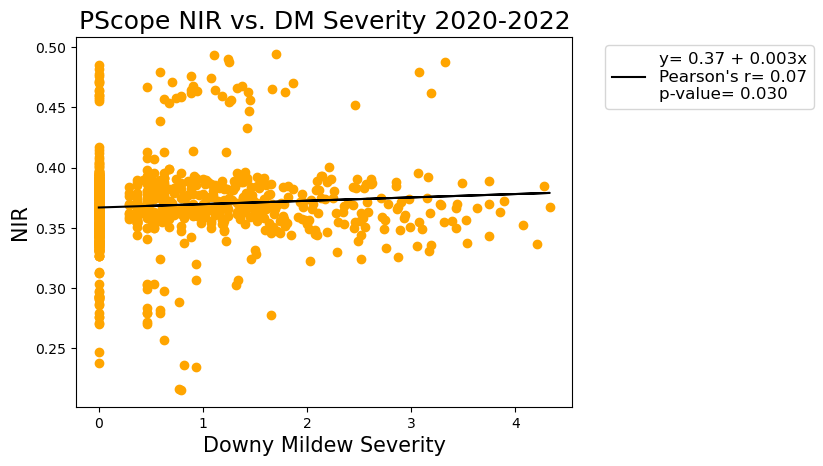

In [58]:
# SkySat Red vs DM severity (cb.rt.)

x_var = np.cbrt(pscope_m['DM_severity']) # cubic root transform to get more normal distribution
y_var = pscope_m['nir'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#FFA500") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('NIR', fontsize = 15)
ax.set_title('PScope NIR vs. DM Severity 2020-2022', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

In [8]:
skysat_m.Date.unique()

array(['25-Jun', '9-Jul', '13-Aug', '7/7/21', '7/27/21', '8/3/21',
       '8/10/21', '8/17/21', '6/22/22', '7/6/22', '7/20/2022'],
      dtype=object)

In [25]:
skysat_m['disease_class'] = 'low'
skysat_m.loc[skysat_m['DM_severity'] > 10, 'disease_class'] = 'high'
skysat_m

df_2021 = skysat_m[skysat_m['Date'].isin(ss_2021_dates)]

In [26]:
high_evi = skysat_m[skysat_m['disease_class']=='high'].evi.mean()
low_evi = skysat_m[skysat_m['disease_class']=='low'].evi.mean()
print(high_evi)
print(low_evi)

0.40802488301858836
0.4691710206295409


In [31]:
high_evi_2021 = df_2021[df_2021['disease_class']=='high'].evi.mean()
low_evi_2021 = df_2021[df_2021['disease_class']=='low'].evi.mean()
print(high_evi_2021)
print(low_evi_2021)

0.4026880372836026
0.46048877360592066


In [27]:
high_savi = skysat_m[skysat_m['disease_class']=='high'].savi.mean()
low_savi = skysat_m[skysat_m['disease_class']=='low'].savi.mean()
print(high_savi)
print(low_savi)

0.41809140470419415
0.4455571392168447


In [32]:
high_savi_2021 = df_2021[df_2021['disease_class']=='high'].savi.mean()
low_savi_2021 = df_2021[df_2021['disease_class']=='low'].savi.mean()
print('SAVI 2021:')
print(high_savi_2021)
print(low_savi_2021)

SAVI 2021:
0.41457875773710473
0.4478894731921651


In [28]:
high_arvi = skysat_m[skysat_m['disease_class']=='high'].arvi.mean()
low_arvi = skysat_m[skysat_m['disease_class']=='low'].arvi.mean()
print('high arvi:',high_arvi)
print('low arvi:',low_arvi)

high arvi: 0.604966906589533
low arvi: 0.6124007049203036


In [33]:
high_arvi_2021 = df_2021[df_2021['disease_class']=='high'].arvi.mean()
low_arvi_2021 = df_2021[df_2021['disease_class']=='low'].arvi.mean()
print('ARVI 2021:')
print(high_arvi_2021)
print(low_arvi_2021)

ARVI 2021:
0.6010495647505495
0.6657926453913524


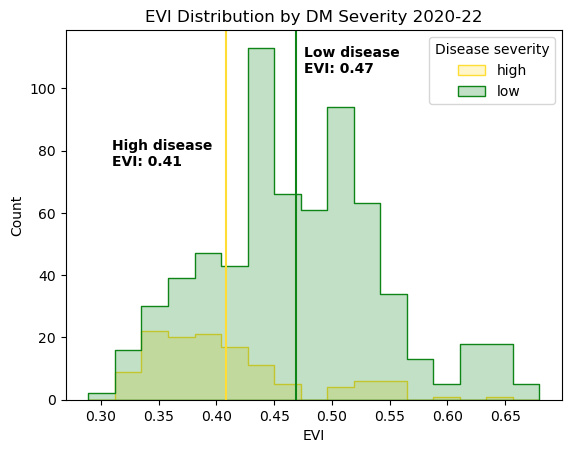

In [29]:
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=skysat_m, x="evi", hue="disease_class", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease severity', loc='upper right', labels=['high', 'low'])

# Add lines for mean EVI

#high disease
plt.axvline(x=skysat_m[skysat_m['disease_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.31, 75, "High disease \nEVI: 0.41", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=skysat_m[skysat_m['disease_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.476, 105, "Low disease \nEVI: 0.47", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Severity 2020-22')
plt.savefig("evi_hist.png")
plt.show()


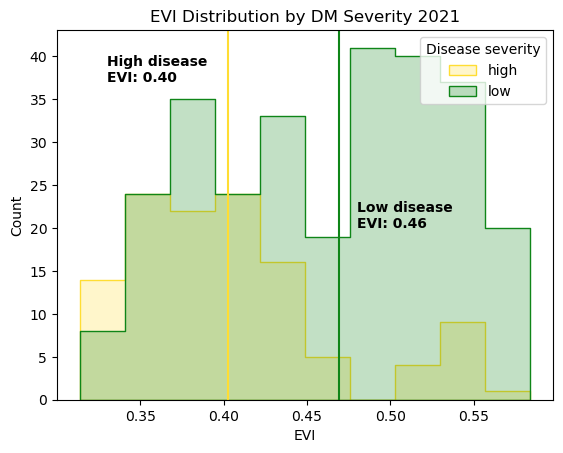

In [30]:
#EVI 2021
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=df_2021, x="evi", hue="disease_class", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease severity', loc='upper right', labels=['high', 'low'])

# Add lines for mean EVI

#high disease
plt.axvline(x=df_2021[df_2021['disease_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.33, 37, "High disease \nEVI: 0.40", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=skysat_m[skysat_m['disease_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.48, 20, "Low disease \nEVI: 0.46", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Severity 2021')
#plt.savefig("evi_hist_2021.png")
plt.show()



In [34]:
high_arvi_2021 = df_2021[df_2021['disease_class']=='high'].arvi.mean()
low_arvi_2021 = df_2021[df_2021['disease_class']=='low'].arvi.mean()
high_evi_2021 = df_2021[df_2021['disease_class']=='high'].evi.mean()
low_evi_2021 = df_2021[df_2021['disease_class']=='low'].evi.mean()
print('high arvi:',high_arvi_2021)
print('low arvi:',low_arvi_2021)
print('high evi:',high_evi_2021)
print('low evi:',low_evi_2021)

high arvi: 0.6010495647505495
low arvi: 0.6657926453913524
high evi: 0.4026880372836026
low evi: 0.46048877360592066


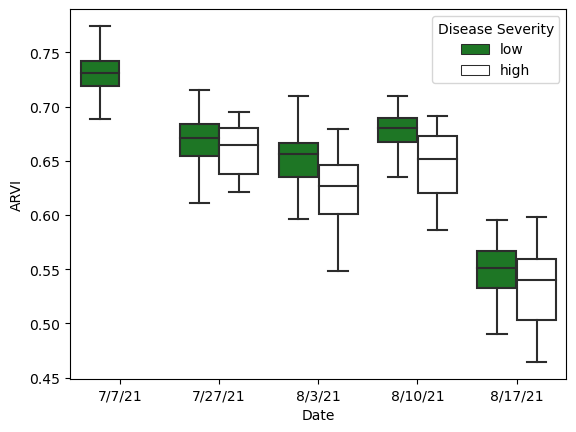

In [65]:
colors = ["#0F8518", "#FFFFFF"]
sns.set_palette(colors)
sns.boxplot(data=df_2021, x='Date', y='arvi', hue='disease_class',showfliers=False)
plt.ylabel('ARVI')
plt.legend(title='Disease Severity')


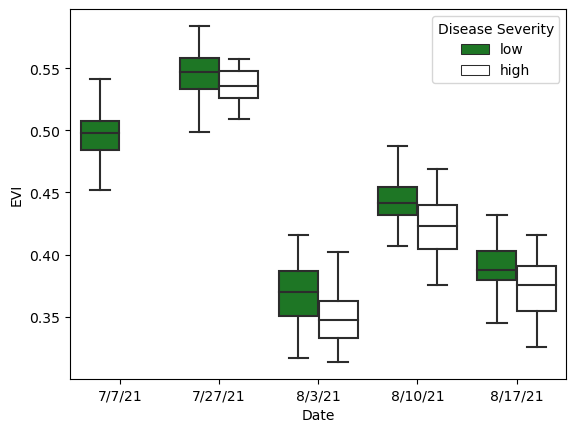

In [66]:
sns.boxplot(data=df_2021, x='Date', y='evi', hue='disease_class', showfliers=False)

plt.ylabel('EVI')
plt.legend(title='Disease Severity')

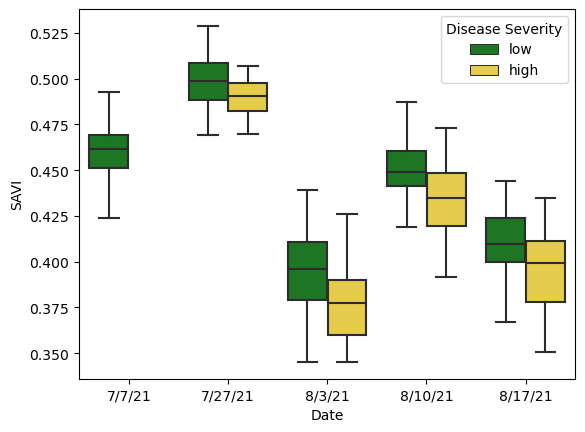

In [43]:
sns.boxplot(data=df_2021, x='Date', y='savi', hue='disease_class', showfliers=False)
plt.ylabel('SAVI')
plt.legend(title='Disease Severity')

In [112]:
len(df_2021[df_2021['disease_class']=='high'])

119

In [113]:
len(df_2021[df_2021['disease_class']=='low'])

281

In [114]:
len(skysat_m[skysat_m['disease_class']=='low'])

667

In [115]:
len(skysat_m[skysat_m['disease_class']=='high'])

123

In [44]:
from scipy import stats
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2)
    return print("Mann-Whitney U:", u_statistic, "p-value:", p_value)


#### MAIN FUNCTION ####
#Perform the Mann-Whitney U Test on the two distributions

high_2021 = df_2021[df_2021['disease_class']=='high']
low_2021 = df_2021[df_2021['disease_class']=='low']
high_all = skysat_m[skysat_m['disease_class']=='high']
low_all = skysat_m[skysat_m['disease_class']=='low']


In [45]:
mann_whitney_u_test(list(high_2021['evi']), list(low_2021['evi']))

Mann-Whitney U: 9043.0 p-value: 3.8280110533687407e-13


In [46]:
mann_whitney_u_test(list(high_all['evi']), list(low_all['evi']))

Mann-Whitney U: 21312.0 p-value: 2.3548252999760747e-17


In [47]:
mann_whitney_u_test(list(high_all['arvi']), list(low_all['arvi']))

Mann-Whitney U: 35471.0 p-value: 0.017024808246395056


In [48]:
mann_whitney_u_test(list(high_2021['arvi']), list(low_2021['arvi']))

Mann-Whitney U: 7421.0 p-value: 1.418789331476936e-18


In [49]:
mann_whitney_u_test(list(high_2021['nir']), list(low_2021['nir']))

Mann-Whitney U: 10056.5 p-value: 2.9243890269754955e-10


In [50]:
mann_whitney_u_test(list(high_all['nir']), list(low_all['nir']))

Mann-Whitney U: 16425.5 p-value: 3.84698328331016e-26


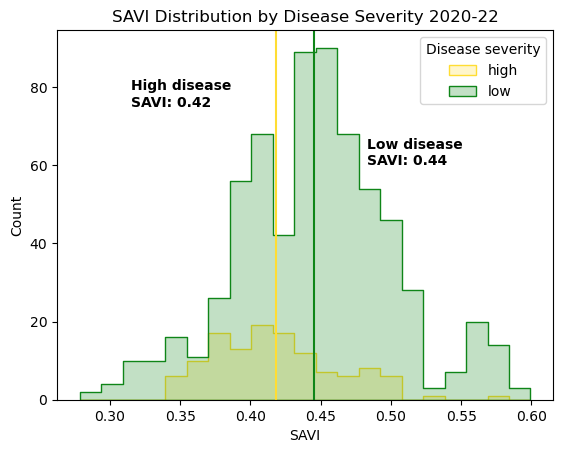

In [20]:
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=skysat_m, x="savi", hue="disease_class", element='step')

plt.xlabel('SAVI')
plt.ylabel('Count')
plt.legend(title='Disease severity', loc='upper right', labels=['high', 'low'])

# Add lines for mean EVI

#high disease
plt.axvline(x=skysat_m[skysat_m['disease_class']=='high'].savi.mean(),
            color="#FFDD33")
plt.text(0.315, 75, "High disease \nSAVI: 0.42", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=skysat_m[skysat_m['disease_class']=='low'].savi.mean(),
            color="#0F8518")

plt.text(0.483, 60, "Low disease \nSAVI: 0.44", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('SAVI Distribution by Disease Severity 2020-22')
plt.savefig("savi_hist.png")
plt.show()


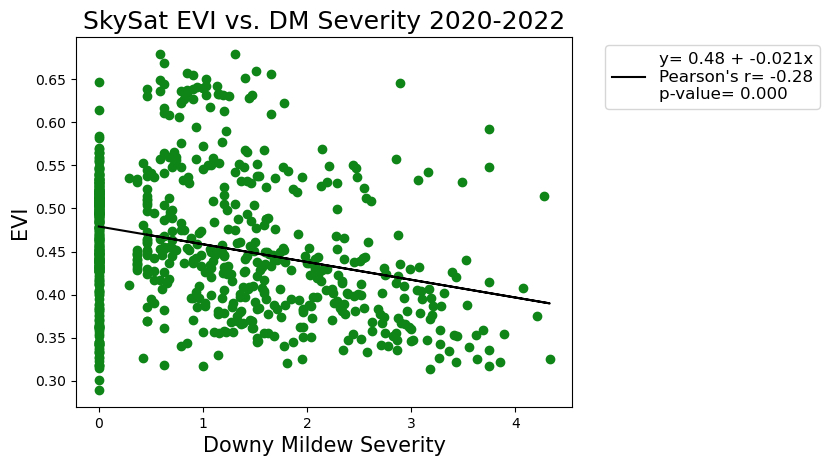

In [90]:

# SkySat NIR vs DM severity (cb.rt.)

x_var = np.cbrt(skysat_m['DM_severity']) # cubic root transform to get more normal distribution
y_var = skysat_m['evi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#0F8518") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('EVI', fontsize = 15)
ax.set_title('SkySat EVI vs. DM Severity 2020-2022', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

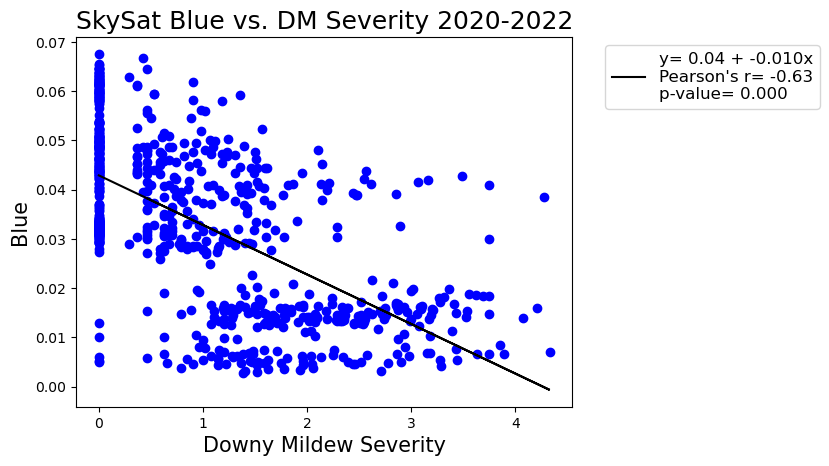

In [19]:

# SkySat Blue vs DM severity (cb.rt.)

x_var = np.cbrt(skysat_m['DM_severity']) # cubic root transform to get more normal distribution
y_var = skysat_m['blue'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#0000FF") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('Blue', fontsize = 15)
ax.set_title('SkySat Blue vs. DM Severity 2020-2022', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

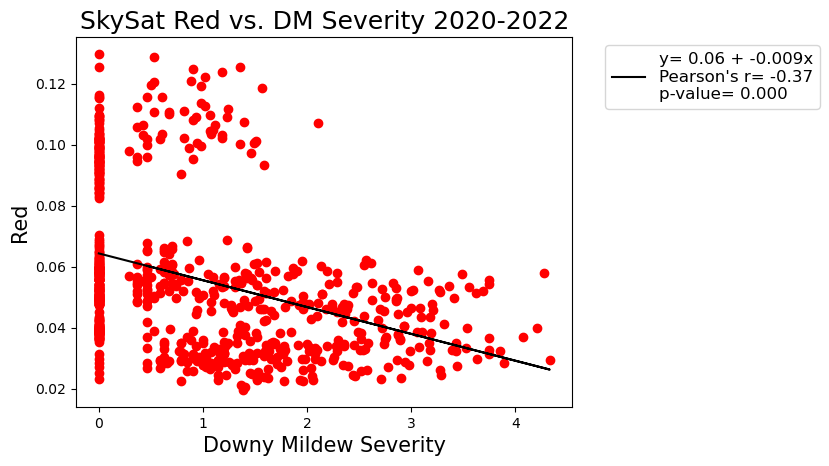

In [15]:
# SkySat Red vs DM severity (cb.rt.)

x_var = np.cbrt(skysat_m['DM_severity']) # cubic root transform to get more normal distribution
y_var = skysat_m['red'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#FF0000") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('Red', fontsize = 15)
ax.set_title('SkySat Red vs. DM Severity 2020-2022', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

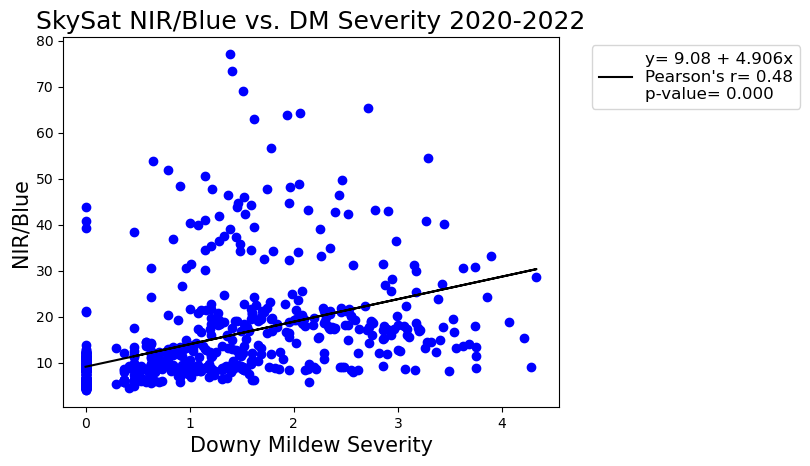

In [16]:
# SkySat NIR/Blue vs DM severity (cb.rt.)

x_var = np.cbrt(skysat_m['DM_severity']) # cubic root transform to get more normal distribution
y_var = skysat_m['nir']/skysat_m['blue'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = '#0000FF')#"#4CAF50") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('NIR/Blue', fontsize = 15)
ax.set_title('SkySat NIR/Blue vs. DM Severity 2020-2022', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

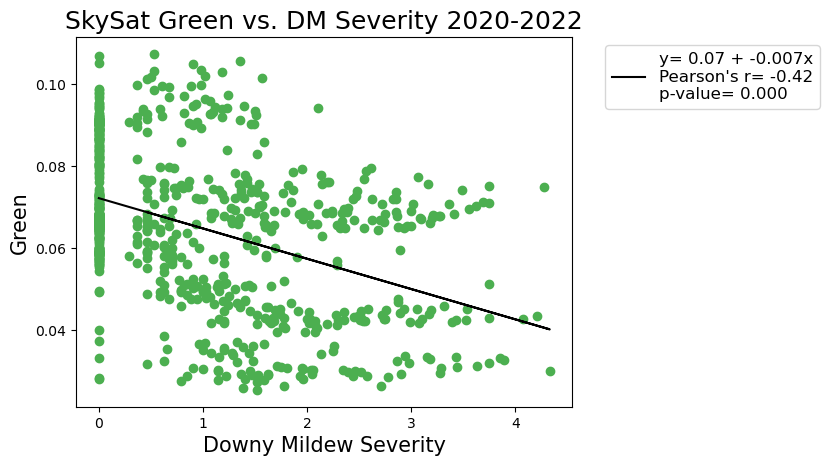

In [17]:
# SkySat Green vs DM severity (cb.rt.)

x_var = np.cbrt(skysat_m['DM_severity']) # cubic root transform to get more normal distribution
y_var = skysat_m['green'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#4CAF50") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('Green', fontsize = 15)
ax.set_title('SkySat Green vs. DM Severity 2020-2022', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

In [22]:
def get_vi_corr(data,x,y):
    
    dates = data["acquired"].unique()
    
    daily_data = []
    
    for d in dates:
        daily = data[data['acquired']==d]
        daily_data.append(daily)
        
    for df in daily_data:
        x_var = np.cbrt(df[x]) # cubic root transform to get more normal distribution
        y_var = df[y] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
        sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
        line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
        
        fig, ax = plt.subplots()
        ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#4CAF50", label=str(x)) #change to reflect
        ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
        ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
        ax.set_ylabel(f"{y}", fontsize = 15)
        ax.set_title(f"{y} vs. DM Severity {str(df['acquired'].unique())[1:-1]}", fontsize = 18)
        ax.legend(facecolor='white')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
        plt.show()

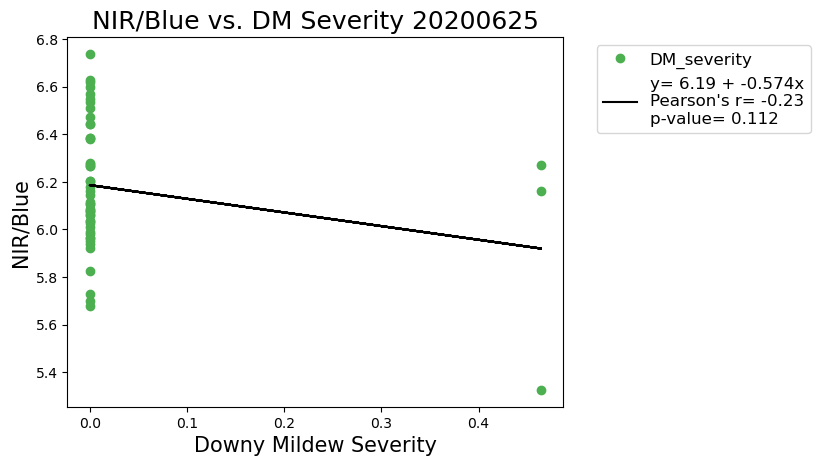

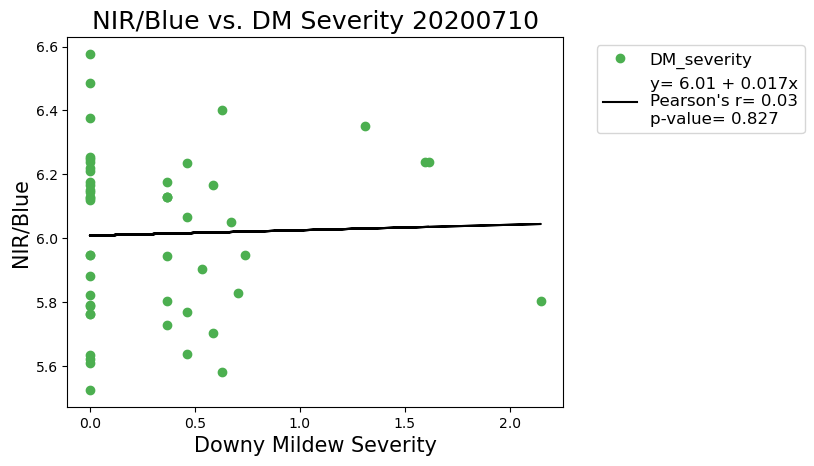

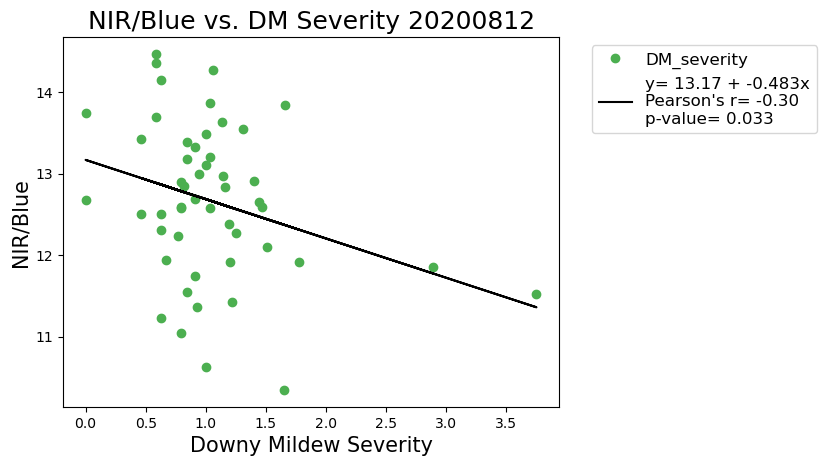

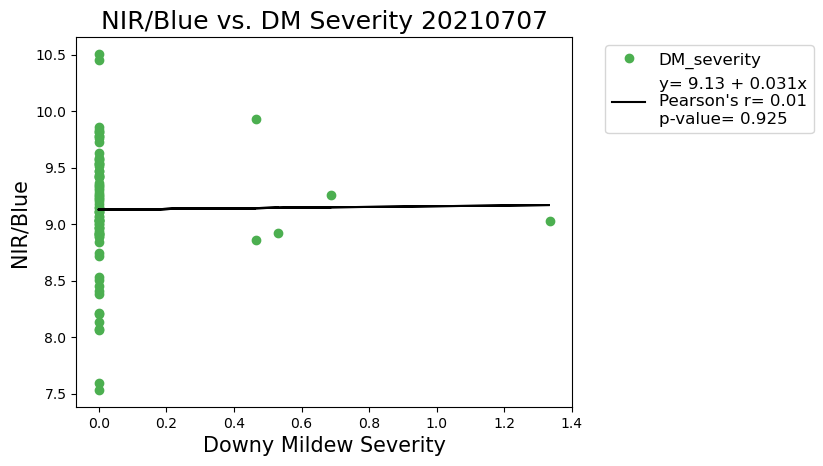

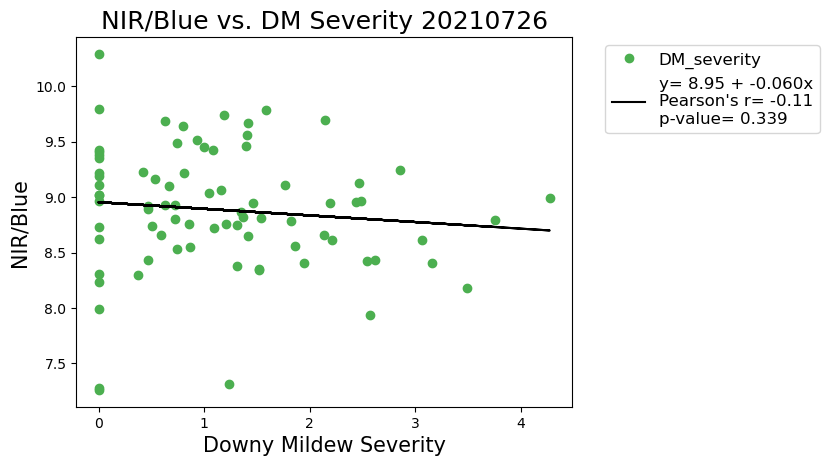

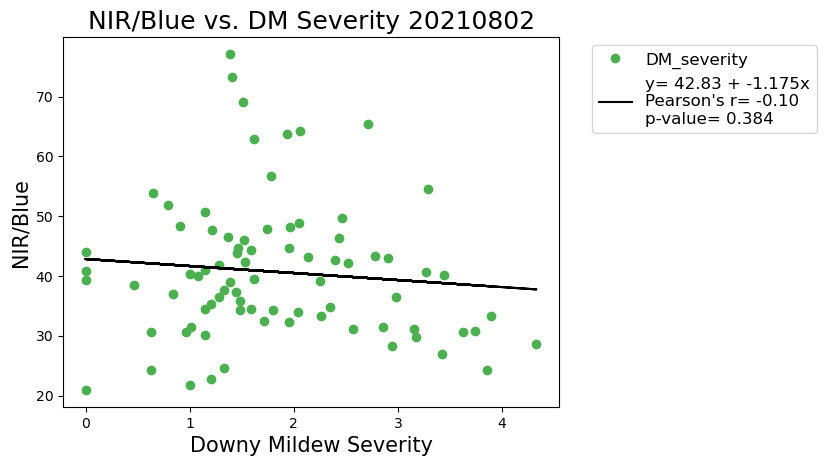

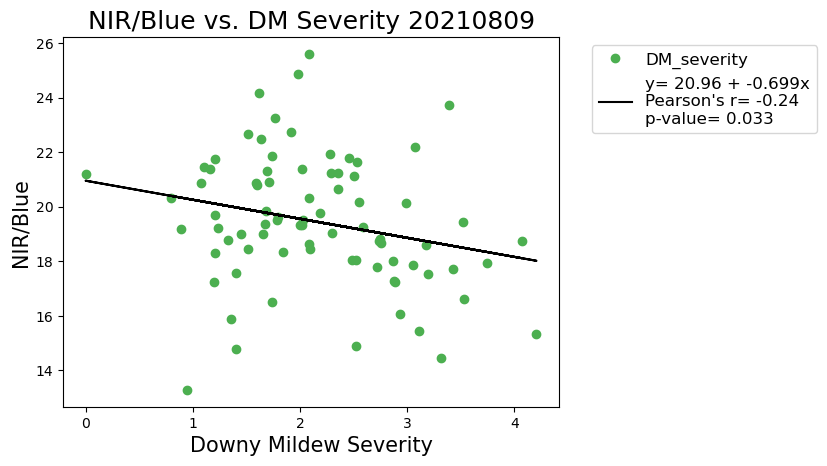

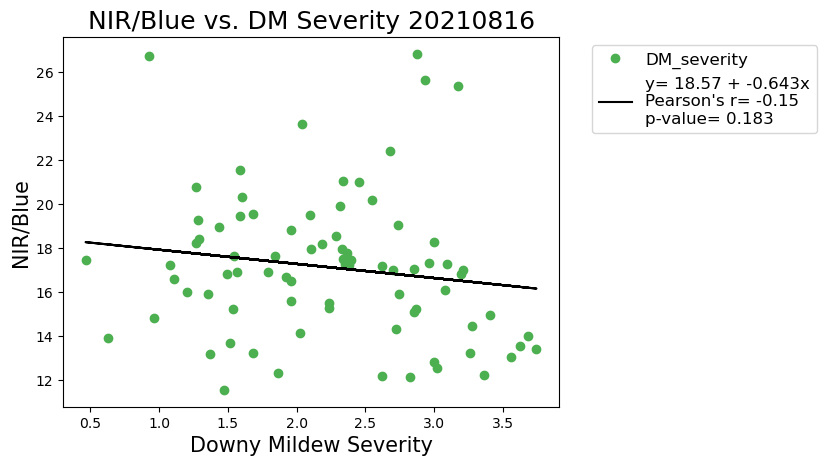

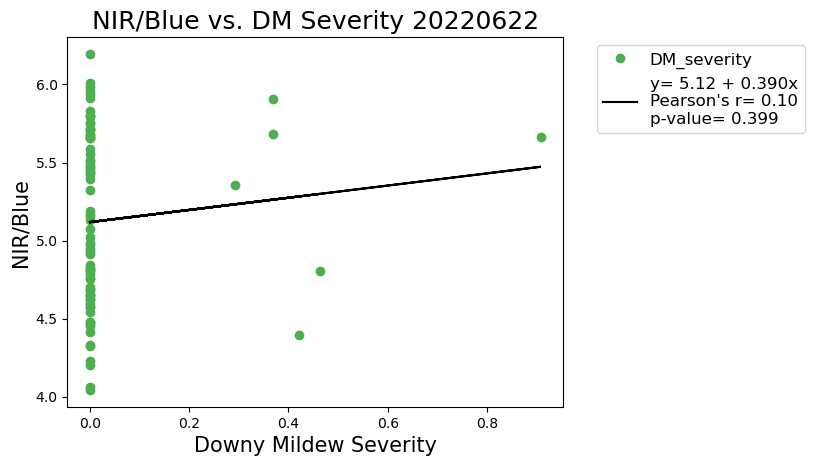

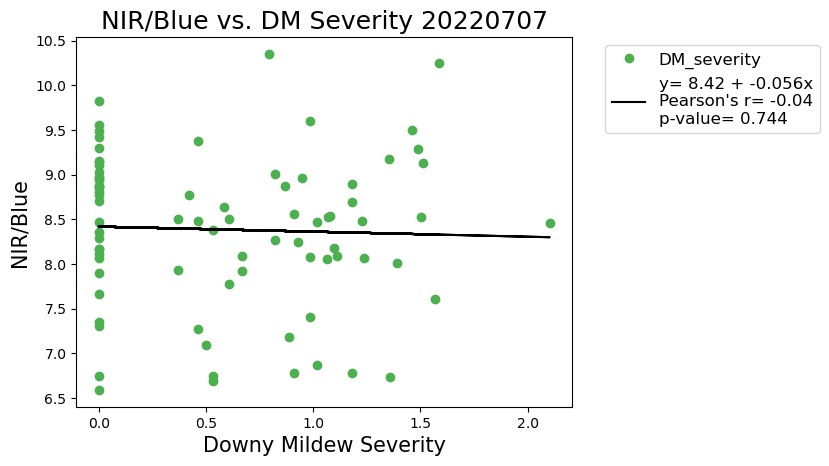

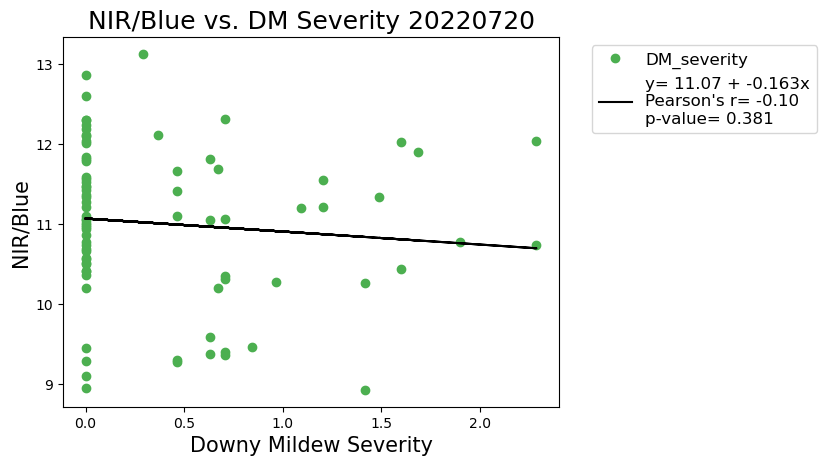

In [48]:
dates = skysat_m["acquired"].unique()
daily_data = []

for d in dates:
    daily = skysat_m[skysat_m['acquired']==d]
    daily_data.append(daily)
        
for df in daily_data:
    x_var = np.cbrt(df['DM_severity']) # cubic root transform to get more normal distribution
    y_var = df['nir']/df['blue'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
    sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
    line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
    
    fig, ax = plt.subplots()
    ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#4CAF50", label='DM_severity') #change to reflect
    ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
    ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
    ax.set_ylabel("NIR/Blue", fontsize = 15)
    ax.set_title(f"NIR/Blue vs. DM Severity {str(df['acquired'].unique())[1:-1]}", fontsize = 18)
    ax.legend(facecolor='white')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
    plt.show()

<AxesSubplot: xlabel='ndvi'>

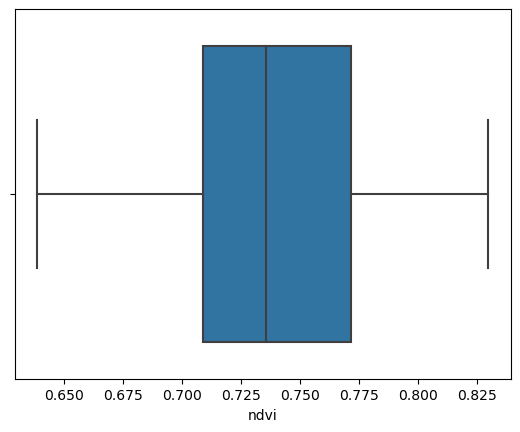

In [17]:
sns.boxplot(skysat_m[skysat_m['disease_class']=='high']['ndvi'])

(array([ 8.,  8.,  4., 20., 20., 17., 15., 22.,  7.,  2.]),
 array([0.63852197, 0.65763234, 0.67674271, 0.69585308, 0.71496345,
        0.73407382, 0.75318419, 0.77229456, 0.79140493, 0.8105153 ,
        0.82962567]),
 <BarContainer object of 10 artists>)

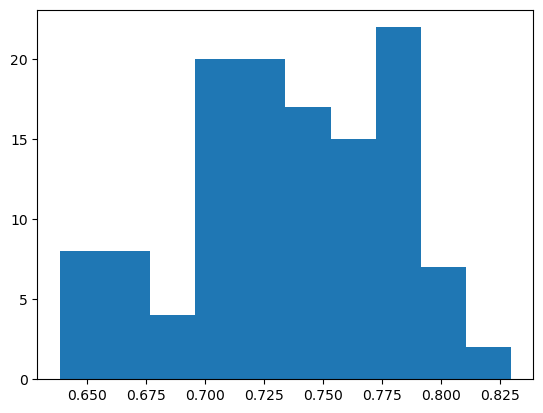

In [19]:
plt.hist(data=skysat_m[skysat_m['disease_class']=='high'], x='ndvi')

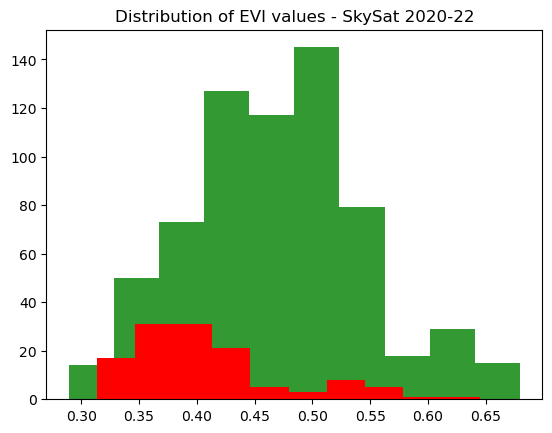

In [30]:
plt.hist(skysat_m[skysat_m['disease_class']=='low']['evi'], facecolor='g', alpha=0.8)
plt.hist(skysat_m[skysat_m['disease_class']=='high']['evi'], facecolor='r', alpha=1)
plt.title('Distribution of EVI values - SkySat 2020-22')
plt.show()

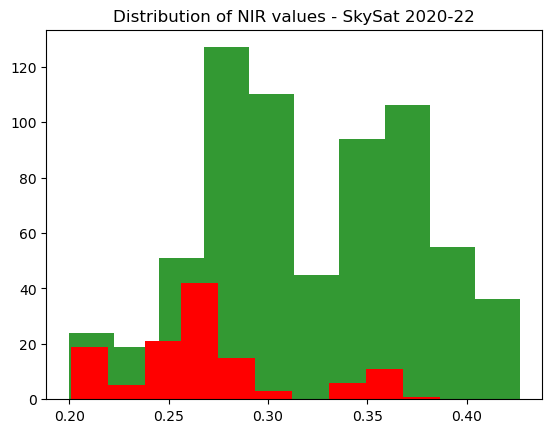

In [34]:
plt.hist(skysat_m[skysat_m['disease_class']=='low']['nir'], facecolor='g', alpha=0.8)
plt.hist(skysat_m[skysat_m['disease_class']=='high']['nir'], facecolor='r', alpha=1)
plt.title('Distribution of NIR values - SkySat 2020-22')
plt.show()

In [37]:
high_ss = skysat_m[skysat_m['disease_class']=='high']
low_ss = skysat_m[skysat_m['disease_class']=='low']


In [38]:
from scipy import stats
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2)
    return print("Mann-Whitney U:", u_statistic, "p-value:", p_value)


#### MAIN FUNCTION ####
#Perform the Mann-Whitney U Test on the two distributions
mann_whitney_u_test(list(high_ss['evi']), list(low_ss['evi']))




Mann-Whitney U: 21312.0 p-value: 2.3548252999760747e-17


In [39]:
# Mann-W NIR

mann_whitney_u_test(list(high_ss['nir']), list(low_ss['nir']))

Mann-Whitney U: 16425.5 p-value: 3.84698328331016e-26


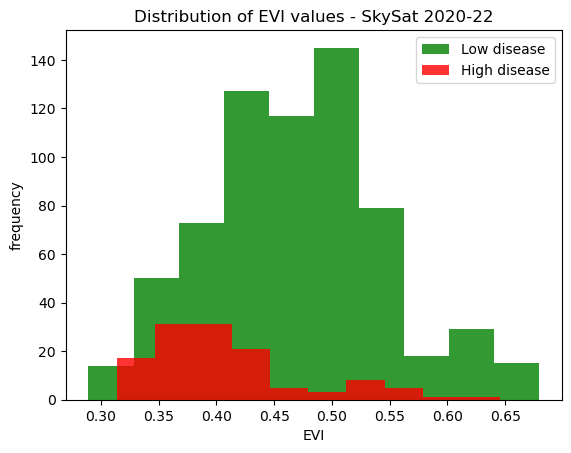

In [10]:
plt.hist(skysat_m[skysat_m['disease_class']=='low']['evi'], facecolor='g', alpha=0.8, label='Low disease')
plt.hist(skysat_m[skysat_m['disease_class']=='high']['evi'], facecolor='r', alpha=0.8, label='High disease')
plt.legend(loc='upper right')
plt.xlabel('EVI')
plt.ylabel('frequency')
plt.title('Distribution of EVI values - SkySat 2020-22')
plt.show()

In [20]:
ss_2021_df = skysat_m[skysat_m['Date'].isin(list(ss_2021_dates))]
ss_2021_df

acquired  plot      blue     green       red       nir  row  panel  \
150  20210707     1  0.032006  0.066432  0.040084  0.290003    1      1   
151  20210707     2  0.033528  0.067879  0.043324  0.270290    1      2   
152  20210707     3  0.033903  0.067897  0.042947  0.273817    1      3   
153  20210707     4  0.032868  0.067358  0.042055  0.280455    1      4   
154  20210707     5  0.032104  0.066636  0.038836  0.292664    1      5   
..        ...   ...       ...       ...       ...       ...  ...    ...   
545  20210816    76  0.013168  0.065571  0.042554  0.267446    5     12   
546  20210816    77  0.012586  0.067114  0.047434  0.261448    5     13   
547  20210816    78  0.009743  0.065223  0.044500  0.261313    5     14   
548  20210816    79  0.013334  0.064976  0.045017  0.265424    5     15   
549  20210816    80  0.018947  0.072566  0.054575  0.263987    5     16   

        Date  Treatment  DM_severity      ndvi       evi      savi        sr  \
150   7/7/21        5.0         0.00  0.757132  0.484168  0.451614  7.234911   
151   7/7/21        7.0         0.00  0.723710  0.443716  0.418440  6.238777   
152   7/7/21        9.0         0.00  0.728841  0.451899  0.423997  6.375737   
153   7/7/21       15.0         0.00  0.739203  0.463353  0.434767  6.668789   
154   7/7/21        3.0         0.00  0.765697  0.493868  0.457899  7.535957   
..       ...        ...          ...       ...       ...       ...       ...   
545  8/17/21        9.0         4.10  0.725461  0.394823  0.416468  6.284935   
546  8/17/21       14.0         2.05  0.692864  0.368568  0.396869  5.511777   
547  8/17/21       17.0        23.80  0.708973  0.372470  0.403592  5.872210   
548  8/17/21       15.0        12.35  0.709979  0.383845  0.407939  5.896055   
549  8/17/21       19.0         0.25  0.657367  0.361221  0.383744  4.837151   

          dvi disease_class  
150  0.249919           low  
151  0.226966           low  
152  0.230870           low  
153  0.238400           low  
154  0.253829           low  
..        ...           ...  
545  0.224893           low  
546  0.214014           low  
547  0.216813          high  
548  0.220407          high  
549  0.209413           low  

[400 rows x 17 columns]

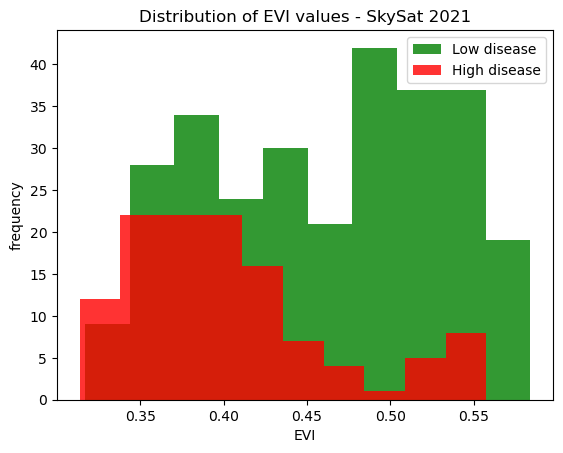

In [21]:
plt.hist(ss_2021_df[ss_2021_df['disease_class']=='low']['evi'], facecolor='g', alpha=0.8, label='Low disease')
plt.hist(ss_2021_df[ss_2021_df['disease_class']=='high']['evi'], facecolor='r', alpha=0.8, label='High disease')
plt.legend(loc='upper right')
plt.xlabel('EVI')
plt.ylabel('frequency')
plt.title('Distribution of EVI values - SkySat 2021')
plt.show()

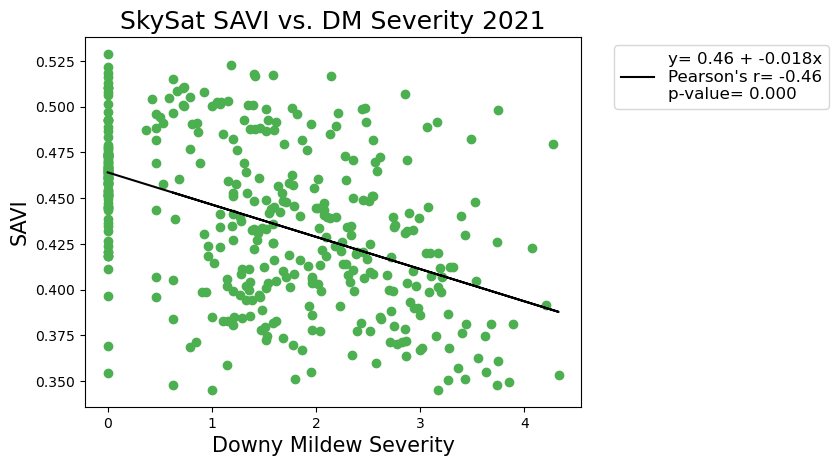

In [24]:
x_var = np.cbrt(ss_2021_df['DM_severity']) # cubic root transform to get more normal distribution
y_var = ss_2021_df['savi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#4CAF50") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('SAVI', fontsize = 15)
ax.set_title('SkySat SAVI vs. DM Severity 2021', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

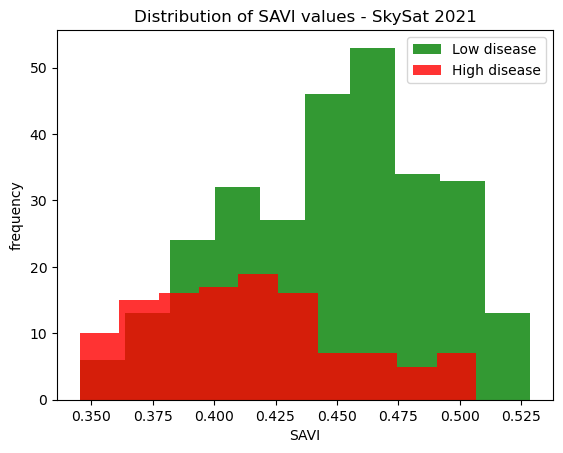

In [22]:
plt.hist(ss_2021_df[ss_2021_df['disease_class']=='low']['savi'], facecolor='g', alpha=0.8, label='Low disease')
plt.hist(ss_2021_df[ss_2021_df['disease_class']=='high']['savi'], facecolor='r', alpha=0.8, label='High disease')
plt.legend(loc='upper right')
plt.xlabel('SAVI')
plt.ylabel('frequency')
plt.title('Distribution of SAVI values - SkySat 2021')
plt.show()

In [43]:
skysat_m[skysat_m['disease_class']=='low'].shape

(667, 15)

In [44]:
skysat_m[skysat_m['disease_class']=='high'].shape

(123, 15)

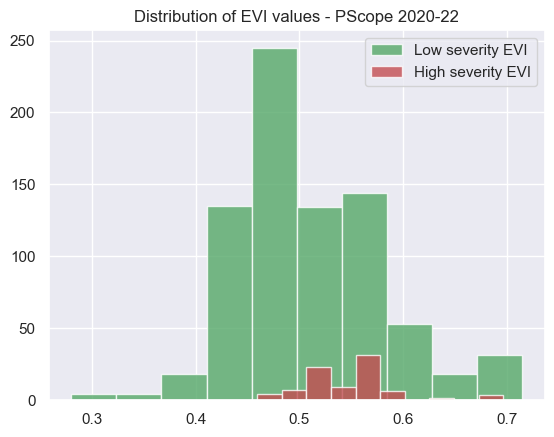

In [42]:
plt.hist(pscope_m[pscope_m['disease_class']=='low']['evi'], facecolor='g', alpha=0.8, label='Low severity EVI')
plt.hist(pscope_m[pscope_m['disease_class']=='high']['evi'], facecolor='r', alpha=0.8, label='High severity EVI')
plt.legend(loc='upper right')
plt.title('Distribution of EVI values - PScope 2020-22')
plt.show()

In [45]:
pscope_m[pscope_m['disease_class']=='low'].shape

(786, 19)

In [46]:
pscope_m[pscope_m['disease_class']=='high'].shape

(84, 19)

In [61]:
# Remove panels where disease = high and evi >0.55

high_sev = skysat_m[skysat_m['disease_class']=='high']

outliers = list(high_sev[high_sev['evi']>=0.55].index)
print(outliers)

to_remove = skysat_m[skysat_m.index.isin(outliers)]
print(to_remove)

removed = skysat_m.drop(outliers, axis=0)
#print(removed)

[129, 149, 282, 307]
     acquired  plot      blue     green       red       nir  row  panel  \
129  20200812   134  0.029925  0.051318  0.032679  0.344911    9      6   
149  20200812   159  0.032600  0.059615  0.035981  0.386400   10     15   
282  20210726    53  0.039204  0.073725  0.053050  0.362289    4      5   
307  20210726    78  0.039261  0.071954  0.051275  0.351564    5     14   

        Date  Treatment  DM_severity      ndvi       evi      savi  \
129   13-Aug        1.0        52.75  0.826909  0.592901  0.533676   
149   13-Aug        1.0        24.20  0.829626  0.645201  0.569859   
282  7/27/21       19.0        23.25  0.744546  0.557565  0.506762   
307  7/27/21       17.0        14.50  0.745432  0.550078  0.498908   

    disease_class  
129          high  
149          high  
282          high  
307          high  


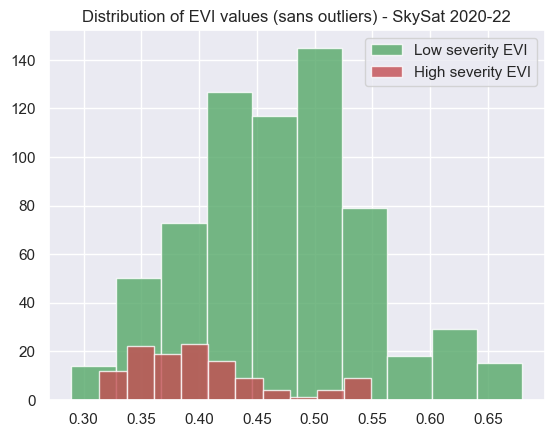

In [60]:
# Plot new histograms

plt.hist(removed[removed['disease_class']=='low']['evi'], facecolor='g', alpha=0.8, label='Low severity EVI')
plt.hist(removed[removed['disease_class']=='high']['evi'], facecolor='r', alpha=0.8, label='High severity EVI')
plt.legend(loc='upper right')
plt.title('Distribution of EVI values (sans outliers) - SkySat 2020-22')
plt.show()

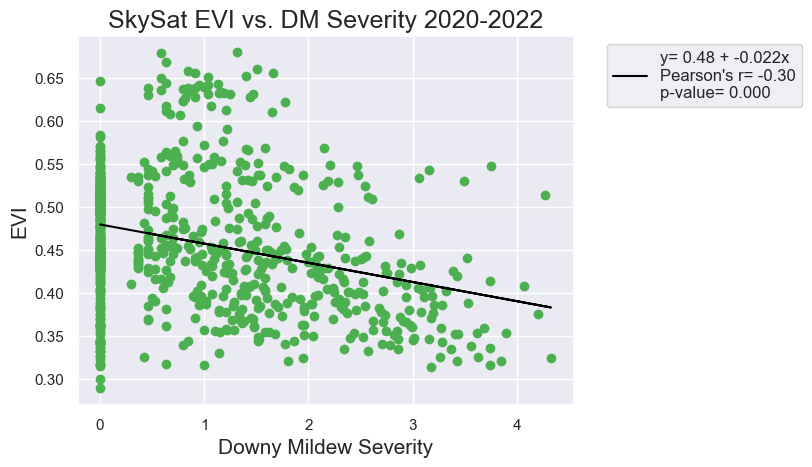

In [69]:
# Does removing outliers improve correlation?

# Remove zero severity points, too
dataset = removed

x_var = np.cbrt(dataset['DM_severity']) # cubic root transform to get more normal distribution
y_var = dataset['evi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#4CAF50") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('EVI', fontsize = 15)
ax.set_title('SkySat EVI vs. DM Severity 2020-2022', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

In [50]:
# Norm add NDVI

norm_m['ndvi']= (norm_m['nir']-norm_m['red'])/(norm_m['nir']+norm_m['red'])
norm_m

acquired  plot          blue         green           red           nir  \
0    20200625    97  5.745421e-08  7.920110e-08  5.831677e-08  3.599679e-07   
1    20200625    98  5.733681e-08  7.721091e-08  5.701210e-08  3.396040e-07   
2    20200625   100  5.552702e-08  7.569253e-08  5.555810e-08  3.542951e-07   
3    20200625   101  5.626276e-08  7.520434e-08  5.661662e-08  3.590909e-07   
4    20200625   102  5.586894e-08  7.796552e-08  5.666935e-08  3.504058e-07   
..        ...   ...           ...           ...           ...           ...   
785  20220720   172  3.450628e-08  6.035154e-08  6.260810e-08  3.573757e-07   
786  20220720   173  3.732209e-08  6.127713e-08  6.734054e-08  3.461117e-07   
787  20220720   174  3.746564e-08  6.290536e-08  6.820961e-08  3.345700e-07   
788  20220720   175  3.639150e-08  6.515699e-08  6.855289e-08  3.735712e-07   
789  20220720   176  3.286641e-08  5.941939e-08  6.195304e-08  3.650150e-07   

     row  panel       Date  Treatment  DM_severity      ndvi  
0      7      1     25-Jun       13.0         0.00  0.721162  
1      7      2     25-Jun        8.0         0.00  0.712507  
2      7      4     25-Jun        1.0         0.00  0.728888  
3      7      5     25-Jun       11.0         0.00  0.727613  
4      7      6     25-Jun       16.0         0.10  0.721578  
..   ...    ...        ...        ...          ...       ...  
785   11     12  7/20/2022       11.0         0.35  0.701855  
786   11     13  7/20/2022       18.0         0.10  0.674252  
787   11     14  7/20/2022       24.0         2.85  0.661306  
788   11     15  7/20/2022       15.0         2.85  0.689893  
789   11     16  7/20/2022        7.0         0.10  0.709800  

[790 rows x 12 columns]

<AxesSubplot: >

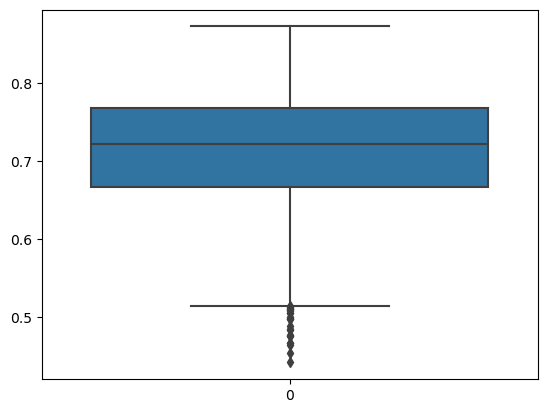

In [51]:
sns.boxplot(norm_m['ndvi'])

In [39]:
pscope_m['disease_class'] = 'low'
pscope_m.loc[pscope_m['DM_severity'] > 10, 'disease_class'] = 'high'
pscope_m

acquired  plot     cblue      blue    greenI   greenII    yellow  \
0    20210624     1  0.036750  0.049133  0.075450  0.080900  0.084417   
1    20210624     2  0.034125  0.045725  0.073900  0.078075  0.080600   
2    20210624     3  0.033280  0.046480  0.073920  0.076700  0.079740   
3    20210624     4  0.031850  0.046250  0.071217  0.076483  0.080050   
4    20210624     5  0.031775  0.046350  0.070900  0.076575  0.079575   
..        ...   ...       ...       ...       ...       ...       ...   
865  20220726   172  0.040586  0.046500  0.067157  0.082171  0.073757   
866  20220726   173  0.040940  0.046100  0.065680  0.081540  0.070940   
867  20220726   174  0.041400  0.045980  0.065140  0.081700  0.071680   
868  20220726   175  0.038383  0.045017  0.065500  0.082733  0.072767   
869  20220726   176  0.036483  0.045167  0.066433  0.083233  0.071550   

          red      rede       nir  row  panel       Date  Treatment  \
0    0.080500  0.134933  0.342583    1      1    6/24/21        5.0   
1    0.077725  0.132775  0.342875    1      2    6/24/21        7.0   
2    0.076560  0.131720  0.339020    1      3    6/24/21        9.0   
3    0.075500  0.129033  0.336700    1      4    6/24/21       15.0   
4    0.074025  0.130325  0.331800    1      5    6/24/21        3.0   
..        ...       ...       ...  ...    ...        ...        ...   
865  0.071257  0.139357  0.392200   11     12  7/27/2022       11.0   
866  0.072100  0.134740  0.390900   11     13  7/27/2022       18.0   
867  0.072060  0.133580  0.395700   11     14  7/27/2022       24.0   
868  0.070767  0.136450  0.397650   11     15  7/27/2022       15.0   
869  0.069267  0.135283  0.412767   11     16  7/27/2022        7.0   

     DM_severity disease_class  
0           0.00           low  
1           0.00           low  
2           0.00           low  
3           0.00           low  
4           0.00           low  
..           ...           ...  
865         0.10           low  
866         0.00           low  
867         0.25           low  
868         0.10           low  
869         0.10           low  

[870 rows x 16 columns]

In [29]:
pscope_m[pscope_m['disease_class']=='low'].shape

(786, 16)

In [30]:
pscope_m[pscope_m['disease_class']=='high'].shape

(84, 16)

<AxesSubplot: >

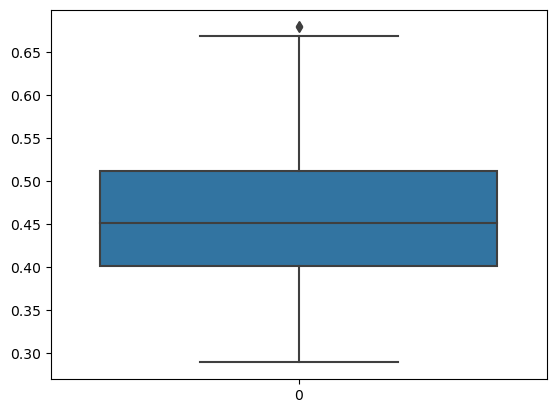

In [39]:
sns.boxplot(skysat_m['evi'])

In [47]:
# check outliers
outlier_indices = np.where(skysat_m['evi']>0.65)[0]
print(outlier_indices)

[109 118 121 122 123 134 135 147 148]


In [48]:
skysat_m[skysat_m.index.isin(outlier_indices)]

acquired  plot      blue     green       red       nir  row  panel  \
109  20200812   109  0.027790  0.050753  0.029610  0.384713    7     13   
118  20200812   120  0.028500  0.051197  0.028761  0.381494    8      8   
121  20200812   123  0.026974  0.049307  0.026948  0.374215    8     11   
122  20200812   124  0.028683  0.050100  0.026493  0.388710    8     12   
123  20200812   126  0.027606  0.051016  0.028458  0.390742    8     14   
134  20200812   140  0.029210  0.050687  0.029293  0.377267    9     12   
135  20200812   141  0.034079  0.061597  0.038952  0.400166    9     13   
147  20200812   157  0.027953  0.052020  0.029530  0.401523   10     13   
148  20200812   158  0.033326  0.062045  0.038206  0.403048   10     14   

       Date  Treatment  DM_severity      ndvi       evi      savi  
109  13-Aug       15.0         4.55  0.857068  0.655681  0.582567  
118  13-Aug        2.0         0.60  0.859788  0.657930  0.581264  
121  13-Aug       11.0         1.10  0.865650  0.650996  0.578031  
122  13-Aug        9.0         2.25  0.872385  0.679557  0.593667  
123  13-Aug        5.0         0.25  0.864227  0.668696  0.591194  
134  13-Aug       11.0         2.75  0.855897  0.652148  0.575759  
135  13-Aug        3.0         0.75  0.822591  0.655189  0.576947  
147  13-Aug        4.0         0.20  0.862987  0.679289  0.599310  
148  13-Aug       16.0         3.45  0.826828  0.659825  0.581418

In [57]:
# Check outliers using z scores
z_evi = np.abs(scipy.stats.zscore(skysat_m['evi']))
#print(z_evi)
 
# Position of the outlier
index_to_drop = np.where(z_evi > 2)[0]
print(index_to_drop)

[102 104 105 106 107 108 109 110 111 112 114 115 116 117 118 119 120 121
 122 123 124 125 128 130 131 134 135 136 138 139 140 141 142 143 144 145
 146 147 148 149 626 627]


In [58]:
skysat_m[skysat_m.index.isin(index_to_drop)]

acquired  plot      blue     green       red       nir  row  panel  \
102  20200812   101  0.028514  0.049221  0.029471  0.359186    7      5   
104  20200812   103  0.028446  0.049650  0.028896  0.366938    7      7   
105  20200812   104  0.027045  0.049293  0.028979  0.370538    7      8   
106  20200812   105  0.027958  0.048487  0.028852  0.368629    7      9   
107  20200812   106  0.024793  0.047977  0.026397  0.354027    7     10   
108  20200812   108  0.027379  0.047871  0.027686  0.361700    7     12   
109  20200812   109  0.027790  0.050753  0.029610  0.384713    7     13   
110  20200812   110  0.027934  0.049552  0.027679  0.366086    7     14   
111  20200812   112  0.029767  0.057821  0.035100  0.374379    7     16   
112  20200812   113  0.028253  0.052375  0.031191  0.376525    8      1   
114  20200812   116  0.029983  0.053072  0.032266  0.371221    8      4   
115  20200812   117  0.029540  0.050400  0.030010  0.371700    8      5   
116  20200812   118  0.027993  0.049297  0.029613  0.354960    8      6   
117  20200812   119  0.027273  0.049527  0.028300  0.375040    8      7   
118  20200812   120  0.028500  0.051197  0.028761  0.381494    8      8   
119  20200812   121  0.028526  0.050732  0.029148  0.370842    8      9   
120  20200812   122  0.027093  0.048800  0.028332  0.363829    8     10   
121  20200812   123  0.026974  0.049307  0.026948  0.374215    8     11   
122  20200812   124  0.028683  0.050100  0.026493  0.388710    8     12   
123  20200812   126  0.027606  0.051016  0.028458  0.390742    8     14   
124  20200812   127  0.025964  0.048254  0.026896  0.375739    8     15   
125  20200812   129  0.028631  0.050975  0.031391  0.367953    9      1   
128  20200812   133  0.028617  0.050259  0.029862  0.363045    9      5   
130  20200812   135  0.029350  0.048279  0.028782  0.360011    9      7   
131  20200812   136  0.028530  0.049527  0.029513  0.366110    9      8   
134  20200812   140  0.029210  0.050687  0.029293  0.377267    9     12   
135  20200812   141  0.034079  0.061597  0.038952  0.400166    9     13   
136  20200812   143  0.030250  0.055036  0.033261  0.378204    9     15   
138  20200812   145  0.030476  0.051867  0.032315  0.363064   10      1   
139  20200812   146  0.029076  0.051041  0.031538  0.368041   10      2   
140  20200812   147  0.032274  0.054074  0.034539  0.362287   10      3   
141  20200812   149  0.028213  0.051155  0.029371  0.366094   10      5   
142  20200812   150  0.028996  0.050533  0.029907  0.365004   10      6   
143  20200812   151  0.027400  0.050525  0.028843  0.373493   10      7   
144  20200812   152  0.027670  0.049170  0.029577  0.373227   10      8   
145  20200812   154  0.032963  0.056057  0.036977  0.380673   10     10   
146  20200812   155  0.030500  0.055400  0.033030  0.381304   10     11   
147  20200812   157  0.027953  0.052020  0.029530  0.401523   10     13   
148  20200812   158  0.033326  0.062045  0.038206  0.403048   10     14   
149  20200812   159  0.032600  0.059615  0.035981  0.386400   10     15   
626  20220622   173  0.064719  0.090337  0.098633  0.263100   11     13   
627  20220622   174  0.064439  0.091071  0.100725  0.260586   11     14   

        Date  Treatment  DM_severity      ndvi       evi      savi  
102   13-Aug       11.0         0.50  0.848342  0.623440  0.556538  
104   13-Aug        6.0         0.50  0.853999  0.636869  0.566024  
105   13-Aug        4.0         0.20  0.854928  0.636487  0.569570  
106   13-Aug        2.0         0.60  0.854828  0.637695  0.567885  
107   13-Aug       10.0         1.20  0.861225  0.617491  0.558192  
108   13-Aug        3.0         1.10  0.857798  0.631419  0.563334  
109   13-Aug       15.0         4.55  0.857068  0.655681  0.582567  
110   13-Aug       12.0         1.00  0.859412  0.639636  0.567946  
111   13-Aug        5.0         0.50  0.828563  0.622882  0.559571  
112   13-Aug       16.0         0.75  0.846998  0.638671  0.570665  
114   13-Aug       1

(array([102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149]),)


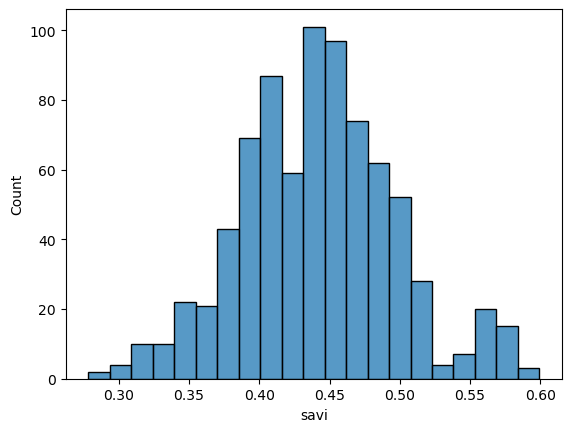

In [21]:
sns.histplot(master_df['savi'])
print(np.where(master_df['savi']>0.53))

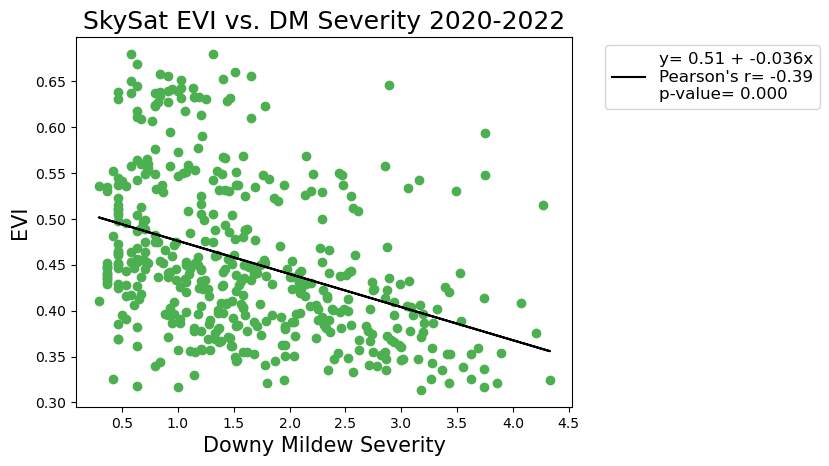

In [59]:
# Try plotting without zero severity points.

dataset = skysat_m[skysat_m['DM_severity']>0]

x_var = np.cbrt(dataset['DM_severity']) # cubic root transform to get more normal distribution
y_var = dataset['evi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#4CAF50") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('EVI', fontsize = 15)
ax.set_title('SkySat EVI vs. DM Severity 2020-2022', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

In [70]:
dataset = skysat_m[skysat_m['DM_severity']>0]
x_var = np.cbrt(dataset['DM_severity'])
x_var
dates = dataset['Date'].unique()
daily_data = []
for d in dates:
        daily = dataset[dataset['Date']==d]
        daily_data.append(daily)
#daily_data
for df in daily_data:
        x_var = np.cbrt(df['DM_severity']) # cubic root transform to get more normal distribution
        y_var = df['evi']
        print(x_var)
        #sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
        #line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"

4     0.464159
8     0.464159
35    0.464159
Name: DM_severity, dtype: float64
50    0.464159
51    0.531329
52    0.584804
55    0.368403
56    0.736806
61    0.368403
63    0.464159
66    0.368403
69    0.669433
73    0.584804
74    0.368403
79    1.310371
82    1.613429
83    1.593988
84    0.368403
85    0.368403
87    0.704730
92    0.464159
93    0.368403
94    2.147229
96    0.464159
98    0.629961
99    0.629961
Name: DM_severity, dtype: float64
100    0.793701
101    1.000000
102    0.793701
103    0.669433
104    0.793701
105    0.584804
106    0.843433
107    1.062659
108    1.032280
109    1.657056
110    1.000000
111    0.793701
112    0.908560
113    0.629961
114    1.193483
115    1.032280
118    0.843433
119    0.947268
120    0.464159
121    1.032280
122    1.310371
123    0.629961
124    0.584804
125    0.819321
126    1.216440
127    0.766309
128    0.908560
129    3.750370
130    1.249333
131    1.157295
132    0.928318
133    1.205071
134    1.401020
135    0.90856

In [60]:
def get_vi_corr(data,x,y):
    
    dates = data["Date"].unique()
    
    daily_data = []
    
    for d in dates:
        daily = data[data['Date']==d]
        daily_data.append(daily)
        
    for df in daily_data:
        x_var = np.cbrt(df[x]) # cubic root transform to get more normal distribution
        y_var = df[y] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
        sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
        line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
        
        fig, ax = plt.subplots()
        ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#4CAF50", label=str(x)) #change to reflect
        ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
        ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
        ax.set_ylabel(f"{y}", fontsize = 15)
        ax.set_title(f"{y} vs. DM Severity {str(df['scout_day'].unique())[1:-1]}", fontsize = 18)
        ax.legend(facecolor='white')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
        plt.show()

In [61]:
get_vi_corr(dataset, 'DM_severity', 'evi')

ValueError: Cannot calculate a linear regression if all x values are identical

In [24]:
from sklearn.linear_model import LinearRegression

In [29]:
x = np.asarray(np.cbrt(master_df['DM_severity'])).reshape(-1,1)
y = master_df['evi']

model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.07964139459468222


In [38]:
low_sev = master_df[master_df['disease_class']=='low']
high_sev = master_df[master_df['disease_class']=='high']

In [39]:
from scipy.stats import ranksums
res = ranksums(np.asarray(low_sev['evi']), np.asarray(high_sev['evi']))
res.statistic, res.pvalue

(8.475015092714012, 2.3504906196310778e-17)

<AxesSubplot: xlabel='evi', ylabel='disease_class'>

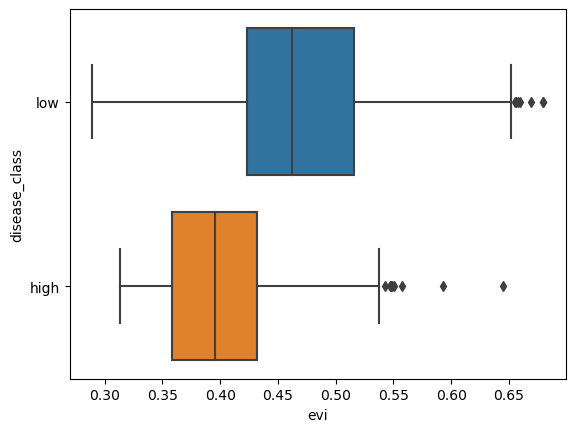

In [41]:
sns.boxplot(data=master_df, x="evi", y="disease_class")

<AxesSubplot: xlabel='savi', ylabel='disease_class'>

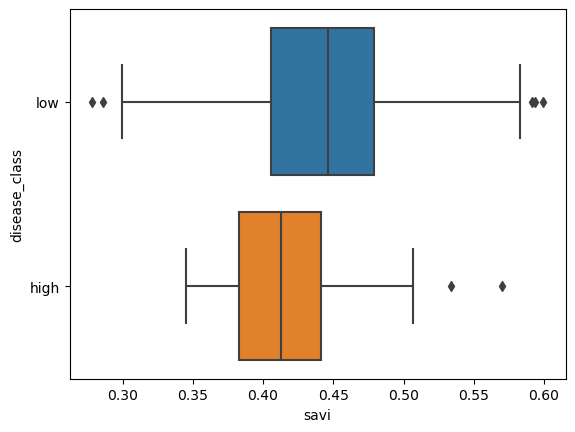

In [43]:
sns.boxplot(data=master_df, x="savi", y="disease_class")

In [60]:
z = np.abs(scipy.stats.zscore(master_df['evi']))
print(z)
 
# Position of the outlier
index_to_drop = np.where(z > 2)
print(index_to_drop)

0      0.819733
1      0.512892
2      0.790468
3      0.848411
4      0.676159
         ...   
785    0.386257
786    0.056778
787    0.183407
788    0.446836
789    0.496619
Name: evi, Length: 788, dtype: float64
(array([102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 127, 129, 130, 132, 133,
       134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       624, 625]),)


In [58]:
master_df.index[102]

102

In [65]:
index_to_drop[0]

array([102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 127, 129, 130, 132, 133,
       134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       624, 625])

In [66]:
update_df = master_df.drop([master_df.index[i] for i in index_to_drop[0]])

In [67]:
update_df.shape

(747, 15)

In [68]:
master_df.shape

(788, 15)

<AxesSubplot: xlabel='evi', ylabel='disease_class'>

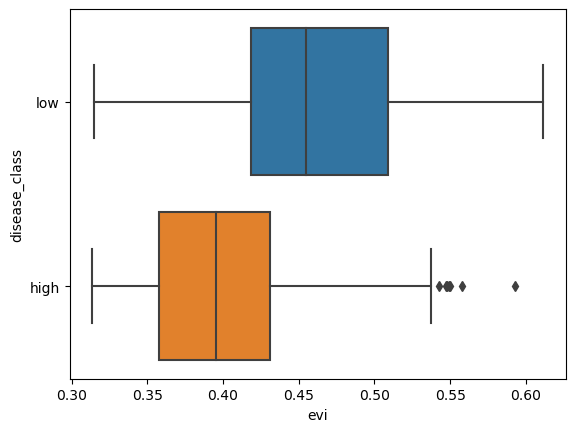

In [69]:
sns.boxplot(data=update_df, x="evi", y="disease_class")

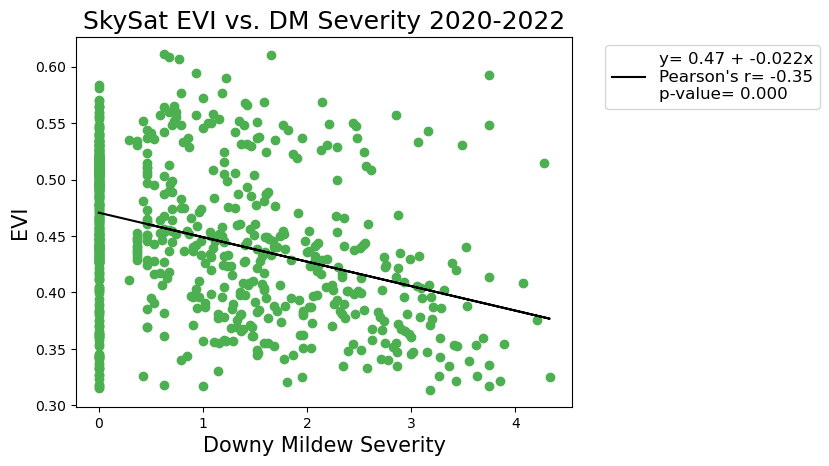

In [70]:
x_var = np.cbrt(update_df['DM_severity']) # cubic root transform to get more normal distribution
y_var = update_df['evi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#4CAF50") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('EVI', fontsize = 15)
ax.set_title('SkySat EVI vs. DM Severity 2020-2022', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

In [71]:
low_sev_out = update_df[update_df['disease_class']=='low']
high_sev_out = update_df[update_df['disease_class']=='high']

res_outlier = ranksums(np.asarray(low_sev_out['evi']), np.asarray(high_sev_out['evi']))
res_outlier.statistic, res_outlier.pvalue

(8.124787718531598, 4.481460516319989e-16)

In [34]:
from scipy.stats import spearmanr

corr, p = spearmanr(master_df['DM_severity'], master_df['evi'])

print("Spearman's correlation: %.3f" % corr)
print('p-value: %.3f' %p)

Spearman's correlation: -0.282
p-value: 0.000


In [22]:
rfl_df = master_df.iloc[:,2:6]
rfl_df

blue     green       red       nir
0    0.049290  0.067947  0.050030  0.308817
1    0.049189  0.066239  0.048911  0.291346
2    0.047637  0.064937  0.047663  0.303950
3    0.048268  0.064518  0.048571  0.308064
4    0.047930  0.066887  0.048617  0.300613
..        ...       ...       ...       ...
785  0.033387  0.058393  0.060577  0.345780
786  0.036111  0.059289  0.065156  0.334881
787  0.036250  0.060864  0.065996  0.323714
788  0.035211  0.063043  0.066329  0.361450
789  0.031800  0.057491  0.059943  0.353171

[790 rows x 4 columns]

In [29]:
pca = PCA(n_components = 0.99) # generate PCs until 0.99 of variance is explained
scaler = MinMaxScaler() # Normalize data

_rfl = master_df.iloc[:,2:6] # temporary DF to hold reflectance columns only

# Fitting data
_rfl_rescaled = scaler.fit_transform(_rfl)
disease_pca = pca.fit_transform(_rfl_rescaled)
disease_pca_df = pd.DataFrame(disease_pca)
disease_pca_df['disease_class'] = master_df['disease_class']

In [30]:
### Variance explained by each PC
pca.explained_variance_ratio_

array([0.78872125, 0.12657308, 0.05994127, 0.02476439])

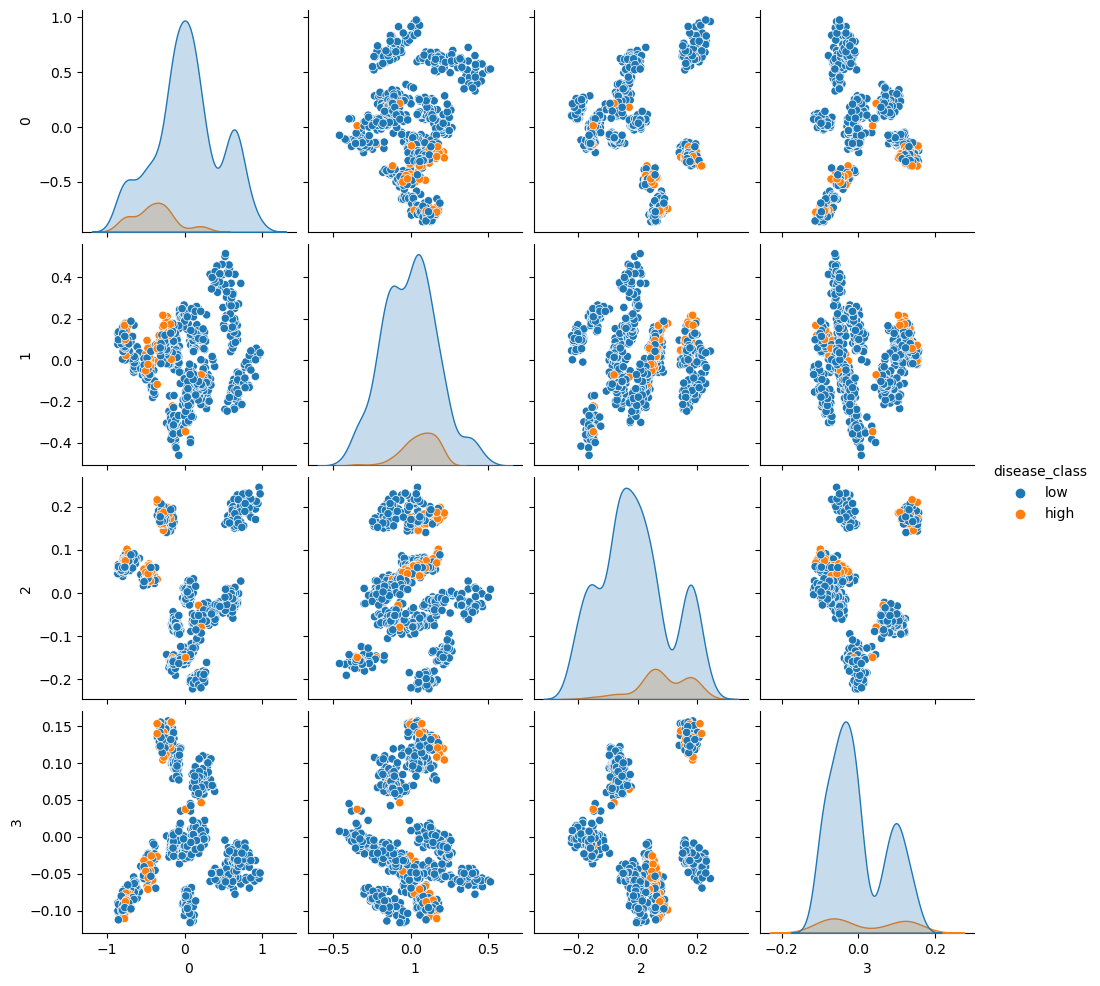

In [31]:
### Pairplot of each principal component against one another
sns.pairplot(disease_pca_df, hue='disease_class')

In [3]:
#Scout + image data
pscope_2020 = pd.read_csv(home+'stats_work/PS_2020/PScope_2020_1m_scout.csv')
pscope_2021 = pd.read_csv(home+'stats_work/PS_2021/PScope_2021_1m_scout.csv')
pscope_2022 = pd.read_csv(home+'stats_work/PS_2022/PS_2022.csv')

skysat_2020 = pd.read_csv(home+'stats_work/SkySat_2020/skysat_scout_1m_2020.csv')
skysat_2021 = pd.read_csv(home+'stats_work/SkySat_2021/skysat_scout_1m_2021.csv')
skysat_2022 = pd.read_csv(home+'stats_work/SkySat_2022/skysat_scout_1m_2022.csv')


In [7]:
# scout data only
scout_2020 = pd.read_csv(home+'data_work/SkySat_2020/auc_scout_combined_2020.csv')
scout_2021 = pd.read_csv(home+'data_work/SkySat_2021/auc_scout_combined_2021.csv')
scout_2022 = pd.read_csv(home+'data_work/SkySat_2022/scout_2022_all.csv')

In [9]:
scout_2020.columns


Index(['Date', 'Block', 'Treatment', 'Row', 'Panel', 'DM_incd', 'DM_severity',
       'scout_day', 'auc', 'sev_level'],
      dtype='object')

In [109]:
plot_2020 = scout_2020[scout_2020['Treatment'].isin([1,5])]
plot_evi_2020 = skysat_2020[skysat_2020['Treatment'].isin([1,5])]

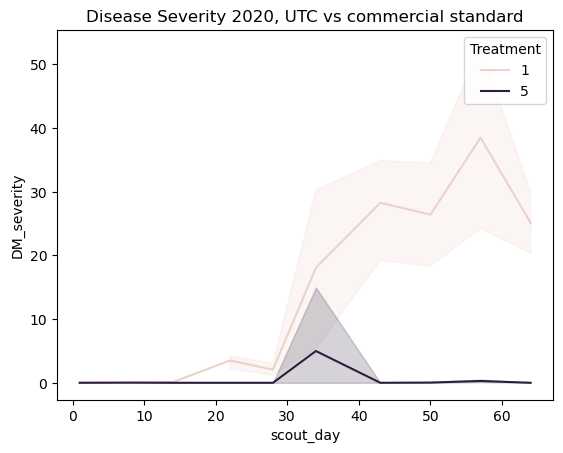

In [104]:
g = sns.lineplot(data=plot_2020, x='scout_day', y='DM_severity', hue='Treatment')
plt.title('Disease Severity 2020, UTC vs commercial standard')
plt.show(g)

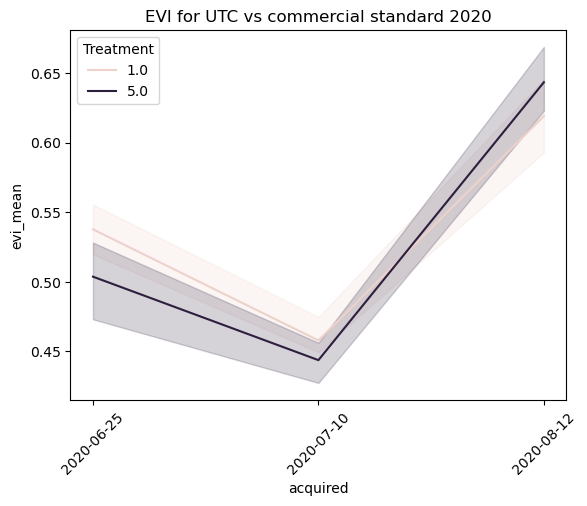

In [111]:
sns.lineplot(data=plot_evi_2020, x='acquired', y ='evi_mean', hue='Treatment')
#plt.legend(labels=['commercial standard', 'untreated control'])
plt.xticks([0, 1, 2], ['2020-06-25','2020-07-10','2020-08-12'], rotation=45)
plt.title('EVI for UTC vs commercial standard 2020')
plt.show()

In [42]:
scout_2021.columns

Index(['Date', 'Treatment', 'Disease', 'Row ', 'Panel ', 'leaf_1', 'leaf_2',
       'leaf_3', 'leaf_4', 'leaf_5', 'leaf_6', 'leaf_7', 'leaf_8', 'leaf_9',
       'leaf_10', 'leaf_11', 'leaf_12', 'leaf_13', 'leaf_14', 'leaf_15',
       'leaf_16', 'leaf_17', 'leaf_18', 'leaf_19', 'leaf_20', 'mean_severity',
       'mean_severity_stddev', 'mean_severity_var', 'scout_day', 'auc',
       'sev_level'],
      dtype='object')

In [55]:
scout_2021.Date.unique()

array(['2021-06-24', '2021-07-01', '2021-07-07', '2021-07-15',
       '2021-07-27', '2021-08-03', '2021-08-10', '2021-08-17'],
      dtype=object)

In [59]:
last_day = scout_2021[scout_2021['Date']=='2021-08-17']
last_day[last_day['mean_severity']<1]

#last_day

Date  Treatment Disease  Row   Panel   leaf_1  leaf_2  leaf_3  \
1120  2021-08-17        5.0  DM Top   1.0       1     5.0     1.0     7.0   
1121  2021-08-17        5.0  DM Bot   1.0       1     5.0     1.0     7.0   
1208  2021-08-17       11.0  DM Top   3.0      13     3.0    10.0     0.0   
1214  2021-08-17        7.0  DM Top   3.0      16    10.0     1.0     5.0   
1215  2021-08-17        7.0  DM Top   3.0      16    10.0     1.0     5.0   
1254  2021-08-17       11.0  DM Bot   5.0       4     1.0     1.0     0.0   
1255  2021-08-17       11.0  DM Top   5.0       4     1.0     1.0     0.0   
1278  2021-08-17       19.0  DM Top   5.0      16     4.0     1.0     0.0   
1279  2021-08-17       19.0  DM Bot   5.0      16     4.0     1.0     0.0   

      leaf_4  leaf_5  ...  leaf_17  leaf_18  leaf_19  leaf_20  mean_severity  \
1120     5.0     0.0  ...      0.0      0.0      0.0      0.0       0.947368   
1121     5.0     0.0  ...      0.0      0.0      0.0      0.0       0.947368   
1208     0.0     0.0  ...      0.0      0.0      0.0      0.0       0.684211   
1214     0.0     0.0  ...      0.0      0.0      0.0      0.0       0.842105   
1215     0.0     0.0  ...      0.0      0.0      0.0      0.0       0.842105   
1254     0.0     0.0  ...      0.0      0.0      0.0      0.0       0.105263   
1255     0.0     0.0  ...      0.0      0.0      0.0      0.0       0.105263   
1278     0.0     0.0  ...      0.0      0.0      0.0      0.0       0.263158   
1279     0.0     0.0  ...      0.0      0.0      0.0      0.0       0.263158   

      mean_severity_stddev  mean_severity_var  scout_day         auc  \
1120              2.146669           4.608187         55  174.217105   
1121              2.146669           4.608187         55  174.217105   
1208              2.358263           5.561404         55   56.539474   
1214              2.500292           6.251462         55   73.664474   
1215              2.500292           6.251462         55   73.664474   
1254              0.315302           0.099415         55   56.539474   
1255              0.315302           0.099415         55   56.539474   
1278              0.933459           0.871345         55  330.421053   
1279              0.933459           0.871345         55  330.421053   

      sev_level  
1120        low  
1121        low  
1208        low  
1214        low  
1215        low  
1254        low  
1255        low  
1278        low  
1279        low  

[9 rows x 31 columns]

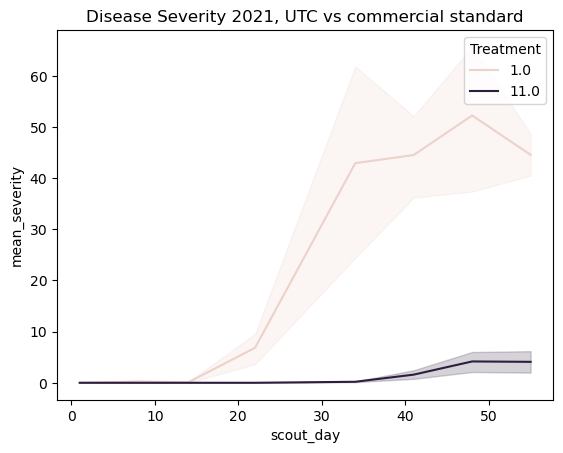

In [106]:
sev_2021 =scout_2021[scout_2021['Treatment'].isin([1,11])]
g = sns.lineplot(data=sev_2021, x='scout_day', y='mean_severity', hue='Treatment')
plt.title('Disease Severity 2021, UTC vs commercial standard')
plt.show(g)

In [61]:
scout_2022.columns

Index(['Date', 'Row', 'Panel', 'Treatment', 'mean_sev_top_bot'], dtype='object')

In [62]:
scout_2022['Date'].unique()

array(['08/09/2022', '08/29/2022', '6/29/22', '7/20/2022', '7/14/22',
       '7/27/2022', '7/6/22', '6/22/22'], dtype=object)

In [69]:
last_2022 = scout_2022[scout_2022['Date']=='08/29/2022']
last_2022[last_2022['mean_sev_top_bot']<2].sort_values(by='Date')

Date  Row  Panel  Treatment  mean_sev_top_bot
106  08/29/2022    8     11         19              1.70
132  08/29/2022   10      5         19              1.35
151  08/29/2022   11      8         24              1.80

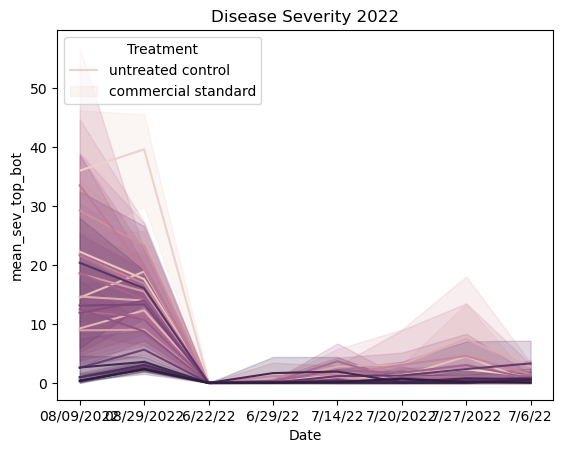

In [72]:
g = sns.lineplot(data=scout_2022.sort_values(by='Date'), x='Date', y='mean_sev_top_bot', hue='Treatment', legend=False)
plt.legend(title='Treatment', loc='upper left',labels=['untreated control', 'commercial standard'])
plt.title('Disease Severity 2022')
plt.show(g)

<AxesSubplot: xlabel='acquired', ylabel='evi_mean'>

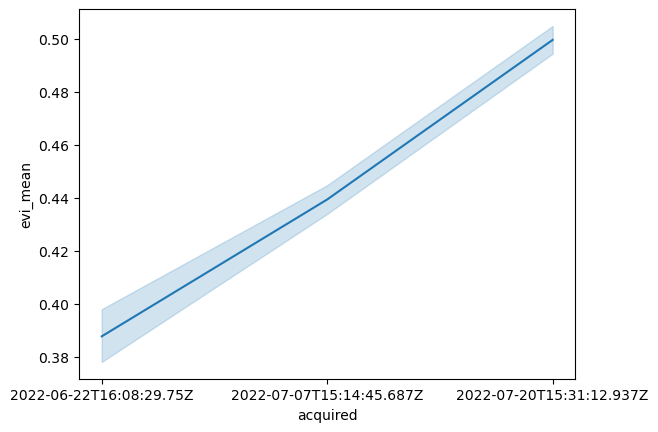

In [40]:
sns.lineplot(data=skysat_2022, x='acquired', y ='evi_mean')
#plt.xticks([0, 1, 2, 3, 4], ['2021-07-07', '2021-07-26','2021-08-02', '2021-08-09','2021-08-16'], rotation=45)#[0, 1, 2, 3, 4, 5, 6], ['2022-06-13','2022-06-24','2022-06-30','2022-07-04', 

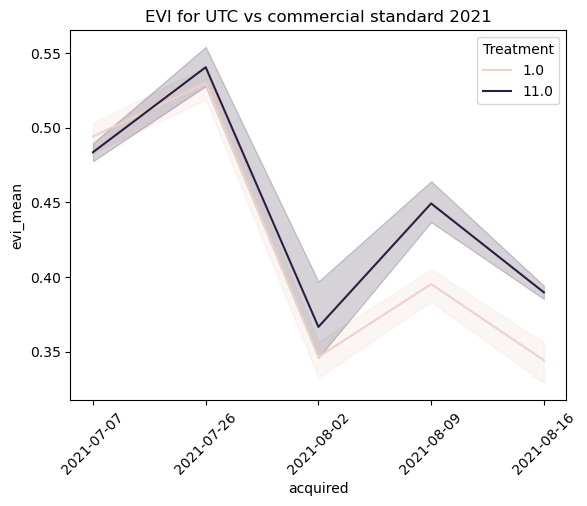

In [102]:
trts_2021 = [1,11]
plot_2021 = skysat_2021[skysat_2021['Treatment'].isin(trts_2021)]

sns.lineplot(data=plot_2021, x='acquired', y ='evi_mean', hue='Treatment')
#plt.legend(labels=['commercial standard', 'untreated control'])
plt.xticks([0,1,2,3,4], ['2021-07-07','2021-07-26','2021-08-02', '2021-08-09','2021-08-16'], rotation=45)
plt.title('EVI for UTC vs commercial standard 2021')

plt.show()

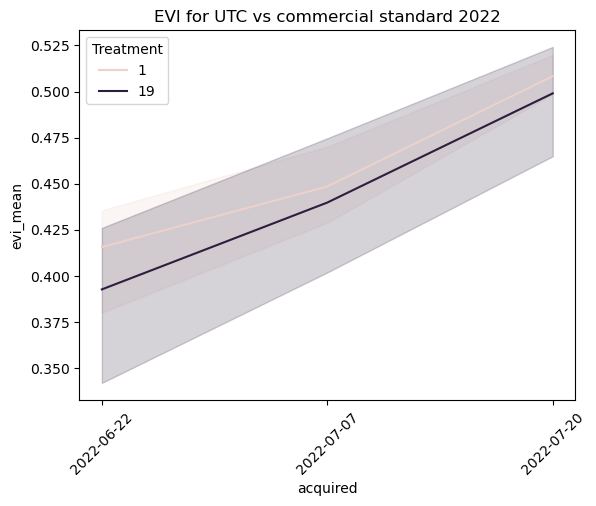

In [101]:
trts_2022 = [1,19]
plot_2022 = skysat_2022[skysat_2022['Treatment'].isin(trts_2022)]

sns.lineplot(data=plot_2022, x='acquired', y ='evi_mean', hue='Treatment')
#plt.legend(labels=['commercial standard', 'untreated control'])
plt.xticks([0, 1, 2], ['2022-06-22','2022-07-07','2022-07-20'], rotation=45)
plt.title('EVI for UTC vs commercial standard 2022')
plt.show()

In [ ]:
trt_19 = skysat_2022[skysat_2022['Treatment']==19]
trt_utc = skysat_2022[skysat_2022['Treatment']==1]

sns.lineplot(data=trt_19, x='acquired', y ='evi_mean')
sns.lineplot(data=trt_utc, x='acquired', y ='evi_mean')
plt.legend(labels=['commercial standard', 'untreated control'])

([<matplotlib.axis.XTick at 0x15574dd80>,
 [Text(0, 0, '2022-06-13'),
  Text(1, 0, '2022-06-24'),
  Text(2, 0, '2022-06-30'),
  Text(3, 0, '2022-07-04'),
  Text(4, 0, '2022-07-09'),
  Text(5, 0, '2022-07-26'),
  Text(6, 0, '2022-07-31')])

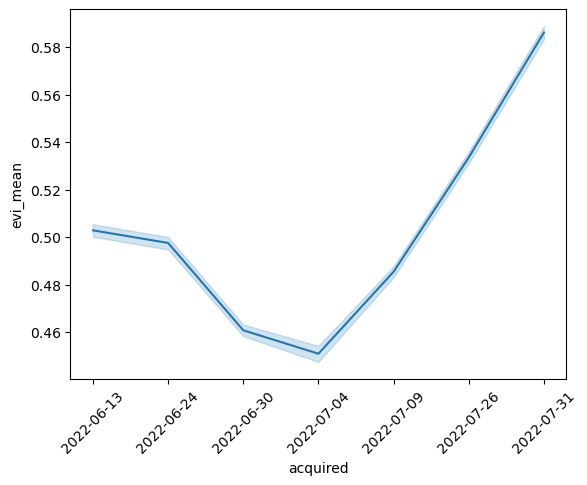

In [32]:
sns.lineplot(data=pscope_2022, x='acquired', y ='evi_mean')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['2022-06-13','2022-06-24','2022-06-30','2022-07-04', 
                                   '2022-07-09','2022-07-26','2022-07-31'], rotation=45)

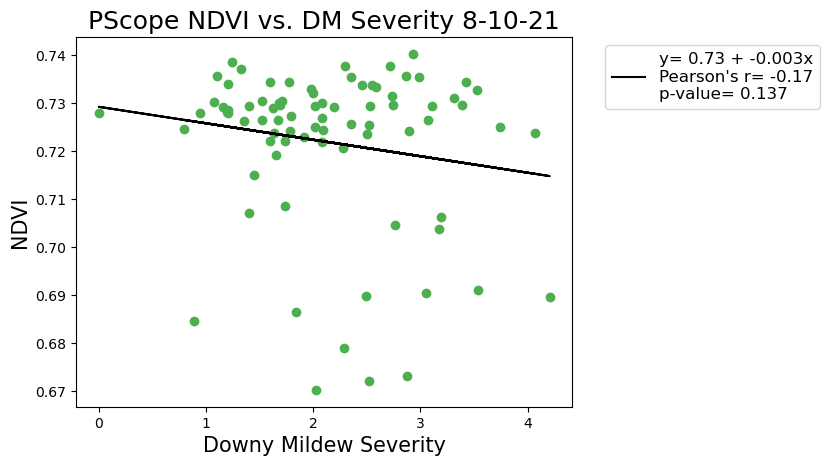

In [17]:
aug_10 = pscope_2021[pscope_2021['Date']=='2021-08-10']

x_var = np.cbrt(aug_10['mean_sev_top_bot']) # cubic root transform to get more normal distribution
y_var = aug_10['ndvi_mean'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#4CAF50") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('NDVI', fontsize = 15)
ax.set_title('PScope NDVI vs. DM Severity 8-10-21', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

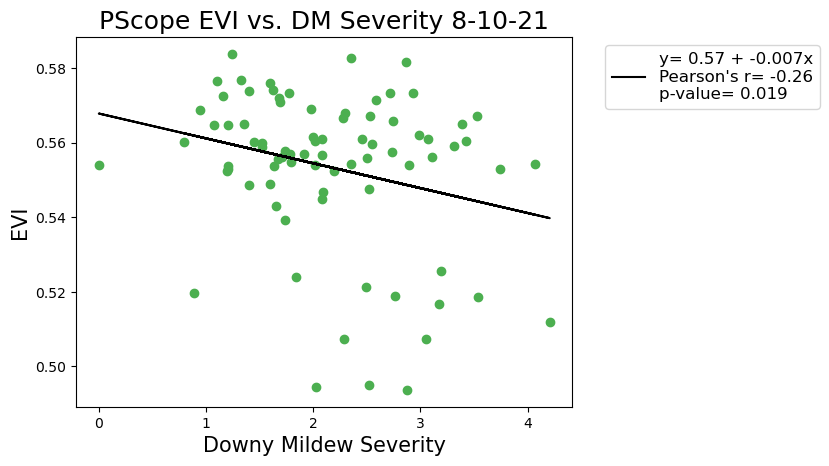

In [16]:
x_var = np.cbrt(aug_10['mean_sev_top_bot']) # cubic root transform to get more normal distribution
y_var = aug_10['evi_mean'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#4CAF50") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('EVI', fontsize = 15)
ax.set_title('PScope EVI vs. DM Severity 8-10-21', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

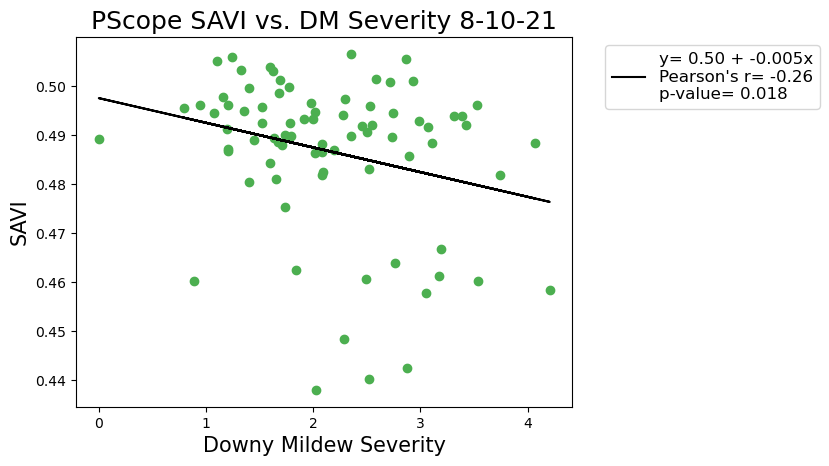

In [18]:
x_var = np.cbrt(aug_10['mean_sev_top_bot']) # cubic root transform to get more normal distribution
y_var = aug_10['savi_mean'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
fig, ax = plt.subplots()
ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#4CAF50") 
ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('SAVI', fontsize = 15)
ax.set_title('PScope SAVI vs. DM Severity 8-10-21', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

In [7]:
pscope_2021.mean_sev_top_bot

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
395     5.00
396     9.00
397    29.00
398    20.75
399     2.50
Name: mean_sev_top_bot, Length: 400, dtype: float64

In [3]:

data = pd.read_csv(home+'stats_work/SkySat_2021/skysat_scout_1m_2021.csv')
data.head()

blue_mean  green_mean  red_mean  nir_mean  ndvi_mean  evi_mean  savi_mean  \
0   0.032006    0.066432  0.040084  0.290003   0.757132  0.484168   0.451614   
1   0.033528    0.067879  0.043324  0.270290   0.723710  0.443716   0.418440   
2   0.033903    0.067897  0.042947  0.273817   0.728841  0.451899   0.423997   
3   0.032868    0.067358  0.042055  0.280455   0.739203  0.463353   0.434767   
4   0.032104    0.066636  0.038836  0.292664   0.765697  0.493868   0.457899   

                  acquired  row  panel scout_day  Treatment Disease  \
0  2021-07-07T15:01:22.25Z    1      1    7/7/21        5.0  DM_avg   
1  2021-07-07T15:01:22.25Z    1      2    7/7/21        7.0  DM_avg   
2  2021-07-07T15:01:22.25Z    1      3    7/7/21        9.0  DM_avg   
3  2021-07-07T15:01:22.25Z    1      4    7/7/21       15.0  DM_avg   
4  2021-07-07T15:01:22.25Z    1      5    7/7/21        3.0  DM_avg   

   mean_sev_top_bot  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

<AxesSubplot: xlabel='mean_sev_top_bot', ylabel='Count'>

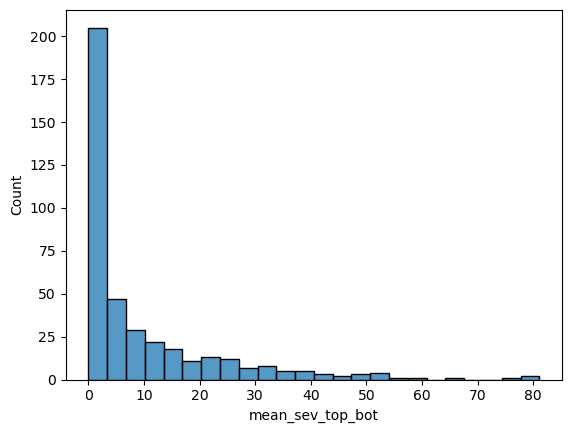

In [28]:
# Regression diagnostics

sns.histplot(data=data, x='mean_sev_top_bot')

<AxesSubplot: xlabel='mean_sev_top_bot', ylabel='Count'>

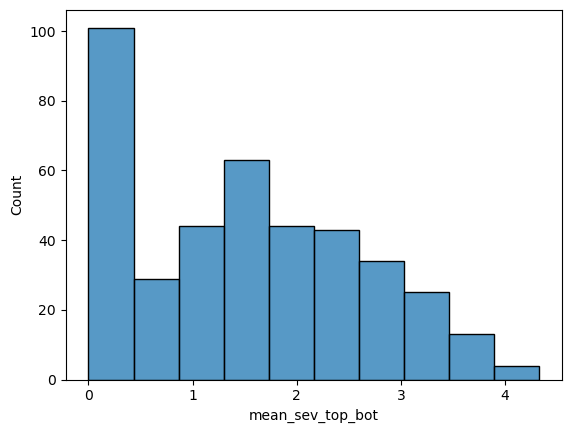

In [29]:
sns.histplot(np.cbrt(data.mean_sev_top_bot))

<AxesSubplot: xlabel='ndvi_mean', ylabel='Count'>

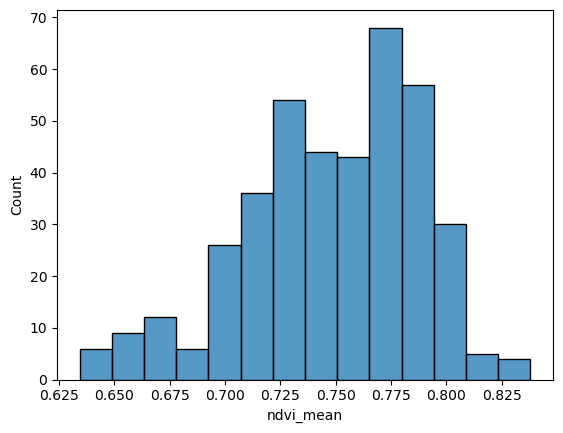

In [16]:
sns.histplot(data.ndvi_mean)

<AxesSubplot: xlabel='evi_mean', ylabel='Count'>

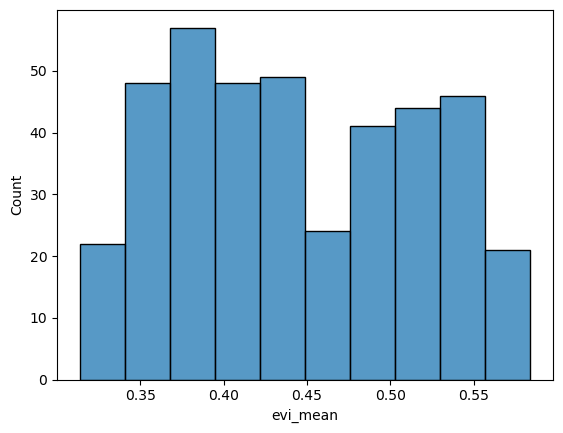

In [17]:
sns.histplot(data.evi_mean)

<AxesSubplot: xlabel='savi_mean', ylabel='Count'>

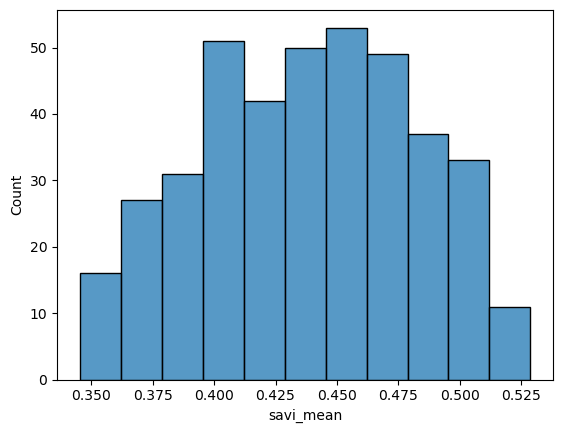

In [18]:
sns.histplot(data.savi_mean)

In [3]:
#Assign panels to high/low sev.

def assign_sev(row):
    if row['mean_sev_top_bot']>=10:
        return 'high'
    if row['mean_sev_top_bot']<10:
        return 'low'

In [6]:
data['sev_level'] = data.apply(lambda row: assign_sev(row), axis=1)
#data

In [47]:
high_sev = data[data['sev_level']=='high']
low_sev =  data[data['sev_level']=='low']

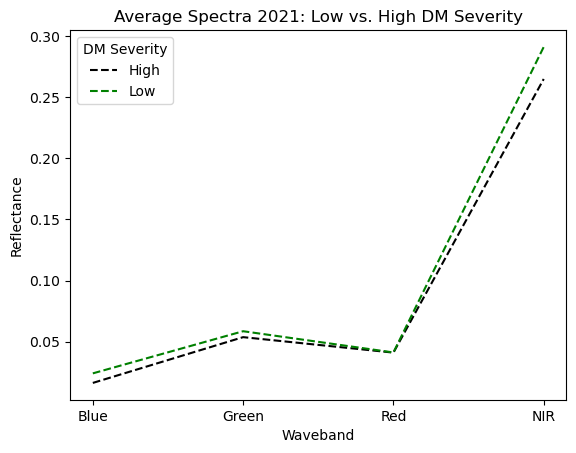

In [48]:
plt.plot(high_sev.iloc[:, 0:4].mean(), '--k', label='High')
plt.plot(low_sev.iloc[:, 0:4].mean(), '--g', label='Low')

plt.xlabel('Waveband')
plt.ylabel('Reflectance')
plt.xticks(np.arange(4), ['Blue', 'Green', 'Red', 'NIR'])
plt.legend(title='DM Severity')
plt.title('Average Spectra 2021: Low vs. High DM Severity')
plt.show()

In [71]:
# Plot average spectra by disease class on each day

def get_avg_spectra(csv):
    
    def assign_sev(row):
        if row['mean_sev_top_bot']>=10:
            return 'high'
        if row['mean_sev_top_bot']<10:
            return 'low'
    
    data = pd.read_csv(csv)    
    
    data['sev_level'] = data.apply(lambda row: assign_sev(row), axis=1)
    
    
    dates = data["scout_day"].unique()
    
    daily_data = []
    
    for d in dates:
        daily = data[data['scout_day']==d]
        daily_data.append(daily)
        
    for df in daily_data:
        high_sev = df[df['sev_level']=='high']
        low_sev =  df[df['sev_level']=='low']
        
        plt.plot(high_sev.iloc[:, 0:4].mean(), '--k', label='High')
        plt.plot(low_sev.iloc[:, 0:4].mean(), '--g', label='Low')
        
        plt.xlabel('Waveband')
        plt.ylabel('Reflectance')
        plt.xticks(np.arange(4), ['Blue', 'Green', 'Red', 'NIR'])
        plt.legend(title='DM Severity')
        plt.title(f'Average Spectra {str(df.scout_day.unique())[1:-1]}: Low vs. High DM Severity')
        plt.show()
        

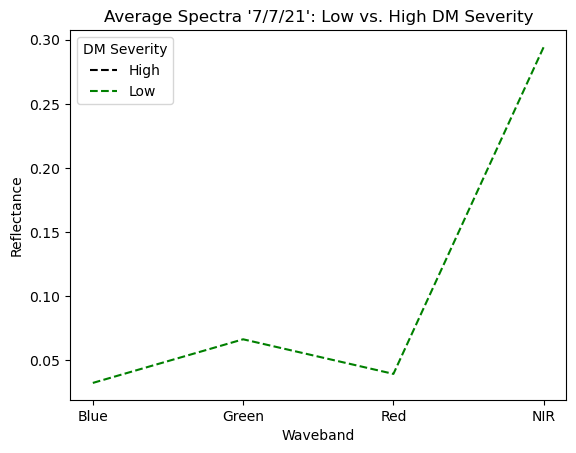

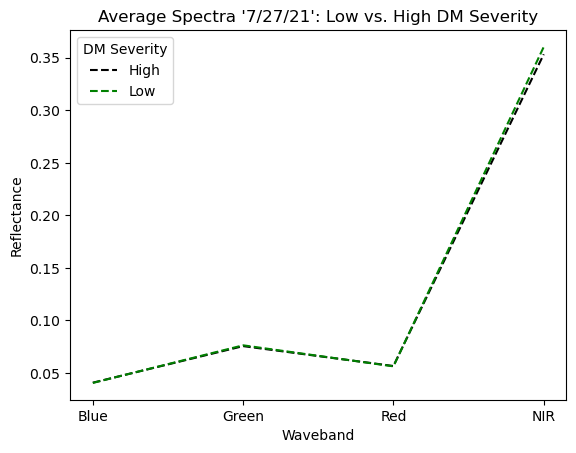

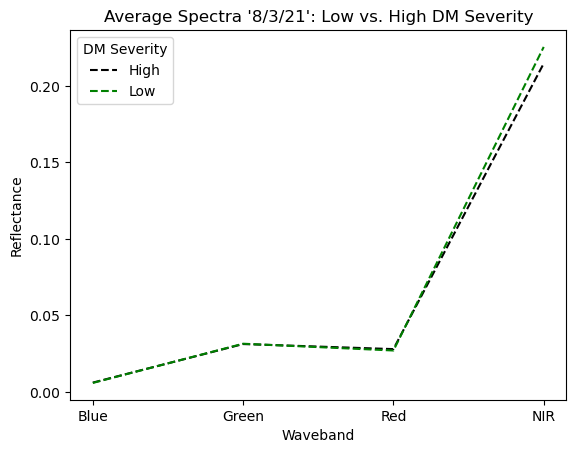

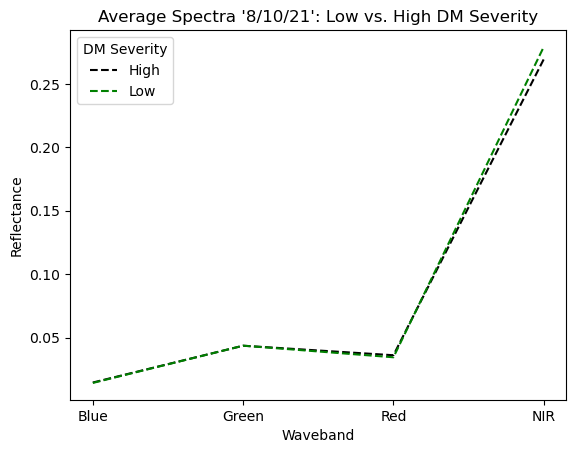

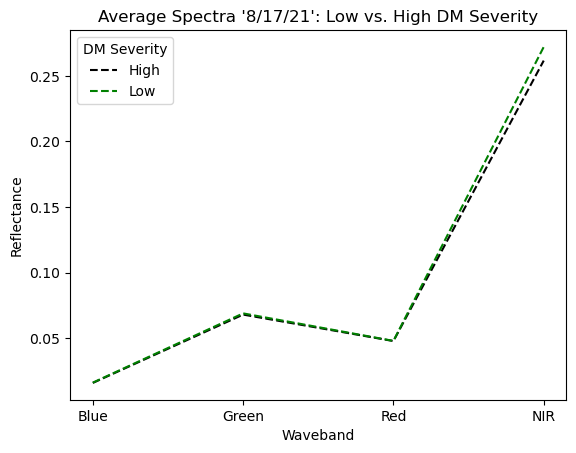

In [72]:
get_avg_spectra(home+'stats_work/SkySat_2021/skysat_scout_1m.csv')

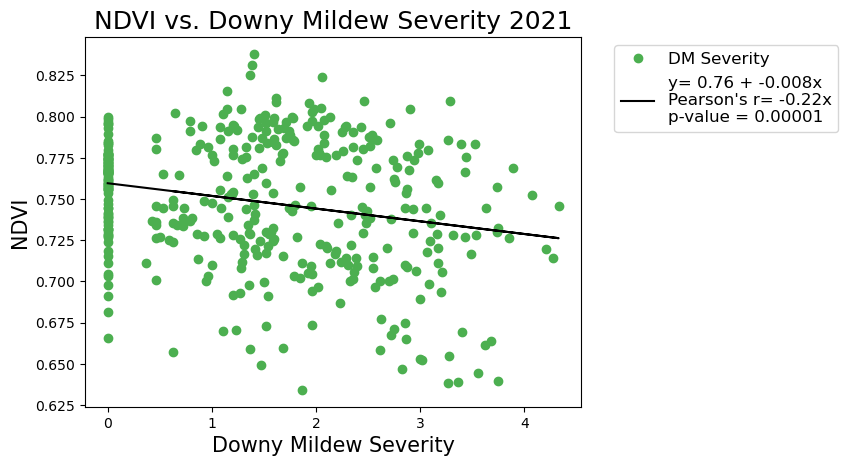

In [46]:
# Plot correlation for all dates 2021. NDVI.

x = np.cbrt(data['mean_sev_top_bot'])
y = data['ndvi_mean']
sl, inter, rval, pval, stderror = scipy.stats.linregress(x, y)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}x\np-value = {pval:.5f}"
        
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', color = "#4CAF50", label='DM Severity')
ax.plot(x, inter + sl * x, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('NDVI', fontsize = 15)
ax.set_title('NDVI vs. Downy Mildew Severity 2021', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

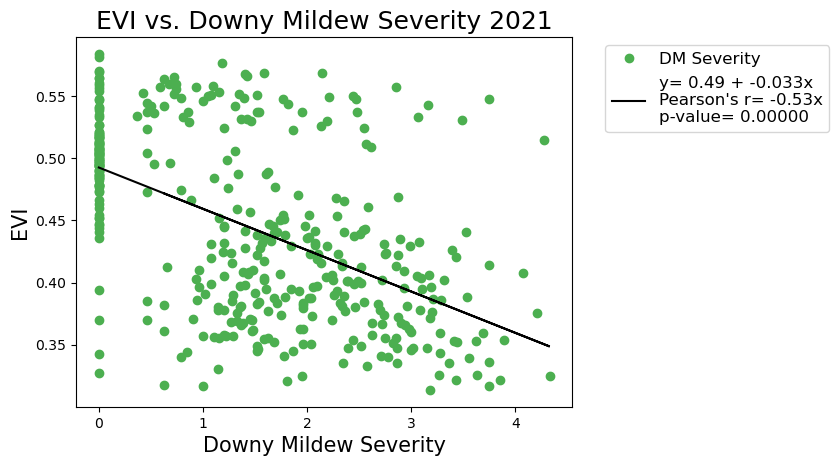

In [47]:
# Plot correlation for all dates 2021. EVI.

x = np.cbrt(data['mean_sev_top_bot'])
y = data['evi_mean']
sl, inter, rval, pval, stderror = scipy.stats.linregress(x, y)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}x\np-value= {pval:.5f}"
        
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', color = "#4CAF50", label='DM Severity')
ax.plot(x, inter + sl * x, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('EVI', fontsize = 15)
ax.set_title('EVI vs. Downy Mildew Severity 2021', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

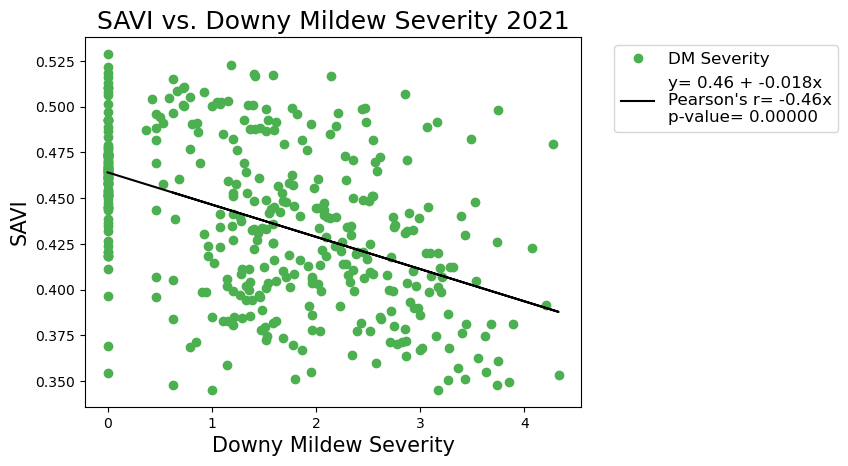

In [48]:
# Plot correlation for all dates 2021. SAVI.

x = np.cbrt(data['mean_sev_top_bot'])
y = data['savi_mean']
sl, inter, rval, pval, stderror = scipy.stats.linregress(x, y)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}x\np-value= {pval:.5f}"
        
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', color = "#4CAF50", label='DM Severity')
ax.plot(x, inter + sl * x, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('SAVI', fontsize = 15)
ax.set_title('SAVI vs. Downy Mildew Severity 2021', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

In [10]:
def get_vi_human(csv,x,y):
    
    data = pd.read_csv(csv)
    
    dates = data["scout_day"].unique()
    
    daily_data = []
    
    for d in dates:
        daily = data[data['scout_day']==d]
        daily_data.append(daily)
        
    for df in daily_data:
        x_var = np.cbrt(df[x]) # cubic root transform to get more normal distribution
        y_var = df[y] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
        sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
        line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
        
        fig, ax = plt.subplots()
        ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#4CAF50", label=str(x)) #change to reflect
        ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
        ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
        ax.set_ylabel(f"{y}", fontsize = 15)
        ax.set_title(f"{y} vs. DM Severity {str(df['scout_day'].unique())[1:-1]}", fontsize = 18)
        ax.legend(facecolor='white')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
        plt.show()

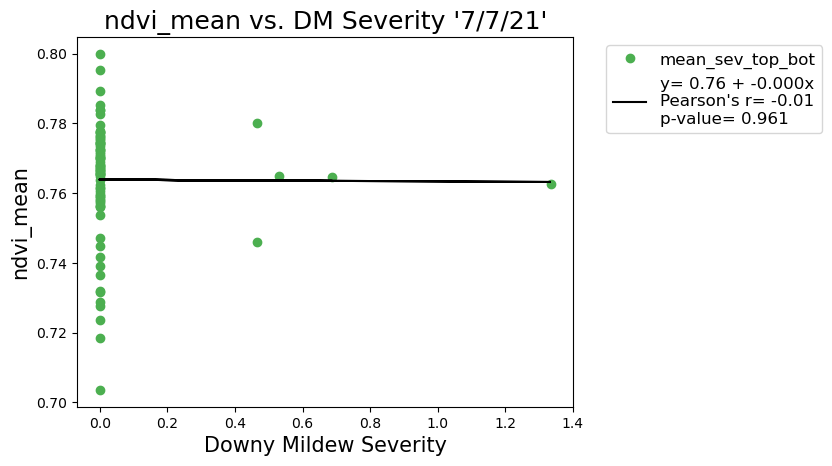

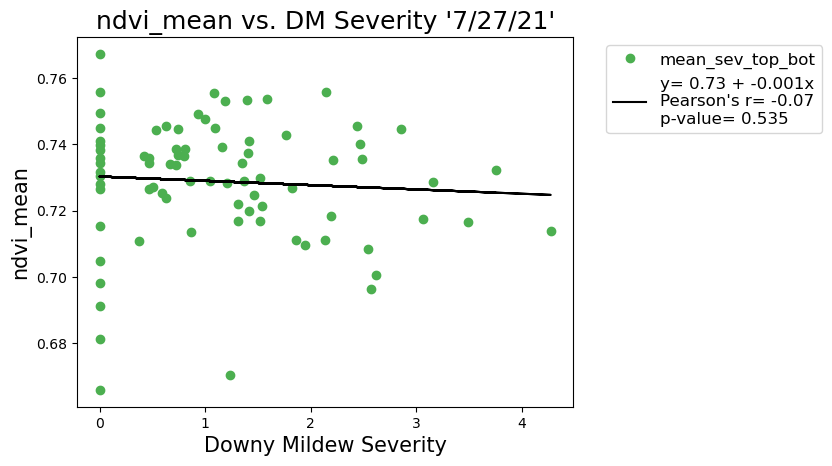

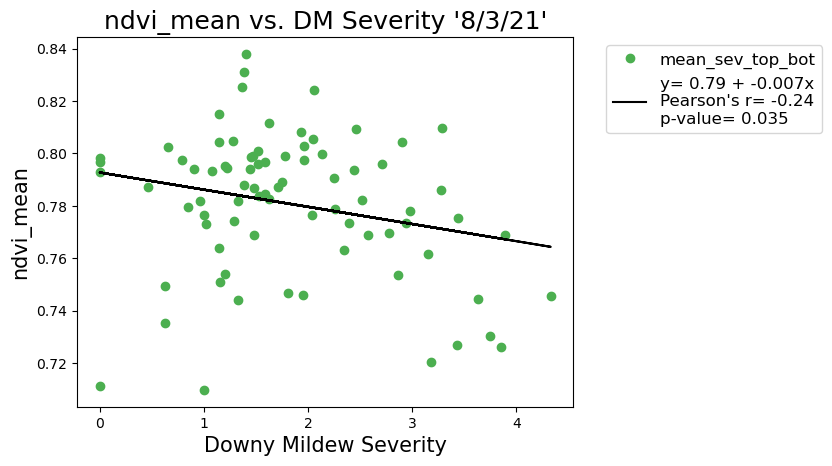

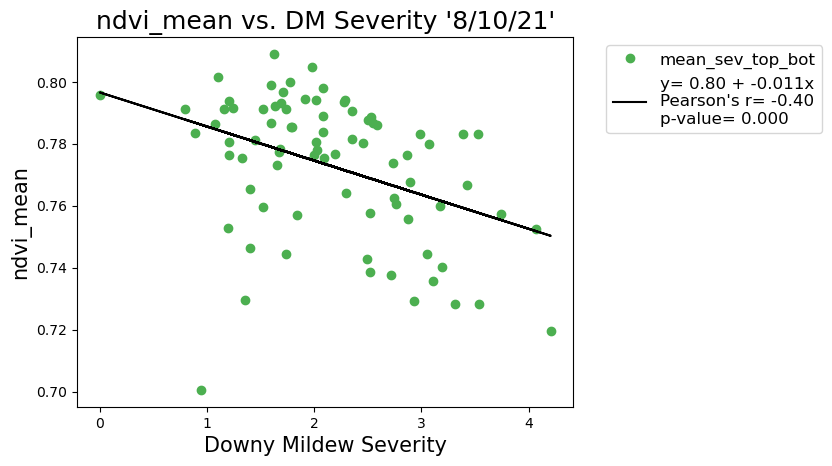

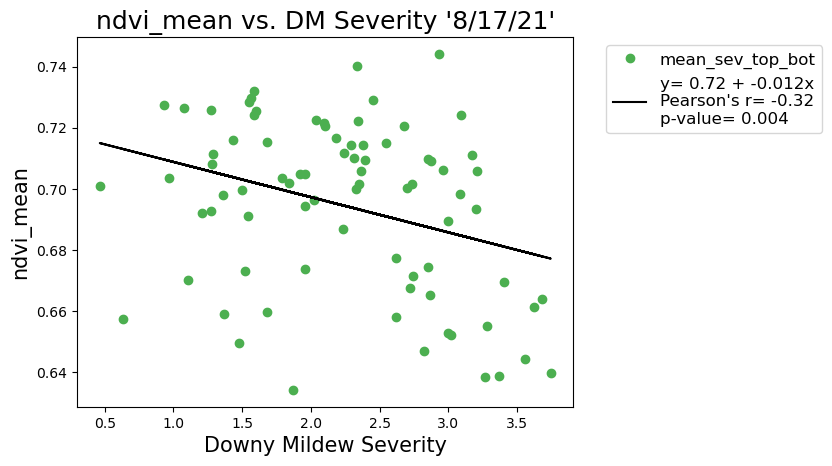

In [11]:
# NDVI correlations
get_vi_human(home+'stats_work/SkySat_2021/skysat_scout_1m_2021.csv','mean_sev_top_bot','ndvi_mean')

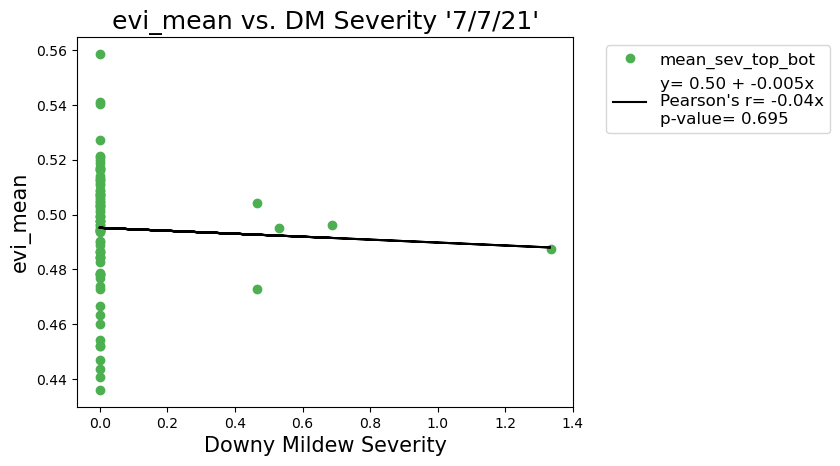

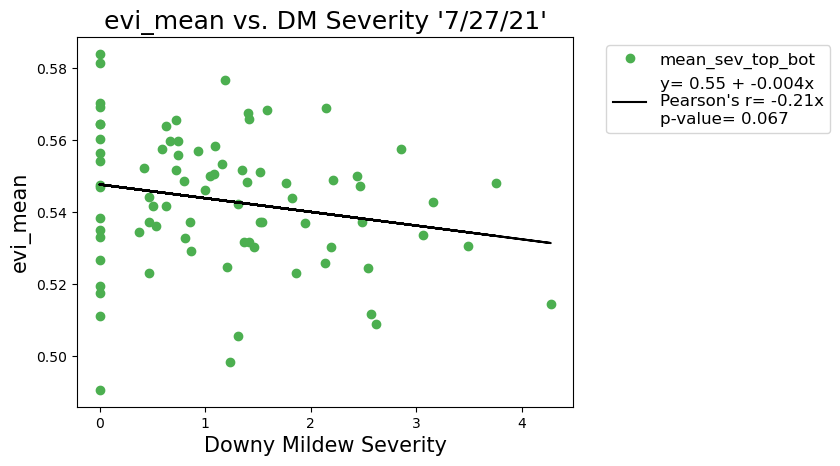

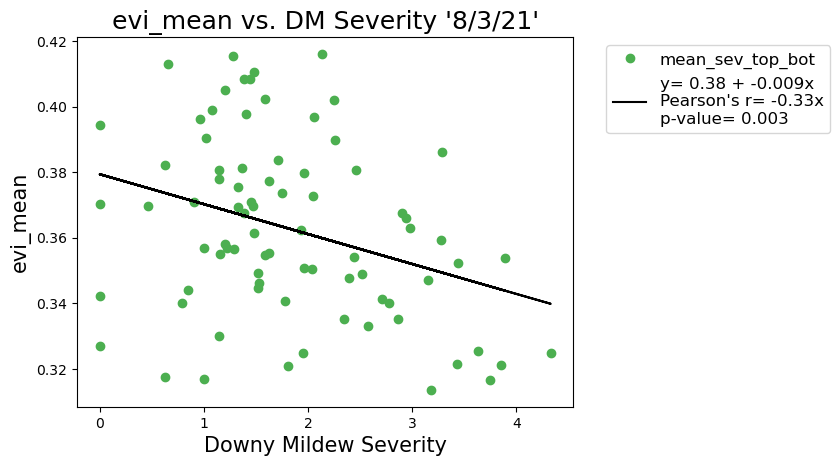

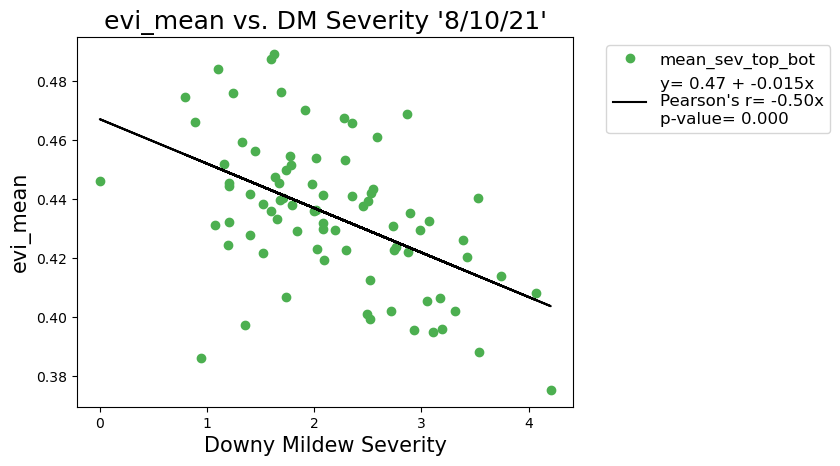

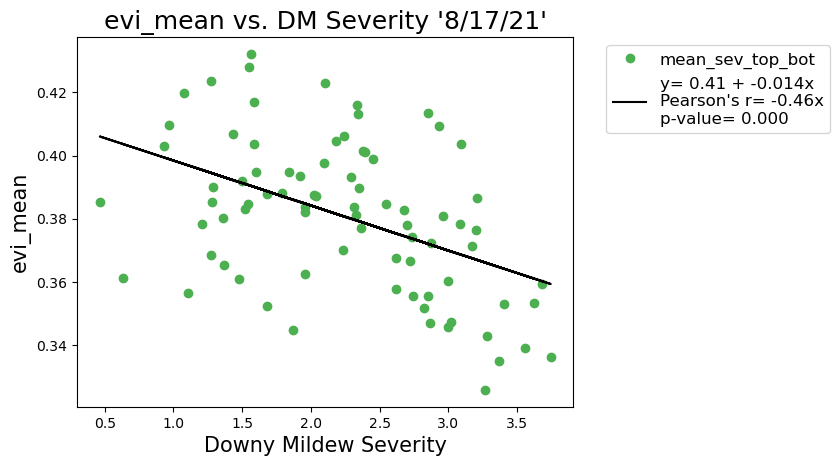

In [53]:
# EVI correlations
get_vi_human(home+'stats_work/SkySat_2021/skysat_scout_1m_2021.csv','mean_sev_top_bot','evi_mean')

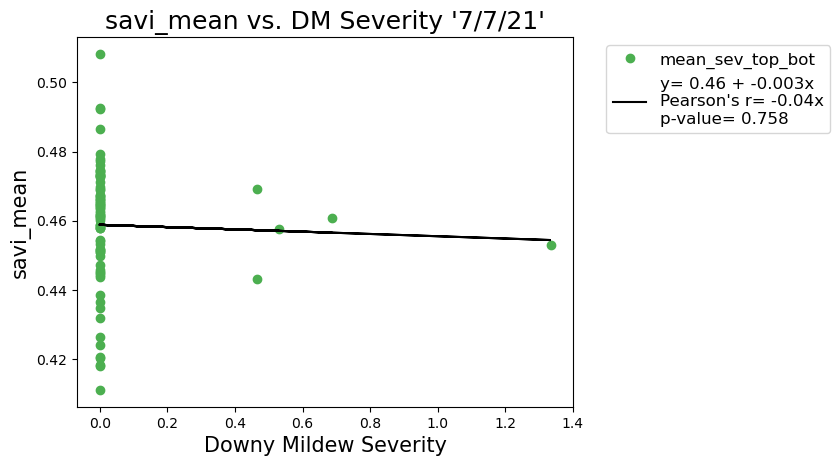

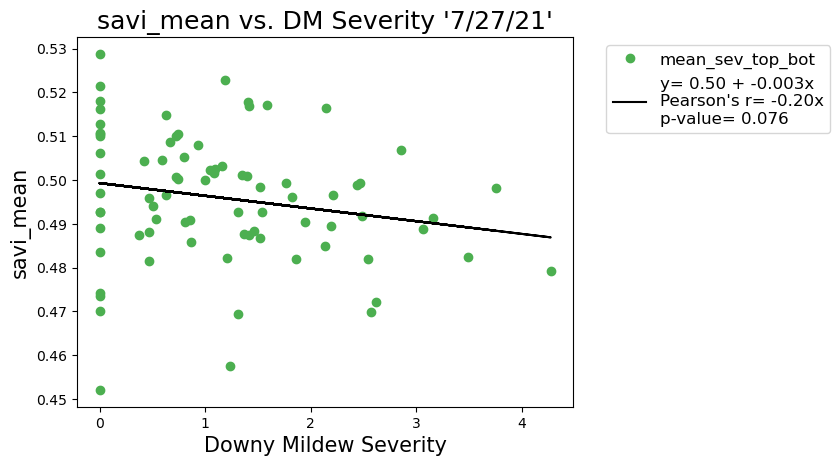

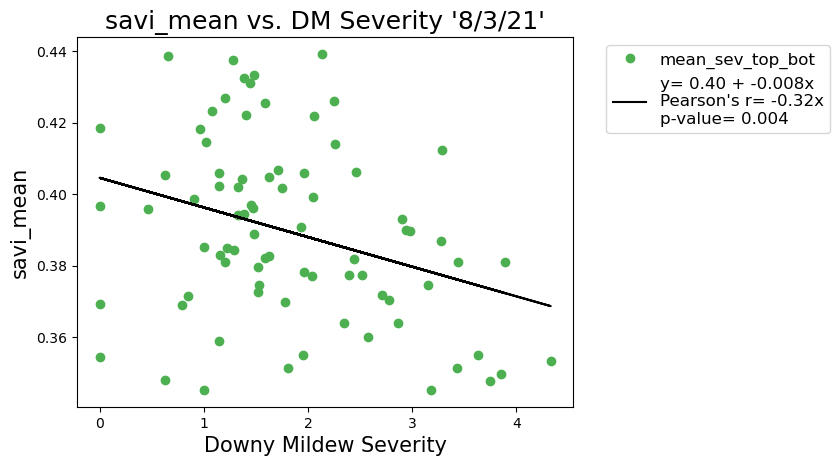

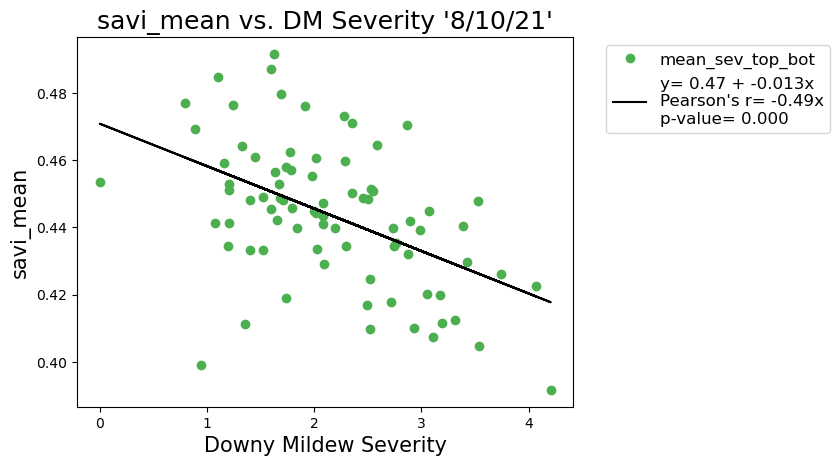

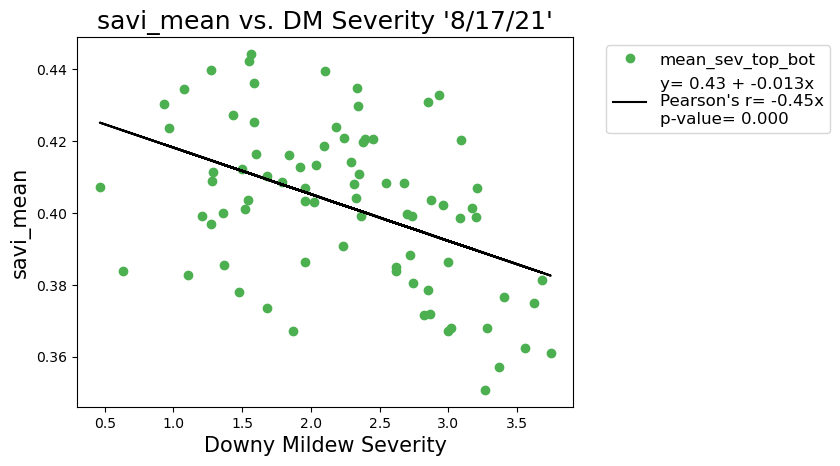

In [54]:
# SAVI correlations
get_vi_human(home+'stats_work/SkySat_2021/skysat_scout_1m_2021.csv','mean_sev_top_bot','savi_mean')

In [57]:
# Repeat for 2022

data_2022 = pd.read_csv(home+'/stats_work/SkySat_2022/skysat_scout_1m_2022.csv')

<AxesSubplot: xlabel='mean_sev_top_bot', ylabel='Count'>

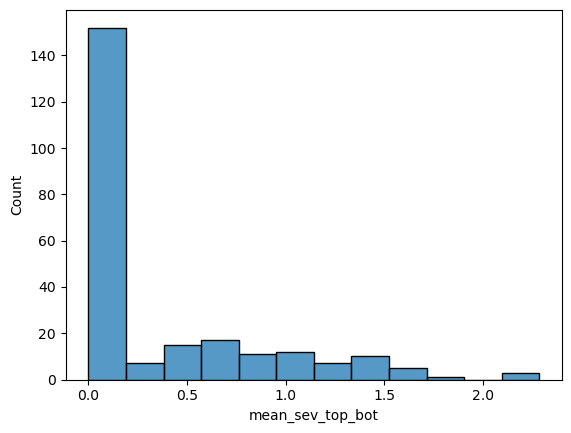

In [60]:
sns.histplot(np.cbrt(data_2022.mean_sev_top_bot))

<AxesSubplot: xlabel='ndvi_mean', ylabel='Count'>

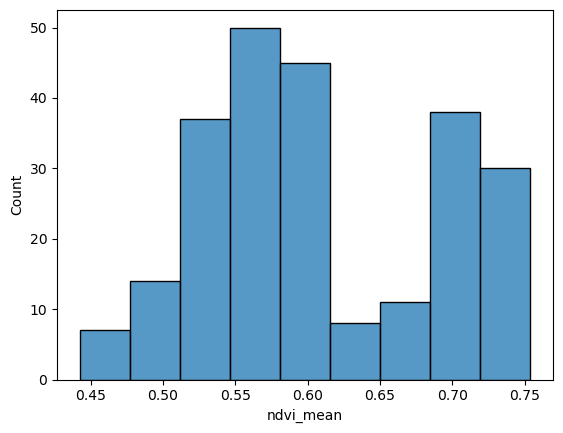

In [61]:
sns.histplot(data_2022.ndvi_mean)

<AxesSubplot: xlabel='evi_mean', ylabel='Count'>

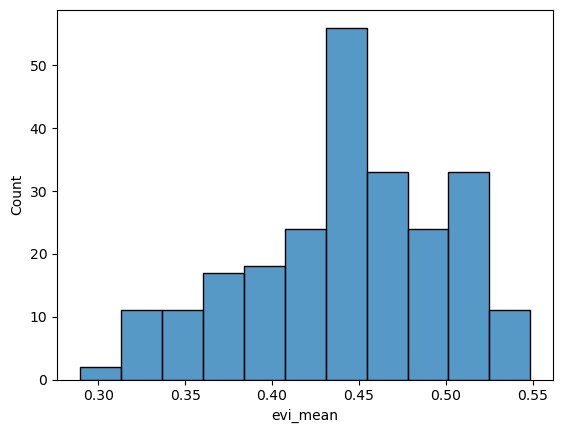

In [64]:
sns.histplot(data_2022.evi_mean)

<AxesSubplot: xlabel='savi_mean', ylabel='Count'>

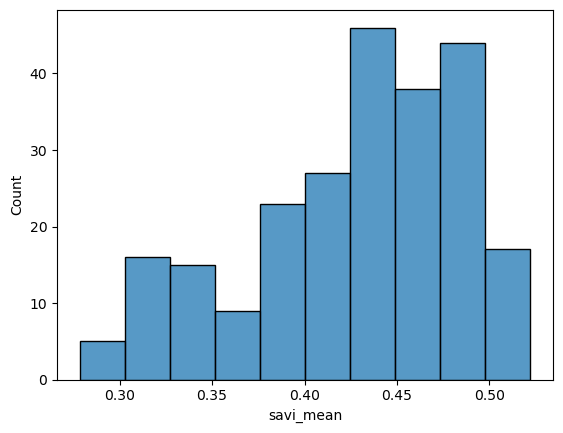

In [68]:
sns.histplot(data_2022.savi_mean)

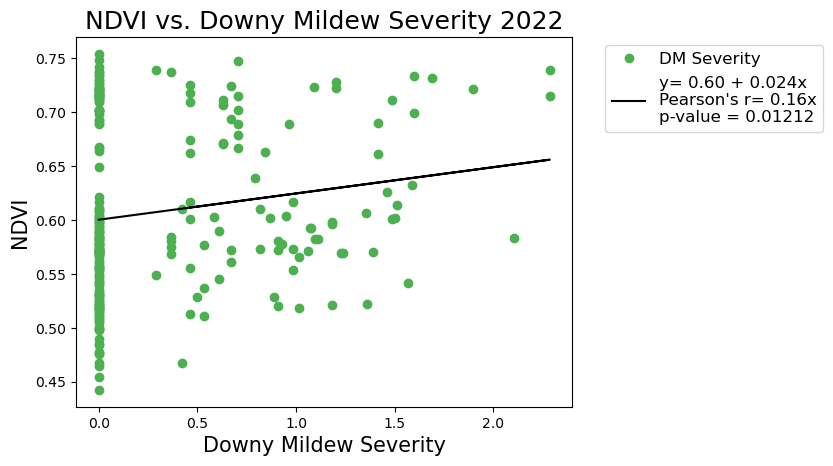

In [69]:
# Plot correlation for all dates 2022. NDVI.

x = np.cbrt(data_2022['mean_sev_top_bot'])
y = data_2022['ndvi_mean']
sl, inter, rval, pval, stderror = scipy.stats.linregress(x, y)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}x\np-value = {pval:.5f}"
        
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', color = "#4CAF50", label='DM Severity')
ax.plot(x, inter + sl * x, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('NDVI', fontsize = 15)
ax.set_title('NDVI vs. Downy Mildew Severity 2022', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

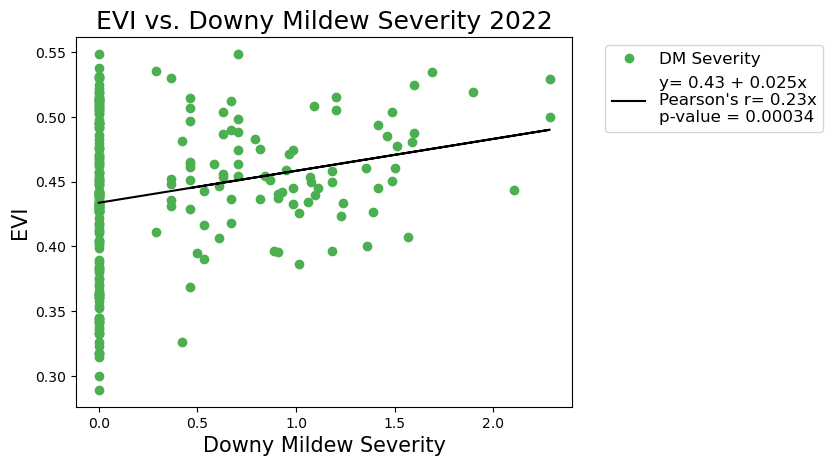

In [70]:
# Plot correlation for all dates 2022. NDVI.

x = np.cbrt(data_2022['mean_sev_top_bot'])
y = data_2022['evi_mean']
sl, inter, rval, pval, stderror = scipy.stats.linregress(x, y)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}x\np-value = {pval:.5f}"
        
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', color = "#4CAF50", label='DM Severity')
ax.plot(x, inter + sl * x, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('EVI', fontsize = 15)
ax.set_title('EVI vs. Downy Mildew Severity 2022', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

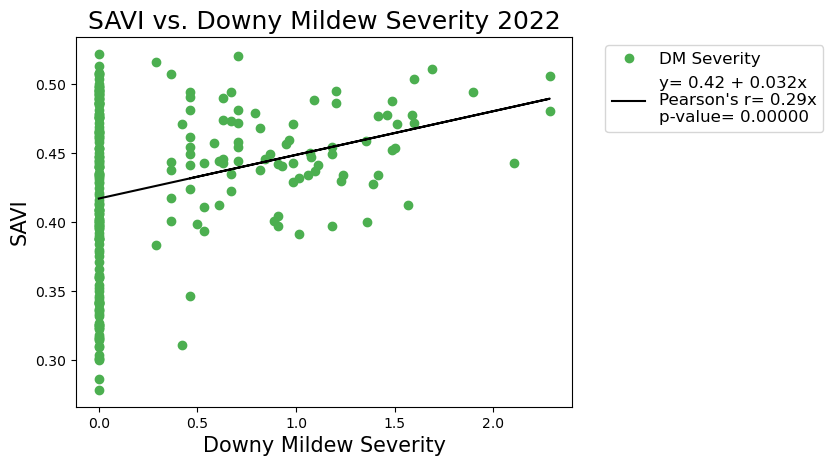

In [71]:
# Plot correlation for all dates 2021. SAVI.

x = np.cbrt(data_2022['mean_sev_top_bot'])
y = data_2022['savi_mean']
sl, inter, rval, pval, stderror = scipy.stats.linregress(x, y)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}x\np-value= {pval:.5f}"
        
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', color = "#4CAF50", label='DM Severity')
ax.plot(x, inter + sl * x, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('SAVI', fontsize = 15)
ax.set_title('SAVI vs. Downy Mildew Severity 2022', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

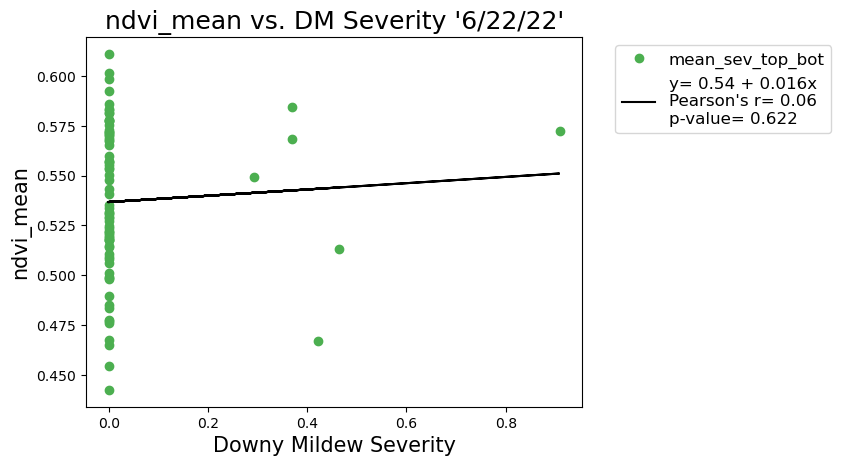

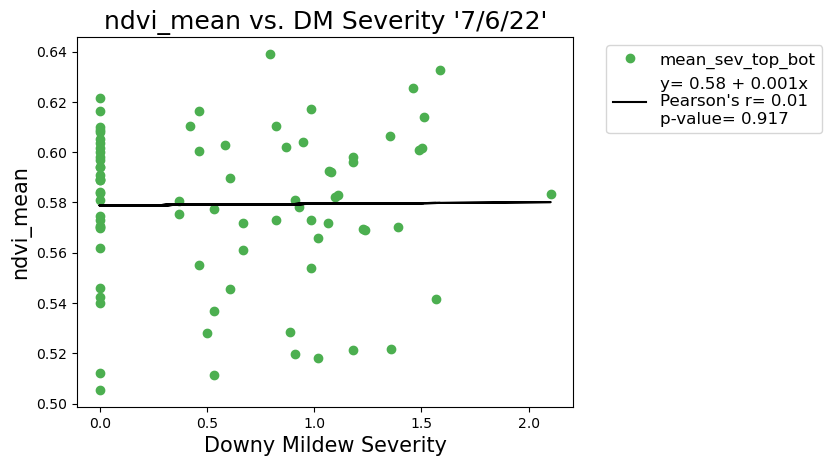

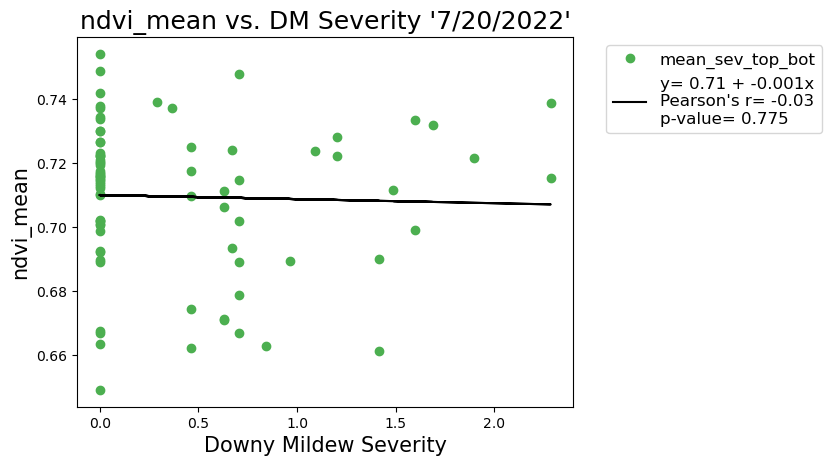

In [72]:
# NDVI correlations
get_vi_human(home+'stats_work/SkySat_2022/skysat_scout_1m_2022.csv','mean_sev_top_bot','ndvi_mean')


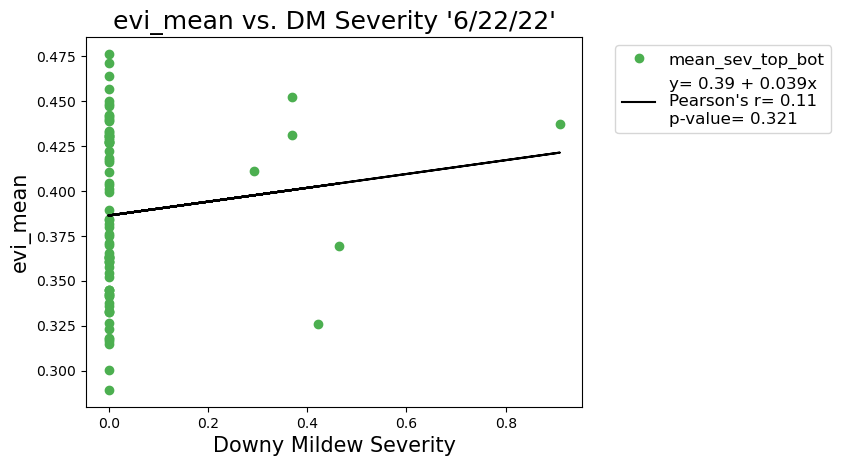

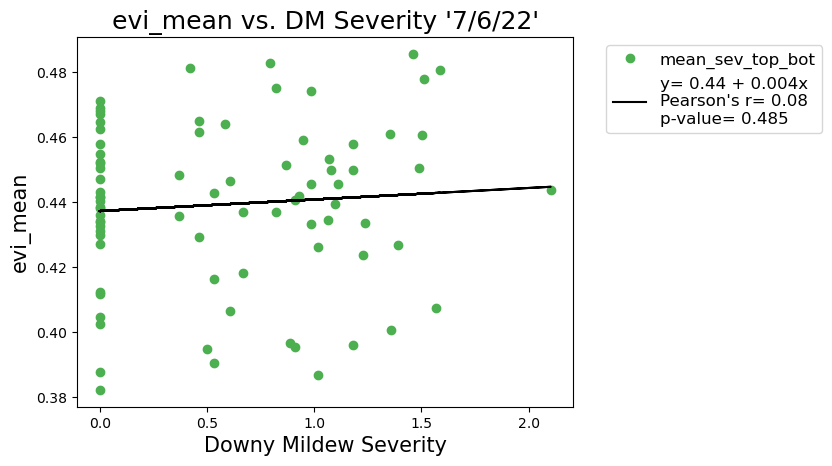

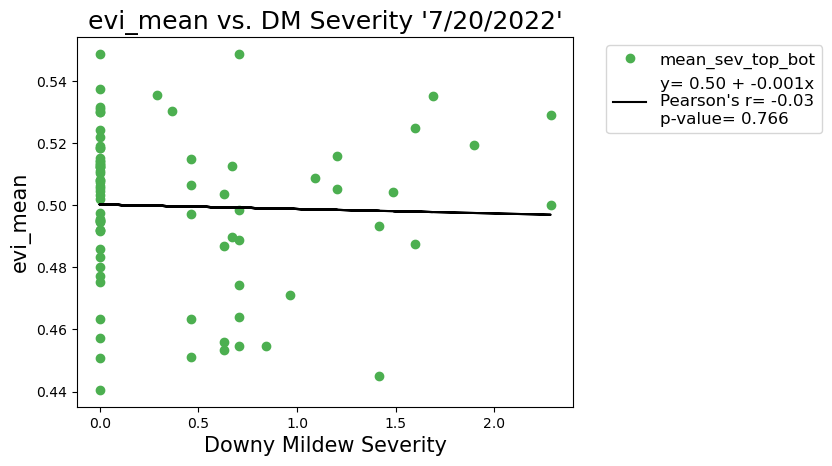

In [73]:
# EVI correlations
get_vi_human(home+'stats_work/SkySat_2022/skysat_scout_1m_2022.csv','mean_sev_top_bot','evi_mean')


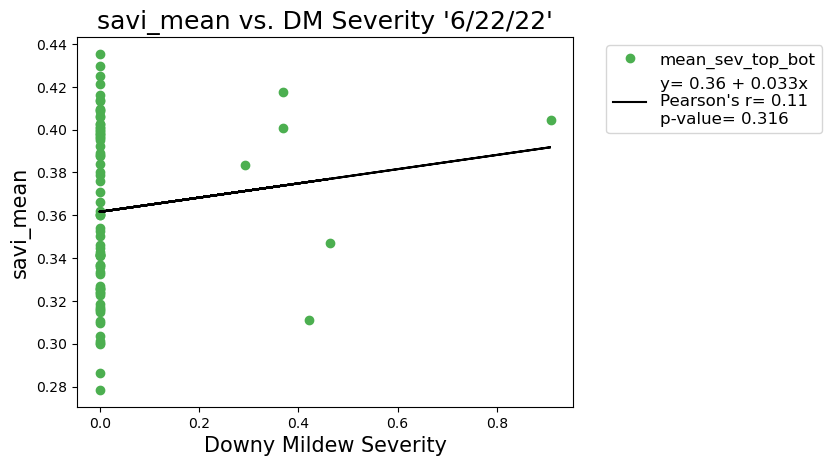

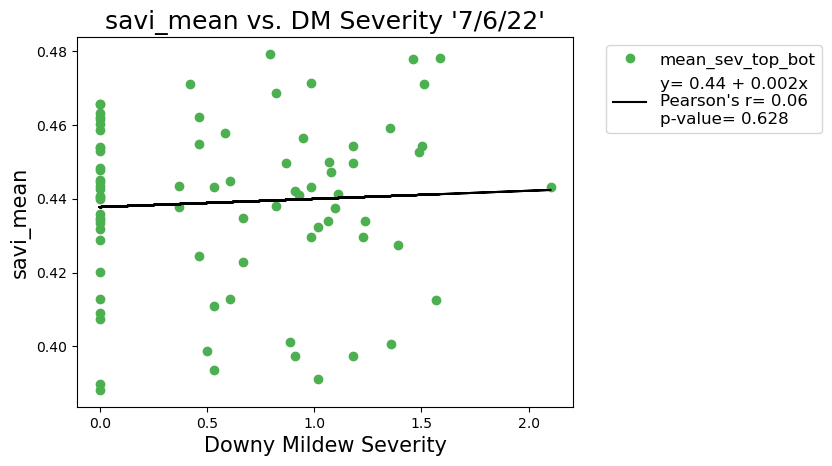

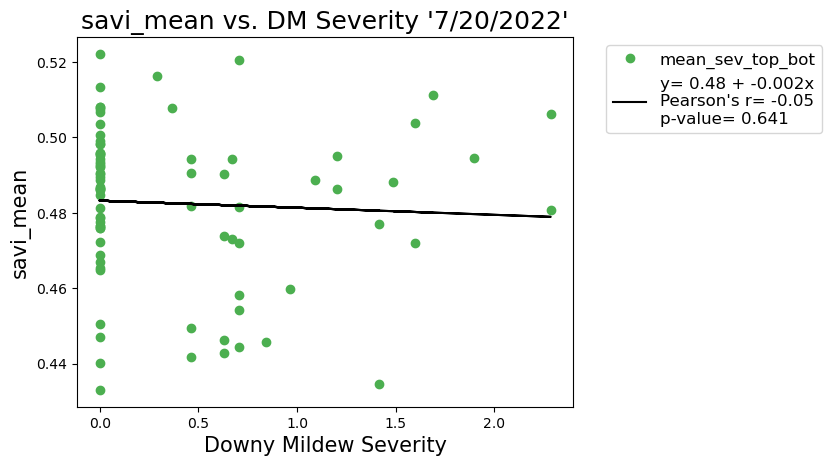

In [74]:
# SAVI correlations
get_vi_human(home+'stats_work/SkySat_2022/skysat_scout_1m_2022.csv','mean_sev_top_bot','savi_mean')


In [75]:
# Get 2020 data

data_2020 = pd.read_csv(home+ '/stats_work/SkySat_2020/skysat_scout_1m_2020.csv')

In [77]:
data_2020.columns


Index(['Unnamed: 0', 'blue_mean', 'green_mean', 'red_mean', 'nir_mean',
       'ndvi_mean', 'evi_mean', 'acquired', 'row', 'panel', 'scout_day',
       'Date', 'Block', 'Treatment', 'DM_incd', 'DM_severity'],
      dtype='object')

<AxesSubplot: xlabel='DM_severity', ylabel='Count'>

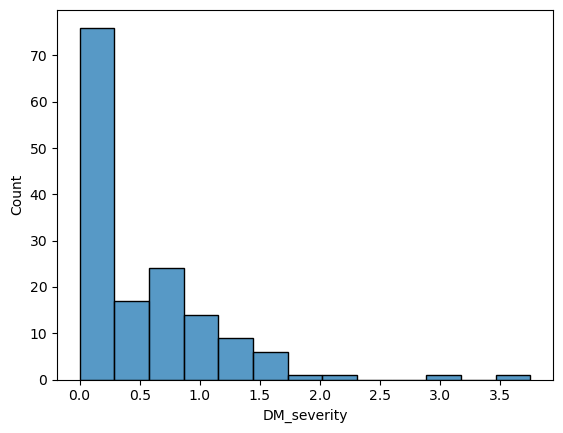

In [82]:
sns.histplot(np.cbrt(data_2020.DM_severity))

<AxesSubplot: xlabel='ndvi_mean', ylabel='Count'>

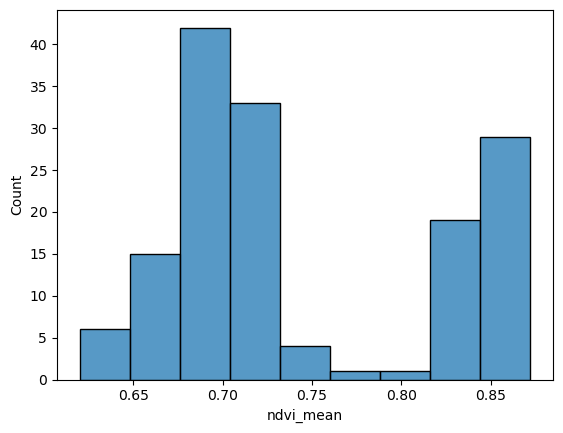

In [83]:
sns.histplot(data_2020.ndvi_mean)

<AxesSubplot: xlabel='evi_mean', ylabel='Count'>

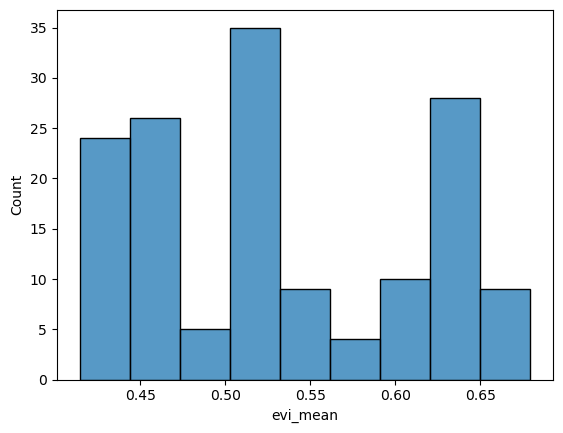

In [85]:
sns.histplot(data_2020.evi_mean)

In [88]:
len(data_2020.DM_severity)

150

In [89]:
len(data_2020.ndvi_mean)

150

In [90]:
data_2020

Unnamed: 0  blue_mean  green_mean  red_mean  nir_mean  ndvi_mean  \
0            96   0.049290    0.067947  0.050030  0.308817   0.721162   
1            97   0.049189    0.066239  0.048911  0.291346   0.712507   
2            99   0.047637    0.064937  0.047663  0.303950   0.728888   
3           100   0.048268    0.064518  0.048571  0.308064   0.727613   
4           101   0.047930    0.066887  0.048617  0.300613   0.721578   
..          ...        ...         ...       ...       ...        ...   
145         473   0.032963    0.056057  0.036977  0.380673   0.822930   
146         474   0.030500    0.055400  0.033030  0.381304   0.840565   
147         476   0.027953    0.052020  0.029530  0.401523   0.862987   
148         477   0.033326    0.062045  0.038206  0.403048   0.826828   
149         478   0.032600    0.059615  0.035981  0.386400   0.829626   

     evi_mean                  acquired  row  panel  scout_day    Date Block  \
0    0.522033  2020-06-25T15:47:04.875Z    7      1          8  25-Jun    DM   
1    0.498473  2020-06-25T15:47:04.875Z    7      2          8  25-Jun    DM   
2    0.519786  2020-06-25T15:47:04.875Z    7      4          8  25-Jun    DM   
3    0.524235  2020-06-25T15:47:04.875Z    7      5          8  25-Jun    DM   
4    0.511009  2020-06-25T15:47:04.875Z    7      6          8  25-Jun    DM   
..        ...                       ...  ...    ...        ...     ...   ...   
145  0.633982  2020-08-12T15:39:24.687Z   10     10         57  13-Aug    DM   
146  0.644603  2020-08-12T15:39:24.687Z   10     11         57  13-Aug    DM   
147  0.679289  2020-08-12T15:39:24.687Z   10     13         57  13-Aug    DM   
148  0.659825  2020-08-12T15:39:24.687Z   10     14         57  13-Aug    DM   
149  0.645201  2020-08-12T15:39:24.687Z   10     15         57  13-Aug    DM   

     Treatment  DM_incd  DM_severity  
0         13.0      0.0         0.00  
1          8.0      0.0         0.00  
2          1.0      0.0         0.00  
3         11.0      0.0         0.00  
4         16.0      5.0         0.10  
..         ...      ...          ...  
145       12.0     10.0         0.60  
146        3.0      5.0         0.25  
147        4.0     10.0         0.20  
148       16.0     30.0         3.45  
149        1.0    100.0        24.20  

[150 rows x 16 columns]

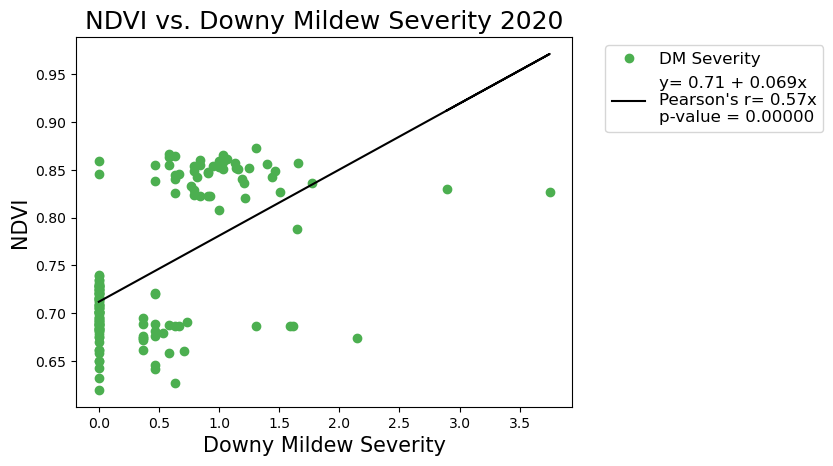

In [91]:
# Plot correlation for all dates 2020. NDVI.

x = np.cbrt(data_2020['DM_severity'])
y = data_2020['ndvi_mean']
sl, inter, rval, pval, stderror = scipy.stats.linregress(x, y)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}x\np-value = {pval:.5f}"
        
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', color = "#4CAF50", label='DM Severity')
ax.plot(x, inter + sl * x, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('NDVI', fontsize = 15)
ax.set_title('NDVI vs. Downy Mildew Severity 2020', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

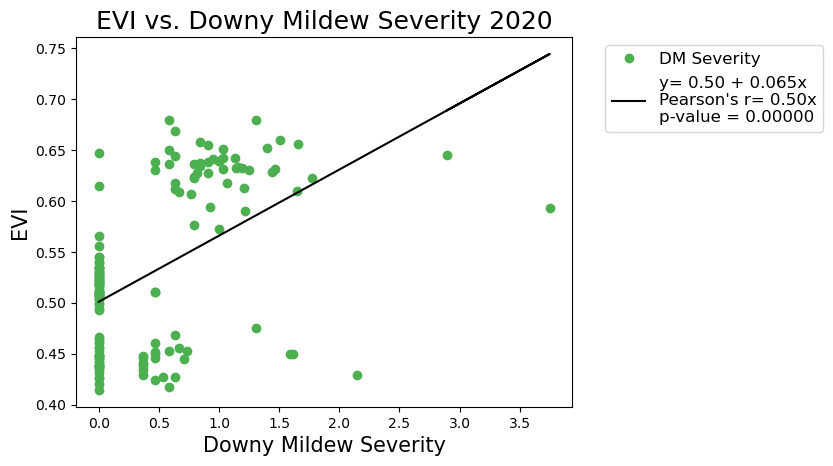

In [92]:
# Plot correlation for all dates 2020. NDVI.

x = np.cbrt(data_2020['DM_severity'])
y = data_2020['evi_mean']
sl, inter, rval, pval, stderror = scipy.stats.linregress(x, y)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}x\np-value = {pval:.5f}"
        
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', color = "#4CAF50", label='DM Severity')
ax.plot(x, inter + sl * x, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('EVI', fontsize = 15)
ax.set_title('EVI vs. Downy Mildew Severity 2020', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()

In [93]:
savi = 1.5 * ((data_2020.nir_mean-data_2020.red_mean)/(data_2020.nir_mean + data_2020.red_mean + 0.5))
savi

0      0.451978
1      0.432788
2      0.451414
3      0.454381
4      0.445103
         ...   
145    0.561810
146    0.571357
147    0.599310
148    0.581418
149    0.569859
Length: 150, dtype: float64

In [94]:
data_2020['savi_mean']=savi

In [95]:
data_2020

Unnamed: 0  blue_mean  green_mean  red_mean  nir_mean  ndvi_mean  \
0            96   0.049290    0.067947  0.050030  0.308817   0.721162   
1            97   0.049189    0.066239  0.048911  0.291346   0.712507   
2            99   0.047637    0.064937  0.047663  0.303950   0.728888   
3           100   0.048268    0.064518  0.048571  0.308064   0.727613   
4           101   0.047930    0.066887  0.048617  0.300613   0.721578   
..          ...        ...         ...       ...       ...        ...   
145         473   0.032963    0.056057  0.036977  0.380673   0.822930   
146         474   0.030500    0.055400  0.033030  0.381304   0.840565   
147         476   0.027953    0.052020  0.029530  0.401523   0.862987   
148         477   0.033326    0.062045  0.038206  0.403048   0.826828   
149         478   0.032600    0.059615  0.035981  0.386400   0.829626   

     evi_mean                  acquired  row  panel  scout_day    Date Block  \
0    0.522033  2020-06-25T15:47:04.875Z    7      1          8  25-Jun    DM   
1    0.498473  2020-06-25T15:47:04.875Z    7      2          8  25-Jun    DM   
2    0.519786  2020-06-25T15:47:04.875Z    7      4          8  25-Jun    DM   
3    0.524235  2020-06-25T15:47:04.875Z    7      5          8  25-Jun    DM   
4    0.511009  2020-06-25T15:47:04.875Z    7      6          8  25-Jun    DM   
..        ...                       ...  ...    ...        ...     ...   ...   
145  0.633982  2020-08-12T15:39:24.687Z   10     10         57  13-Aug    DM   
146  0.644603  2020-08-12T15:39:24.687Z   10     11         57  13-Aug    DM   
147  0.679289  2020-08-12T15:39:24.687Z   10     13         57  13-Aug    DM   
148  0.659825  2020-08-12T15:39:24.687Z   10     14         57  13-Aug    DM   
149  0.645201  2020-08-12T15:39:24.687Z   10     15         57  13-Aug    DM   

     Treatment  DM_incd  DM_severity  savi_mean  
0         13.0      0.0         0.00   0.451978  
1          8.0      0.0         0.00   0.432788  
2          1.0      0.0         0.00   0.451414  
3         11.0      0.0         0.00   0.454381  
4         16.0      5.0         0.10   0.445103  
..         ...      ...          ...        ...  
145       12.0     10.0         0.60   0.561810  
146        3.0      5.0         0.25   0.571357  
147        4.0     10.0         0.20   0.599310  
148       16.0     30.0         3.45   0.581418  
149        1.0    100.0        24.20   0.569859  

[150 rows x 17 columns]

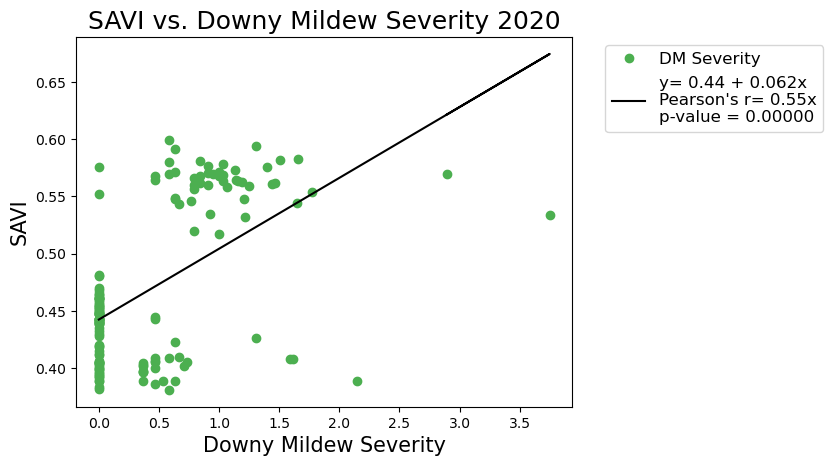

In [96]:
# Plot correlation for all dates 2020. NDVI.

x = np.cbrt(data_2020['DM_severity'])
y = data_2020['savi_mean']
sl, inter, rval, pval, stderror = scipy.stats.linregress(x, y)
line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}x\np-value = {pval:.5f}"
        
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', color = "#4CAF50", label='DM Severity')
ax.plot(x, inter + sl * x, label=line, color = 'black')
ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
ax.set_ylabel('SAVI', fontsize = 15)
ax.set_title('SAVI vs. Downy Mildew Severity 2020', fontsize = 18)
ax.legend(facecolor='white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
plt.show()